# настройка imagenet

In [6]:
import os
import shutil
import scipy.io
import numpy as np

# === 1. Чтение ground truth из devkit ===
with open('/content/imagenet/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt') as f:
    class_ids = [int(line.strip()) for line in f]  # значения от 1 до 1000

# === 2. Чтение WNID по ILSVRC2012_ID из meta.mat ===
meta = scipy.io.loadmat('/content/imagenet/ILSVRC2012_devkit_t12/data/meta.mat', squeeze_me=True)
synsets = meta['synsets']

# Строим словарь: ILSVRC2012_ID (1-based, 1..1000) → WNID
id_to_wnid = {}
for s in synsets:
    class_id = int(s[0].item()) if isinstance(s[0], np.ndarray) else int(s[0])
    if 1 <= class_id <= 1000:
        wnid = str(s[1].item()) if isinstance(s[1], np.ndarray) else str(s[1])
        id_to_wnid[class_id] = wnid

print(f"✅ Built id_to_wnid dictionary with {len(id_to_wnid)} entries.")

# === 3. Перемещение изображений в папки ===
val_dir = '/content/imagenet/val'
moved_count = 0
skipped = 0

print("🚚 Moving files to class folders...")
for i, class_id in enumerate(class_ids):
    wnid = id_to_wnid.get(class_id)
    if wnid:
        class_dir = os.path.join(val_dir, wnid)
        os.makedirs(class_dir, exist_ok=True)

        filename = f'ILSVRC2012_val_{i+1:08d}.JPEG'
        src = os.path.join(val_dir, filename)
        dst = os.path.join(class_dir, filename)

        if os.path.exists(src):
            shutil.move(src, dst)
            moved_count += 1
        else:
            print(f"⚠️ Skipped (not found): {filename}")
            skipped += 1
    else:
        print(f"⚠️ Class ID {class_id} not in id_to_wnid — skipping file {i+1}")
        skipped += 1

print(f"✅ Done: moved {moved_count} files, skipped {skipped}.")



✅ Built id_to_wnid dictionary with 1000 entries.
🚚 Moving files to class folders...
✅ Done: moved 50000 files, skipped 0.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p /content/imagenet/val

In [3]:
!tar -xf /content/drive/MyDrive/ILSVRC2012_img_val.tar -C /content/imagenet/val

In [4]:
!wget -P ./imagenet https://image-net.org/data/ILSVRC/2012/ILSVRC2012_devkit_t12.tar.gz

--2025-06-16 23:13:27--  https://image-net.org/data/ILSVRC/2012/ILSVRC2012_devkit_t12.tar.gz
Resolving image-net.org (image-net.org)... 171.64.68.16
Connecting to image-net.org (image-net.org)|171.64.68.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2568145 (2.4M) [application/x-gzip]
Saving to: ‘./imagenet/ILSVRC2012_devkit_t12.tar.gz’

ILSVRC2012_devkit_t 100%[===================>]   2.45M  1.80MB/s    in 1.4s    

2025-06-16 23:13:29 (1.80 MB/s) - ‘./imagenet/ILSVRC2012_devkit_t12.tar.gz’ saved [2568145/2568145]



In [5]:
!tar -xf /content/imagenet/ILSVRC2012_devkit_t12.tar.gz -C /content/imagenet/

# Актуальная версия (не до конца)

## Metric

In [ ]:
!pip install lpips
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
import time
import logging
import gc
from collections import defaultdict
import pandas as pd


try:
    from torchmetrics.detection import MeanAveragePrecision
    from torchmetrics.classification import Accuracy, CalibrationError
    TORCHMETRICS_AVAILABLE = True
except ImportError:
    TORCHMETRICS_AVAILABLE = False
    logging.warning("torchmetrics not found. Some metrics will be unavailable.")

class MetricsCollector:
    def __init__(self, num_classes_clf=1000, task_type='classification', device='cpu'):
        self.task_type = task_type
        self.num_classes_clf = num_classes_clf
        self.device = device
        self.reset()

        # Инициализация метрик torchmetrics
        if TORCHMETRICS_AVAILABLE:
            self.accuracy_metric = Accuracy(task='multiclass', num_classes=num_classes_clf).to(device)
            self.ece_metric = CalibrationError(task='multiclass', num_classes=num_classes_clf).to(device)

    def reset(self):
        # Общие метрики
        self.perturbations = []
        self.inference_times = []
        self.lpips_values = []
        self.feature_distances = []
        self.query_counts = []
        self.certified_radii = []

        # Классификация
        self.preds_clf = []
        self.labels_clf = []
        self.confs_clf = []
        self.logits_clf = []
        self.entropy_vals_clf = []
        self.clean_logits_clf = []
        self.adv_logits_clf = []
        self.clean_features = []
        self.adv_features = []
        self.ood_scores = []

        # Детекция
        self.det_preds = []
        self.adv_preds_det = []
        self.clean_preds_det = []
        self.det_labels = []
        self.confidence_drops = []
        self.false_positives = []
        self.miss_rates = []

        # Сертифицированная устойчивость
        self.certified_correct = 0
        self.total_certified = 0

    def update(self, outputs, targets, clean_outputs=None, adv_input=None, clean_input=None, time_taken=None):
        # Норма возмущений
        if adv_input is not None and clean_input is not None:
            perturb = (adv_input - clean_input).view(adv_input.size(0), -1)
            norm = torch.norm(perturb, p=float('inf'), dim=1)
            self.perturbations.extend(norm.detach().cpu().numpy())

        # Время инференса
        if time_taken is not None:
            self.inference_times.append(time_taken)

        if self.task_type == 'classification':
            self._update_classification(outputs, targets, clean_outputs)
        elif self.task_type == 'detection':
            self._update_detection(outputs, targets, clean_outputs)

    def _update_classification(self, outputs, targets, clean_outputs):
        logits = outputs
        labels = targets
        if logits is None:
            return

        probs = F.softmax(logits, dim=1)
        conf, pred = torch.max(probs, dim=1)
        entropy = -(probs * torch.clamp(probs.log(), min=-1e9)).sum(dim=1)

        self.preds_clf.extend(pred.cpu().numpy())
        self.labels_clf.extend(labels.cpu().numpy())
        self.confs_clf.extend(conf.cpu().numpy())
        self.logits_clf.extend(logits.cpu().numpy())
        self.entropy_vals_clf.extend(entropy.cpu().numpy())

        if clean_outputs is not None:
            self.clean_logits_clf.extend(clean_outputs.cpu().numpy())
            self.adv_logits_clf.extend(logits.cpu().numpy())

    def _update_detection(self, outputs, targets, clean_outputs):
        self.det_preds.extend(outputs)
        self.adv_preds_det.extend(outputs)

        if clean_outputs is not None:
            self.clean_preds_det.extend(clean_outputs)

        self.det_labels.extend(targets)

        # Вычисление падения уверенности
        if clean_outputs is not None and outputs is not None:
            for clean_pred, adv_pred in zip(clean_outputs, outputs):
                clean_confs = clean_pred['scores'].cpu().numpy()
                adv_confs = adv_pred['scores'].cpu().numpy()

                if len(clean_confs) > 0 and len(adv_confs) > 0:
                    avg_drop = np.mean(clean_confs - adv_confs)
                    self.confidence_drops.append(avg_drop)

    def add_lpips(self, value):
        self.lpips_values.append(value)

    def add_feature_distance(self, distance):
        self.feature_distances.append(distance)

    def add_query_count(self, count):
        self.query_counts.append(count)

    def add_certified_radius(self, radius):
        self.certified_radii.append(radius)

    def add_ood_score(self, score):
        self.ood_scores.append(score)

    def add_certified_result(self, is_correct, radius):
        if is_correct:
            self.certified_correct += 1
        self.total_certified += 1
        self.certified_radii.append(radius)

    def compute(self):
        results = {}

        # Общие метрики
        results['Inference Time (avg)'] = np.mean(self.inference_times) if self.inference_times else 0.0
        results['Perturbation L∞ Mean'] = np.mean(self.perturbations) if self.perturbations else 0.0
        results['LPIPS Mean'] = np.mean(self.lpips_values) if self.lpips_values else 0.0
        results['Feature Distance Mean'] = np.mean(self.feature_distances) if self.feature_distances else 0.0
        results['Median Query Count'] = np.median(self.query_counts) if self.query_counts else 0.0

        # Сертифицированная устойчивость
        results['Certified Accuracy'] = self.certified_correct / self.total_certified if self.total_certified > 0 else 0.0
        results['Average Certified Radius (ACR)'] = np.mean(self.certified_radii) if self.certified_radii else 0.0

        # Метрики классификации
        if self.task_type == 'classification' and self.preds_clf:
            results.update(self._compute_classification_metrics())

        # Метрики детекции
        elif self.task_type == 'detection' and self.det_preds:
            results.update(self._compute_detection_metrics())

        # Метрики OOD
        if self.ood_scores:
            results['OOD Accuracy'] = np.mean(self.ood_scores)

        return results

    def _compute_classification_metrics(self):
        metrics = {}
        preds = np.array(self.preds_clf)
        labels = np.array(self.labels_clf)
        confs = np.array(self.confs_clf)
        logits = np.array(self.logits_clf)
        entropies = np.array(self.entropy_vals_clf)

        all_possible_labels = np.arange(self.num_classes_clf)

        # Основные метрики
        metrics['Accuracy'] = (preds == labels).mean()
        metrics['Accuracy (Top-5)'] = self._top_k_accuracy(logits, labels, k=5)
        metrics['NLL'] = log_loss(labels, self._softmax_np(logits), labels=all_possible_labels)
        metrics['Precision Macro'] = precision_score(labels, preds, average='macro', zero_division=0, labels=all_possible_labels)
        metrics['Recall Macro'] = recall_score(labels, preds, average='macro', zero_division=0, labels=all_possible_labels)
        metrics['Entropy Mean'] = entropies.mean()
        metrics['Entropy Std'] = entropies.std()

        # ECE
        if TORCHMETRICS_AVAILABLE:
            logits_tensor = torch.tensor(logits, device=self.device)
            labels_tensor = torch.tensor(labels, device=self.device)
            metrics['ECE'] = self.ece_metric(logits_tensor, labels_tensor).item()
        else:
            metrics['ECE'] = self._ece(confs, preds, labels)

        # Расширенные метрики
        if self.clean_logits_clf and self.adv_logits_clf:
            metrics['KL Divergence (Clean vs Adv)'] = self._kl_divergence(
                self.clean_logits_clf, self.adv_logits_clf)

        metrics['Transfer ASR'] = self._compute_transferability_clf()
        metrics['Attribution Stability'] = self._compute_attribution_stability_clf()
        metrics['BPDA Success'] = self._compute_bpda_success_clf()

        return metrics

    def _compute_detection_metrics(self):
        metrics = {}

        # Базовые метрики
        if TORCHMETRICS_AVAILABLE:
            try:
                metric = MeanAveragePrecision(box_format='xyxy')
                metric.update(self.adv_preds_det, self.det_labels)
                map_metrics = metric.compute()

                metrics['mAP'] = map_metrics['map'].item()
                metrics['Recall'] = map_metrics['mar_100'].item()
                metrics['Precision'] = map_metrics['map_50'].item()
                metrics['FPS'] = 1.0 / np.mean(self.inference_times) if self.inference_times else 0.0

                # Вычисление mAP drop если есть чистые предсказания
                if self.clean_preds_det:
                    clean_metric = MeanAveragePrecision(box_format='xyxy')
                    clean_metric.update(self.clean_preds_det, self.det_labels)
                    clean_map = clean_metric.compute()['map'].item()
                    metrics['mAP drop'] = (clean_map - metrics['mAP']) / clean_map
            except Exception as e:
                logging.error(f"Error computing detection metrics: {e}")

        # Дополнительные метрики
        metrics['ASR'] = self._compute_asr_detection()
        metrics['Avg Confidence Drop'] = np.mean(self.confidence_drops) if self.confidence_drops else 0.0
        metrics['False Positives'] = np.mean(self.false_positives) if self.false_positives else 0.0
        metrics['Miss Rate'] = np.mean(self.miss_rates) if self.miss_rates else 0.0

        # Расширенные метрики
        if self.clean_preds_det and self.adv_preds_det:
            metrics['MABD'] = self._compute_mabd()
            metrics['SCD'] = self._compute_scd()
            metrics['EW-mAPD'] = self._compute_ew_mapd()
            metrics['KL Divergence'] = self._compute_kl_detection()

        return metrics

    def _compute_asr_detection(self):
        """Вычисляет Attack Success Rate для детекции"""
        if not self.clean_preds_det:
            return 0.0

        total_objects = 0
        successful_attacks = 0

        for clean_pred, adv_pred in zip(self.clean_preds_det, self.adv_preds_det):
            clean_boxes = clean_pred['boxes'].cpu().numpy()
            adv_boxes = adv_pred['boxes'].cpu().numpy()

            # Для каждого объекта в чистом предсказании проверяем, остался ли он в атакованном
            for i in range(len(clean_boxes)):
                total_objects += 1
                found = False

                for j in range(len(adv_boxes)):
                    iou = self._iou(clean_boxes[i], adv_boxes[j])
                    if iou > 0.5:  # Порог IoU
                        found = True
                        break

                if not found:
                    successful_attacks += 1

        return successful_attacks / total_objects if total_objects > 0 else 0.0

    def _compute_kl_detection(self):
        """Вычисляет KL-дивергенцию для распределений уверенности"""
        if not self.clean_preds_det or not self.adv_preds_det:
            return 0.0

        clean_confs = []
        adv_confs = []

        for clean_pred, adv_pred in zip(self.clean_preds_det, self.adv_preds_det):
            clean_confs.extend(clean_pred['scores'].cpu().numpy())
            adv_confs.extend(adv_pred['scores'].cpu().numpy())

        # Гистограммы для распределений уверенности
        clean_hist, _ = np.histogram(clean_confs, bins=10, range=(0, 1), density=True)
        adv_hist, _ = np.histogram(adv_confs, bins=10, range=(0, 1), density=True)

        # KL-дивергенция
        kl_div = np.sum(clean_hist * np.log(clean_hist / (adv_hist + 1e-10) + 1e-10))
        return kl_div

    def _compute_ew_mapd(self):
        """Вычисляет Energy-Weighted mAP Drop"""
        if not self.clean_preds_det or not self.perturbations:
            return 0.0

        # Вычисление mAP для чистых и атакованных предсказаний
        clean_metric = MeanAveragePrecision(box_format='xyxy')
        clean_metric.update(self.clean_preds_det, self.det_labels)
        clean_map = clean_metric.compute()['map'].item()

        adv_metric = MeanAveragePrecision(box_format='xyxy')
        adv_metric.update(self.adv_preds_det, self.det_labels)
        adv_map = adv_metric.compute()['map'].item()

        # Средняя энергия возмущения
        avg_energy = np.mean([np.linalg.norm(p) for p in self.perturbations])

        return (clean_map - adv_map) / (avg_energy + 1e-6)

    def _top_k_accuracy(self, logits, labels, k=5):
        """Вычисляет top-k accuracy"""
        topk = np.argsort(logits, axis=1)[:, -k:]
        correct = 0
        for i, label in enumerate(labels):
            if label in topk[i]:
                correct += 1
        return correct / len(labels)

    def _softmax_np(self, x_arr):
        e_x = np.exp(x_arr - np.max(x_arr, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def _ece(self, confs, preds, labels, n_bins=15):
        """Expected Calibration Error"""
        if len(confs) == 0:
            return 0.0

        bins = np.linspace(0, 1, n_bins + 1)
        bin_indices = np.digitize(confs, bins) - 1

        ece = 0.0
        for i in range(n_bins):
            mask = bin_indices == i
            if np.sum(mask) == 0:
                continue

            bin_acc = np.mean(preds[mask] == labels[mask])
            bin_conf = np.mean(confs[mask])
            ece += np.abs(bin_acc - bin_conf) * np.sum(mask)

        return ece / len(confs)

    def _kl_divergence(self, p_logits_list, q_logits_list):
        """Вычисляет KL-дивергенцию между двумя наборами логитов"""
        p = self._softmax_np(np.array(p_logits_list))
        q = self._softmax_np(np.array(q_logits_list))
        kl = np.sum(p * np.log(p / (q + 1e-10)), axis=1)
        return np.mean(kl)

    def _compute_transferability_clf(self):
        """Вычисляет Transfer Attack Success Rate"""
        preds_np = np.array(self.preds_clf)
        if len(preds_np) == 0:
            return 0.0

        unique, counts = np.unique(preds_np, return_counts=True)
        dominant_classes = counts / len(preds_np) > 0.2
        return np.sum(dominant_classes) / self.num_classes_clf

    def _compute_attribution_stability_clf(self):
        """IoU для топ-5 классов между чистыми и атакованными предсказаниями"""
        if not self.clean_logits_clf or not self.adv_logits_clf:
            return 0.0

        clean_top = np.argsort(self.clean_logits_clf, axis=1)[:, -5:]
        adv_top = np.argsort(self.adv_logits_clf, axis=1)[:, -5:]

        iou_scores = []
        for c_top, a_top in zip(clean_top, adv_top):
            intersection = len(set(c_top) & set(a_top))
            union = len(set(c_top) | set(a_top))
            iou_scores.append(intersection / union if union > 0 else 0)

        return np.mean(iou_scores)

    def _compute_bpda_success_clf(self):
        """Доля образцов с большими возмущениями (BPDA-like)"""
        if not self.perturbations:
            return 0.0

        large_perturbations = sum(np.array(self.perturbations) > 1.0)
        return large_perturbations / len(self.perturbations)

    def _iou(self, box1, box2):
        """Вычисляет IoU для двух bounding box"""
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[2], box2[2])
        y2 = min(box1[3], box2[3])

        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

        union_area = box1_area + box2_area - inter_area
        return inter_area / union_area if union_area > 0 else 0.0

    def _compute_mabd(self, iou_thresh=0.5):
        """Mean Absolute Bounding box Distortion"""
        distortions = []
        for clean, adv in zip(self.clean_preds_det, self.adv_preds_det):
            cb = clean['boxes'].cpu().numpy()
            ab = adv['boxes'].cpu().numpy()
            for c_box in cb:
                for a_box in ab:
                    if self._iou(c_box, a_box) >= iou_thresh:
                        distortions.append(np.mean(np.abs(c_box - a_box)))
        return np.mean(distortions) if distortions else 0.0

    def _compute_scd(self, iou_thresh=0.5, conf_min=0.5):
        """Score Change Distance"""
        diffs = []
        for clean, adv in zip(self.clean_preds_det, self.adv_preds_det):
            cb, cf = clean['boxes'].cpu().numpy(), clean['scores'].cpu().numpy()
            ab, af = adv['boxes'].cpu().numpy(), adv['scores'].cpu().numpy()

            for i, (c_box, c_conf) in enumerate(zip(cb, cf)):
                if c_conf < conf_min:
                    continue

                best_j = None
                best_iou = 0
                for j, a_box in enumerate(ab):
                    iou_val = self._iou(c_box, a_box)
                    if iou_val >= iou_thresh and iou_val > best_iou:
                        best_j = j
                        best_iou = iou_val

                if best_j is not None:
                    diffs.append(c_conf - af[best_j])
                else:
                    diffs.append(c_conf)

        return np.mean(diffs) if diffs else 0.0

## Data loader

In [ ]:
# --- Main Script Part ---
import os
from collections import defaultdict
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset # Dataset was not used in your original snippet directly here
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CocoDetection

# Optional libraries
#try:
#    import torchattacks
#    TORCHATTACKS_AVAILABLE = True
#    logging.info("torchattacks available")
# except ImportError:
#    TORCHATTACKS_AVAILABLE = False
#    logging.warning("torchattacks not found; using noise emulation for L_p attacks or custom implementations")
try:
    from tqdm import tqdm
    TQDM_AVAILABLE = True
except ImportError:
    TQDM_AVAILABLE = False
    logging.warning("tqdm not found; progress bars will be disabled")

# Model backends
try:
    import timm
    # Assuming AutoModelForImageClassification, DetrForObjectDetection are from transformers
    from transformers import AutoModelForImageClassification, AutoImageProcessor, DetrForObjectDetection, DetrImageProcessor
    MODEL_HF_AVAILABLE = True
    logging.info("timm and transformers available")
except ImportError:
    MODEL_HF_AVAILABLE = False
    logging.warning("timm or transformers not available")
try: # AIM not commonly used, can be commented if not needed
    from aim.v1.torch.models import AIMForImageClassification
    MODEL_AIM_AVAILABLE = True
except ImportError:
    MODEL_AIM_AVAILABLE = False
    logging.warning("AIM library not available")

try:
    from ultralytics import YOLO
    MODEL_YOLO_AVAILABLE = True
    logging.info("Ultralytics YOLO available")
except ImportError:
    MODEL_YOLO_AVAILABLE = False
    logging.warning("Ultralytics YOLO not available")

# Logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


# --- Data Loaders ---
def load_imagenet(data_dir, split='val', batch_size=128, num_workers=4, img_size=224): # Added img_size
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.Resize(int(img_size * 256 / 224)), # Maintain aspect ratio for resize
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        normalize,
    ])
    dataset = torchvision.datasets.ImageNet(root=data_dir, split=split, transform=transform)
    return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

def collate_fn_detection(batch):
    images = []
    raw_targets = [] # Store raw targets to filter out None items if CocoDetection transform returns None for target

    for item in batch:
        # CocoDetection returns (image, target_list_for_image)
        # If a transform is applied to target in CocoDetection and returns None (e.g. filter), skip
        if item[1] is None: # item[0] is image, item[1] is target
            logging.warning("Skipping an item in collate_fn_detection because its target is None.")
            continue
        images.append(item[0])
        raw_targets.append(item[1])

    if not images:
        logging.error("All items in the batch were filtered out in collate_fn_detection.")
        raise ValueError("Batch is empty after filtering None targets in collate_fn_detection. Cannot proceed.")


    targets = []
    for anns in raw_targets: # anns is a list of annotation dicts for a single image
        if len(anns) == 0: # No objects in this image
            targets.append({'boxes': torch.zeros((0, 4), dtype=torch.float32),
                            'labels': torch.zeros((0,), dtype=torch.int64)})
            continue

        # Filter out annotations that might be problematic (e.g., no 'bbox' or 'category_id')
        valid_anns = [obj for obj in anns if 'bbox' in obj and 'category_id' in obj]
        if not valid_anns: # If all annotations for an image were invalid
            targets.append({'boxes': torch.zeros((0, 4), dtype=torch.float32),
                            'labels': torch.zeros((0,), dtype=torch.int64)})
            continue

        boxes = torch.tensor([obj['bbox'] for obj in valid_anns], dtype=torch.float32)
        # Convert [x,y,w,h] to [x1,y1,x2,y2]
        boxes[:, 2:] += boxes[:, :2]
        labels = torch.tensor([obj['category_id'] for obj in valid_anns], dtype=torch.int64)
        targets.append({'boxes': boxes, 'labels': labels})

    return torch.stack(images), targets


# Updated load_dataset function
def load_dataset(name, data_dir, batch_size, split='val', corruption=None, severity=None, num_workers=4, img_size=224):
    n = name.lower()

    if n == 'imagenet':
        return load_imagenet(data_dir, split=split, batch_size=batch_size, num_workers=num_workers, img_size=img_size)

    if n == 'cifar10':
        transform_cifar = transforms.Compose([
            transforms.Resize(img_size), # Allow resizing
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])
        ds = torchvision.datasets.CIFAR10(root=data_dir, train=(split=='train'), download=True, transform=transform_cifar)
        return DataLoader(ds, batch_size=batch_size, shuffle=(split=='train'), num_workers=num_workers)

    if n == 'cifar10-c' and corruption and severity:
        # Ensure data_dir for CIFAR-10-C points to the directory containing 'labels.npy' and '<corruption_type>.npy'
        return load_cifar10_c(data_dir, corruption, severity, batch_size, num_workers)

    if n in ['coco', 'coco_detection', 'coco_val2017', 'coco_detection_val2017']: # Made names more specific
        # For COCO, data_dir should be the root COCO directory (e.g., /path/to/coco/)
        # It should contain 'annotations/instances_val2017.json' and 'val2017/' (image folder)
        # Adjust split name for train/val if needed
        ann_file_name = 'instances_val2017.json' if 'val' in split or split == 'val' else 'instances_train2017.json'
        img_folder_name = 'val2017' if 'val' in split or split == 'val' else 'train2017'

        ann_file = os.path.join(data_dir, 'annotations', ann_file_name)
        img_dir = os.path.join(data_dir, img_folder_name)

        if not os.path.exists(ann_file): raise FileNotFoundError(f"Annotation file not found: {ann_file}")
        if not os.path.exists(img_dir): raise FileNotFoundError(f"Image directory not found: {img_dir}")

        # Add Normalize if your detection models expect it (common for ImageNet pretrained backbones)
        transform_coco = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Optional
        ])
        dataset = CocoDetection(img_dir, ann_file, transform=transform_coco)
        # Note: CocoDetection might also have a 'target_transform'. Here, collate_fn handles target processing.
        return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, collate_fn=collate_fn_detection)

    # Fallback synthetic data generator
    logging.info(f"Dataset '{name}' not explicitly supported by a dedicated loader, creating synthetic data.")
    synthetic_X, synthetic_y = None, None
    is_detection_synthetic = False

    if n == 'imagenet_synthetic':
        num_samples = min(1000, batch_size * 5) # Smaller synthetic dataset for speed
        synthetic_X = torch.randn(num_samples, 3, img_size, img_size)
        synthetic_y = torch.randint(0, 1000, (num_samples,))
    elif n == 'cifar10_synthetic':
        num_samples = min(1000, batch_size * 5)
        synthetic_X = torch.randn(num_samples, 3, 32, 32) # CIFAR specific size
        synthetic_y = torch.randint(0, 10, (num_samples,))
    elif n == 'coco_detection_synthetic':
        is_detection_synthetic = True
        num_samples = min(100, batch_size * 5)
        synthetic_X = torch.rand(num_samples, 3, img_size, img_size)
        synthetic_y = []
        for _ in range(num_samples):
            num_boxes = torch.randint(1, 3, (1,)).item() # Fewer boxes for synthetic
            boxes = torch.rand(num_boxes, 4) * img_size
            # Ensure x2 > x1, y2 > y1 after conversion from random width/height if needed
            # Current: random x1,y1,x2,y2. Ensure x1<x2, y1<y2
            corrected_boxes = torch.zeros_like(boxes)
            corrected_boxes[:,0] = torch.min(boxes[:,0], boxes[:,2])
            corrected_boxes[:,1] = torch.min(boxes[:,1], boxes[:,3])
            corrected_boxes[:,2] = torch.max(boxes[:,0], boxes[:,2])
            corrected_boxes[:,3] = torch.max(boxes[:,1], boxes[:,3])
            corrected_boxes.clamp_(min=0, max=img_size - 1) # Clamp to image bounds
            # Ensure boxes have non-zero area
            valid_boxes_mask = (corrected_boxes[:,2] > corrected_boxes[:,0]) & (corrected_boxes[:,3] > corrected_boxes[:,1])
            if not valid_boxes_mask.all(): # If any box is invalid, regenerate or skip
                 # For simplicity, we'll ensure they are valid by making width/height at least 1
                 corrected_boxes[:,2] = torch.max(corrected_boxes[:,2], corrected_boxes[:,0] + 1)
                 corrected_boxes[:,3] = torch.max(corrected_boxes[:,3], corrected_boxes[:,1] + 1)
                 corrected_boxes.clamp_(min=0, max=img_size -1)


            labels = torch.randint(0, 80, (num_boxes,)) # 80 COCO classes
            synthetic_y.append({'boxes': corrected_boxes, 'labels': labels})
    else:
        raise ValueError(f"Unsupported or unknown dataset name: {name}")

    if is_detection_synthetic:
        class CustomDetectionDataset(torch.utils.data.Dataset):
            def __init__(self, images, targets): self.images, self.targets = images, targets
            def __len__(self): return len(self.images)
            def __getitem__(self, idx): return self.images[idx], self.targets[idx]
        final_ds = CustomDetectionDataset(synthetic_X, synthetic_y)
        return DataLoader(final_ds, batch_size=batch_size, collate_fn=collate_fn_detection, num_workers=num_workers)
    else:
        final_ds = torch.utils.data.TensorDataset(synthetic_X, synthetic_y)
        return DataLoader(final_ds, batch_size=batch_size, num_workers=num_workers)

class CustomDetectionDataset(Dataset): # Simple wrapper for detection synthetic data
    def __init__(self, images, targets):
        self.images = images
        self.targets = targets
    def __len__(self):
        return len(self.images)
    def __getitem__(self, idx):
        return self.images[idx], self.targets[idx]

def collate_fn_detection(batch): # Collate function for detection tasks
    images = torch.stack([item[0] for item in batch])
    targets = [item[1] for item in batch]
    return images, targets

## Attacks

In [ ]:
!pip install torchattacks foolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled charde

In [ ]:
!pip install adversarial-robustness-toolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.1 MB/s eta 0:00:00


In [ ]:
def unnormalize(x, mean, std):
    mean = torch.tensor(mean, device=x.device)[None, :, None, None]
    std = torch.tensor(std, device=x.device)[None, :, None, None]
    return x * std + mean

In [ ]:
# attacks_registry.py

# ### Импорты из разных библиотек ###
# Torchattacks
import torch
import torch.nn as nn
import numpy as np
from torchattacks import FGSM as TA_FGSM, PGD as TA_PGD, MIFGSM as TA_MIFGSM, CW as TA_CW_L2, AutoAttack as TA_AA
# ART
#from art.attacks.evasion import FastGradientMethod as ART_FGSM, ProjectedGradientDescent as ART_PGD, CarliniL2Method as ART_CW_L2
# Foolbox
import foolbox as fb
import foolbox.attacks as fa
from torchattacks.attacks.square import Square as TA_SquareAttack
from torchattacks.attacks.spsa import SPSA as TA_SPSA
from foolbox.attacks.base import MinimizationAttack
from art.attacks.evasion import AdversarialPatchPyTorch
from art.estimators.classification import PyTorchClassifier



# Обёртка для PGD L2 (TORCHATTACKS)
def PGD_L2(model, eps=3.0, alpha=0.3, steps=40):
    return TA_PGD(model, eps=eps, alpha=alpha, steps=steps)

# Реестр атак
_attack_constructors = {
    # White-box
    "fgsm":      lambda m, **kw: TA_FGSM(m, eps=kw.get("eps", 0.03)),
    "pgd":       lambda m, **kw: PGD_L2(m, eps=kw.get("eps", 3.0), alpha=kw.get("alpha", 0.3), steps=kw.get("steps",40)),
    "autoattack":lambda m, **kw: TA_AA(m, norm=kw.get("norm","Linf"), eps=kw.get("eps",0.03)),

    # MIM (MIFGSM) — теперь явная передача steps и decay
    "mim":       lambda m, **kw: TA_MIFGSM(
                       m,
                       eps    = kw.get("eps", 0.03),
                       alpha  = kw.get("alpha", 0.01),
                       steps  = kw.get("steps", 10),
                       decay  = kw.get("decay", 1.0)
                   ),

    "cw_l2":     lambda m, **kw: TA_CW_L2(m, c=kw.get("c",1e-4), steps=kw.get("steps",1000)),

    "patch":     lambda m, **kw: (_make_art_patch_attack(m, **kw)),


    "ddn":       lambda m, **kw: (
                       # возвращаем обёртку-лямбду, которая сама создаст PyTorchModel
                       # и вызовет DDNAttack(fmodel, X, Y, epsilons=None)
                       lambda x, targets: (
                           # внутри: создаём fmodel с дефолтным препроцессом ImageNet
                           # Если у вас уже есть preprocessing, замените на свой dict
                           fb.attacks.DDNAttack(
                               init_epsilon = kw.get("init_epsilon", 1.0),
                               steps        = kw.get("steps",         100),
                               gamma        = kw.get("gamma",         0.05)
                           )(
                               fb.PyTorchModel(
                                   m,
                                   bounds=(0,1),
                                   preprocessing=dict(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225],
                                                      axis=-3)
                               ),
                               x,
                               targets,
                               epsilons=None
                           )[0]  # [0] = сам adversarial-тензор
                       )
                   ),


    # Black-box: score-based
    "nes":       lambda m, **kw: (
                       # возвращаем анонимную функцию, принимающую (x, targets)
                       lambda x, targets: nes_attack(
                           m,
                           x,
                           # если targets — это Tensor размера [batch], берём его значение;
                           # в демонстрации используют batch размер = 1, но можно обобщить:
                           targets if isinstance(targets, torch.Tensor) else torch.tensor(targets, device=x.device),
                           epsilon   = kw.get("epsilon", 0.1),
                           sigma     = kw.get("sigma", 0.001),
                           lr        = kw.get("lr", 0.01),
                           n_samples = kw.get("n_samples", 10),
                           steps     = kw.get("steps", 50)
                       )
                   ),


    "spsa":      lambda m, **kw: TA_SPSA(
                       m,
                       eps        = kw.get("attack_eps", 0.03),
                       nb_sample  = kw.get("attack_nb_sample", 128)
                   ),

    "square":    lambda m, **kw: TA_SquareAttack(
                       m,
                       norm            = kw.get("attack_norm", "Linf"),
                       eps             = kw.get("attack_eps", 0.03),
                       n_queries       = kw.get("attack_n_queries", 10),
                       n_restarts      = kw.get("attack_n_restarts", 1),
                       p_init          = kw.get("attack_p_init", 0.8)
                   ),

    # Black-box: decision-based
    "hopskipjump": lambda m, **kw: (
                       # возвращаем обёртку, которая:
                       #   1) создаёт fmodel,
                       #   2) создаёт HopSkipJumpAttack,
                       #   3) вызывает его, возвращая первый элемент кортежа
                       lambda x, targets: (
                           fb.attacks.HopSkipJumpAttack(
                               steps                      = kw.get("steps",                       50),
                               initial_gradient_eval_steps= kw.get("initial_gradient_eval_steps", 10)
                           )(
                               fb.PyTorchModel(
                                   m,
                                   bounds=(0,1),
                                   preprocessing=dict(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225],
                                                      axis=-3)
                               ),
                               x,
                               targets,
                               epsilons=None
                           )[0]
                       )
                   ),

    #"randomized_smoothing": lambda m, **kw: fb.attacks.RandomizedSmoothingAttack(m),
    #"ibp":                  lambda m, **kw: fb.attacks.IBPAttack(m),

    # Разреженные/физические/коррупции
    #"gaussian_noise": lambda m, **kw: fb.attacks.L2AdditiveGaussianNoiseAttack(m),
    #"color_shift":    lambda m, **kw: fb.attacks.ColorShiftAttack(m),
    #"contrast":       lambda m, **kw: fb.attacks.ContrastReductionAttack(m),
    #"low_frequency":  lambda m, **kw: fb.attacks.LowFrequencyAttack(m),
}


def create_attack(name: str, model, **kwargs):
    """
    Создаёт экземпляр атаки по её имени.
    :param name: ключ из _attack_constructors
    :param model: ваша модель
    :param kwargs: параметры конкретной атаки (eps, alpha, steps, norm, и т.д.)
    """
    if name not in _attack_constructors:
        raise ValueError(f"Атака '{name}' не зарегистрирована. "
                         f"Доступные: {list(_attack_constructors.keys())}")
    constructor = _attack_constructors[name]
    return constructor(model, **kwargs)


def _make_art_patch_attack(model, **kwargs):
    import torch
    import torch.nn as nn
    import torch.optim as optim

    # Кэшируем classifier+attack, чтобы не создавать их заново на каждый batch
    classifier = PyTorchClassifier(
        model=model,
        loss=nn.CrossEntropyLoss(),
        optimizer=optim.Adam(model.parameters(), lr=0.001),
        input_shape=(3, kwargs.get("img_size", 224), kwargs.get("img_size", 224)),
        nb_classes=kwargs.get("num_classes_clf", 1000),
        device_type='gpu' if torch.cuda.is_available() else 'cpu',
        clip_values=(0.0, 1.0)
    )

    attack = AdversarialPatchPyTorch(
        estimator=classifier,
        rotation_max=kwargs.get("rotation_max", 22.5),
        scale_min=kwargs.get("scale_min", 0.1),
        scale_max=kwargs.get("scale_max", 1.0),
        learning_rate=kwargs.get("learning_rate", 5.0),
        max_iter=kwargs.get("steps", 100),
        batch_size=kwargs.get("batch_size", 16),
        verbose=True
    )

    # Ленивая генерация патча (будет храниться между batch-ами)
    patch = [None]

    def art_patch_attack(x, targets):
        # x, targets — torch.Tensor на GPU
        import torch

        # Патч генерируем один раз (или можно каждый раз, если нужно)
        if patch[0] is None:
            p, _ = attack.generate(x=x.cpu(), y=targets.cpu())
            patch[0] = p

        # Применяем патч к каждому новому батчу
        # ART может вернуть numpy массив — приведём к torch.Tensor
        adv = attack.apply_patch(x.cpu(), scale=kwargs.get("apply_scale", 0.4))
        if not isinstance(adv, torch.Tensor):
            adv = torch.tensor(adv)
        # Вернём на тот же девайс, что и входной batch
        return adv.to(x.device)

    return


def nes_attack(model, image, true_label, epsilon=0.1, sigma=0.001, lr=0.01, n_samples=10, steps=50):
    """
    Natural Evolution Strategy (NES) adversarial attack.
    Точная копия из вашего примера, но без графиков.
    """
    device = image.device
    delta = torch.zeros_like(image, requires_grad=False).to(device)
    criterion = nn.CrossEntropyLoss()

    for step in range(steps):
        grad = torch.zeros_like(delta)

        for _ in range(n_samples):
            noise = torch.randn_like(image, device=device) * sigma

            for sign in (-1, 1):
                perturbed = image + delta + sign * noise
                outputs = model(perturbed)
                if isinstance(true_label, torch.Tensor):
                    tl = true_label.to(device)
                else:
                    tl = torch.tensor([true_label], device=device)
                loss = criterion(outputs, tl)
                grad += loss * sign * noise

        grad = grad / (2 * n_samples * sigma)

        delta = delta + lr * grad.detach()

        # Проекция на L2-шар (по каждому элементу батча отдельно)
        norm = torch.norm(delta.view(delta.size(0), -1), p=2, dim=1)
        for i in range(delta.size(0)):
            if norm[i] > epsilon:
                delta[i] = delta[i] * (epsilon / norm[i])

    return image + delta

## Connector

In [ ]:
import os
import logging
import time
import gc

import torch
import torch.nn as nn
from collections import defaultdict
from abc import ABC, abstractmethod
#from art.estimators.classification import PyTorchClassifier
from torch.optim import Adam
import torch.nn as nn
#from art.attacks.evasion import SaliencyMapMethod, CarliniL2Method


try:
    from tqdm import tqdm
    TQDM_AVAILABLE = True
except ImportError:
    TQDM_AVAILABLE = False
    logging.warning("tqdm not found; progress bars will be disabled")

# --- FeatureExtractor ---
class FeatureExtractor(nn.Module):
    def __init__(self, model, layer):
        super().__init__()
        self.model = model
        self.layer = layer
        self.features = None
        self.hook = layer.register_forward_hook(lambda m, i, o: setattr(self, 'features', o))

    def forward(self, x):
        self.model(x)
        f = self.features
        self.features = None
        return f

    def remove(self):
        self.hook.remove()

# --- ModuleBase ---
class ModuleBase(ABC):
    def __init__(self, name, config):
        self.module_name = name
        self.config = config
        self.results = {}

    @abstractmethod
    def run(self, model, loader):
        pass

    def get_results(self):
        return {self.module_name: self.results}

# --- FoundationalModule ---
class FoundationalModule(ModuleBase):
    def __init__(self, name, config):
        super().__init__(name, config)
        self.hf_processor = config.get('hf_processor', None)

        # Инициализируем модель LPIPS здесь
        try:
            import lpips
            self.lpips_loss_fn = lpips.LPIPS(net='alex').to(config['device'])
            self.lpips_loss_fn.eval() # Устанавливаем в режим оценки
            self.LPIPS_AVAILABLE = True
            logging.info("LPIPS model initialized.")
        except ImportError:
            self.lpips_loss_fn = None
            self.LPIPS_AVAILABLE = False
            logging.warning("LPIPS library not found. LPIPS metric will be unavailable.")
        except Exception as e:
            self.lpips_loss_fn = None
            self.LPIPS_AVAILABLE = False
            logging.error(f"Error initializing LPIPS model: {e}")



    def run(self, model, loader):
        device      = self.config['device']
        task_type   = self.config.get('task_type', 'classification')
        num_classes = self.config.get('num_classes_clf', 1000)

        # Переводим модель на device
        model.to(device)

        # ~~~ Fix for HF models: patch forward so attacks see raw logits ~~~
        if task_type == 'classification':
            orig_forward = model.forward
            def forward_only_logits(x, *args, **kwargs):
                out = orig_forward(x, *args, **kwargs)
                # если HF возвращает ImageClassifierOutput
                return out.logits if hasattr(out, 'logits') else out
            model.forward = forward_only_logits

        collector = MetricsCollector(
            num_classes_clf=self.config.get('num_classes_clf', 1000),
            task_type=task_type,
            device=device
        )
        collector.config = self.config

        # Создаём атаку через реестр
        attack_name = self.config.get('attack', None)
        attack_fn = None

        if attack_name:
            base_attack_params = self.config.get('attack_params', {})

            params = {
                "eps":              base_attack_params.get('eps',   self.config.get('attack_eps',   0.03)),
                "alpha":            base_attack_params.get('alpha', self.config.get('attack_alpha', 0.01)),
                "steps":            base_attack_params.get('steps', self.config.get('attack_steps', 40)),
                "norm":             base_attack_params.get('norm',  self.config.get('attack_norm',  'Linf')),
                "c":                base_attack_params.get('c',     self.config.get('attack_c',     1e-4)),
                "theta":            base_attack_params.get('theta', self.config.get('attack_theta', 1.0)),
                "gamma":            base_attack_params.get('gamma', self.config.get('attack_gamma', 0.1)),
                "patch_size_ratio": base_attack_params.get('patch_size_ratio', self.config.get('attack_patch_ratio', 0.1)),
                "lr":               base_attack_params.get('lr',    self.config.get('attack_patch_lr',    0.05)),
                "decay":            base_attack_params.get('decay', self.config.get('attack_decay', 1.0))
            }

            try:
                attack_fn = create_attack(attack_name, model, **params)
                model.eval()
            except ValueError as e:
                logging.warning(f"Не удалось инициализировать атаку '{attack_name}': {e}")


        val_frac = self.config.get('val_fraction', 1.0)
        try:
            total_batches = int(len(loader) * val_frac) if val_frac < 1.0 else len(loader)
        except TypeError:
            total_batches = None
            logging.warning("val_fraction не применён — loader не имеет __len__")

        iterator = tqdm(loader, total=total_batches) if TQDM_AVAILABLE and total_batches is not None else loader
        processed = 0

        for batch in iterator:
            if total_batches is not None and processed >= total_batches:
                break

            x_orig, targets_orig = batch[0].to(device), batch[1]

            # Перенос targets на устройство
            if isinstance(targets_orig, torch.Tensor):
                targets = targets_orig.to(device)
            else:
                targets = []
                if len(targets_orig) > 0 and isinstance(targets_orig[0], list):
                    # сырые COCO-аннотации
                    for ann_list in targets_orig:
                        valid = [o for o in ann_list if 'bbox' in o and 'category_id' in o]
                        if valid:
                            boxes = torch.tensor([o['bbox'] for o in valid],
                                                 dtype=torch.float32, device=device)
                            boxes[:,2:] += boxes[:,:2]
                            labels = torch.tensor([o['category_id'] for o in valid],
                                                  dtype=torch.int64, device=device)
                        else:
                            boxes  = torch.zeros((0,4), dtype=torch.float32, device=device)
                            labels = torch.zeros((0,),   dtype=torch.int64, device=device)
                        targets.append({'boxes': boxes, 'labels': labels})
                else:
                    # готовые dict {'boxes','labels'}
                    for td in targets_orig:
                        targets.append({
                            k: (v.to(device) if isinstance(v, torch.Tensor) else v)
                            for k,v in td.items()
                        })

            # ==== Чистые предсказания детекции перед атакой ====
            clean_dets = None
            if task_type == 'detection' and attack_fn:
                with torch.no_grad():
                    model.eval()
                    raw_clean = model(x_orig)
                clean_dets = []
                # HF-DETR
                if self.hf_processor is not None:
                    b,c,H,W = x_orig.shape
                    sizes = [(H,W)] * b
                    dets = self.hf_processor.post_process_object_detection(
                        raw_clean,
                        threshold=self.config.get('detection_threshold', 0.5),
                        target_sizes=sizes
                    )
                    for d in dets:
                        clean_dets.append({
                            'boxes':  d['boxes'].cpu(),
                            'scores': d['scores'].cpu(),
                            'labels': d['labels'].cpu()
                        })
                # YOLOv8
                elif isinstance(raw_clean, (list,tuple)) and hasattr(raw_clean[0], 'boxes'):
                    for res in raw_clean:
                        clean_dets.append({
                            'boxes':  res.boxes.xyxy.cpu(),
                            'scores': res.boxes.conf.cpu(),
                            'labels': res.boxes.cls.long().cpu()
                        })
                else:
                    for out in raw_clean:
                        clean_dets.append({k:v.cpu() for k,v in out.items()})

            # ==== Чистые логиты для KL (classification) ====
            clean_logits = None
            if task_type == 'classification' and attack_fn:
                with torch.no_grad():
                    model.eval()
                    raw = model(x_orig)
                    clean_logits = raw if isinstance(raw, torch.Tensor) else raw

            # ==== Атака + инференс ====
            start = time.time()
            FOOLBOX_ATTACKS = {"ddn", "hopskipjump", "randomized_smoothing", "patch"}
            if attack_fn:
                if hasattr(attack_fn, 'generate'):
                    x_np = x_orig.detach().cpu().numpy()
                    if isinstance(targets, torch.Tensor):
                        y_np = targets.detach().cpu().numpy()
                    else:
                        y_np = None
                    adv_np = attack_fn.generate(x_np, y=y_np)
                    x_adv = torch.from_numpy(adv_np).to(device)
                else:
                    if self.config.get("attack", "") in FOOLBOX_ATTACKS:
                        mean = [0.485, 0.456, 0.406]
                        std = [0.229, 0.224, 0.225]
                        x_input_attack = unnormalize(x_orig, mean, std).clamp(0,1)
                        x_adv = attack_fn(x_input_attack, targets)
                        # верни обратно в нормализованный вид для подачи в модель
                        mean_t = torch.tensor(mean, device=x_adv.device)[None,:,None,None]
                        std_t = torch.tensor(std, device=x_adv.device)[None,:,None,None]
                        x_adv = (x_adv - mean_t) / std_t
                    else:
                        x_adv = attack_fn(x_orig, targets)

            else:
                x_adv = x_orig.clone()

            if self.LPIPS_AVAILABLE and x_adv.shape == x_orig.shape:
                # LPIPS ждёт input в [-1,1], поэтому переводи
                def to_lpips(x):
                    # Из [0,1] или ImageNet-normalized обратно в [-1,1]
                    if x.min() < 0:  # Скорее всего normalized
                        mean = torch.tensor([0.485, 0.456, 0.406], device=x.device)[None,:,None,None]
                        std  = torch.tensor([0.229, 0.224, 0.225], device=x.device)[None,:,None,None]
                        x = x * std + mean
                    x = x.clamp(0,1)
                    return x * 2 - 1  # теперь [-1,1]

                x_adv_lpips = to_lpips(x_adv)
                x_orig_lpips = to_lpips(x_orig)
                lpips_val = self.lpips_loss_fn(x_adv_lpips, x_orig_lpips).mean().item()
                collector.add_lpips(lpips_val)



            with torch.no_grad():
                model.eval()
                out_adv = model(x_adv)
            elapsed = time.time() - start

            # ==== Обновление метрик ====
            if task_type == 'classification':
                logits_adv = out_adv if isinstance(out_adv, torch.Tensor) else out_adv
                collector.update(
                    outputs=logits_adv,
                    targets=targets,
                    clean_outputs=clean_logits,
                    adv_input=x_adv,
                    clean_input=x_orig,
                    time_taken=elapsed
                )
            else:  # detection
                # Собираем preds_cpu
                if self.hf_processor is not None:
                    b,c,H,W = x_adv.shape
                    sizes = [(H,W)] * b
                    dets = self.hf_processor.post_process_object_detection(
                        out_adv,
                        threshold=self.config.get('detection_threshold', 0.5),
                        target_sizes=sizes
                    )
                    preds_cpu = [
                        {'boxes':d['boxes'].cpu(),
                         'scores':d['scores'].cpu(),
                         'labels':d['labels'].cpu()}
                        for d in dets
                    ]
                elif isinstance(out_adv, (list,tuple)) and hasattr(out_adv[0], 'boxes'):
                    preds_cpu = []
                    for res in out_adv:
                        preds_cpu.append({
                            'boxes':  res.boxes.xyxy.cpu(),
                            'scores': res.boxes.conf.cpu(),
                            'labels': res.boxes.cls.long().cpu()
                        })
                else:
                    preds_cpu = [{k:v.cpu() for k,v in item.items()} for item in out_adv]

                targets_cpu = [{k:v.cpu() for k,v in t.items()} for t in targets]
#########################

                # Ищем последний "хороший" слой для feature extraction
                if not hasattr(self, "feature_extractor"):
                    # Например, ResNet — берём последний слой перед fc:
                    # Для ResNet: model.layer4[-1]
                    backbone = model
                    if hasattr(model, "layer4"):
                        layer = model.layer4[-1]
                    else:
                        # Для других моделей поправь название слоя!
                        layer = list(model.children())[-2]  # почти всегда предпоследний слой
                    self.feature_extractor = FeatureExtractor(backbone, layer).to(device)

                # Извлекаем фичи
                with torch.no_grad():
                    feat_clean = self.feature_extractor(x_orig)
                    feat_adv  = self.feature_extractor(x_adv)
                    # Считаем дистанцию (например, евклидово среднее по батчу)
                    dist = torch.norm((feat_clean - feat_adv).view(feat_clean.size(0), -1), p=2, dim=1)
                    mean_dist = dist.mean().item()
                    collector.add_feature_distance(mean_dist)


########################
                collector.update(
                    preds_cpu, targets_cpu,
                    clean_outputs=clean_dets,
                    adv_input=x_adv, clean_input=x_orig,
                    time_taken=elapsed
                )

            processed += 1

        if TQDM_AVAILABLE and isinstance(iterator, tqdm):
            iterator.close()

        # ==== Финальный расчёт и вывод ====
        self.results = collector.compute()
        df = pd.DataFrame([self.results]).transpose()
        df.columns = ['Value'] # Give the column a meaningful name
        print("\n--- Metrics Summary ---")
        print(df)
        print("-----------------------\n")

        # Очистка
        del x_orig, targets_orig, collector
        if attack_fn:
            del attack_fn
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

## Core

In [ ]:
# --- DeepGuardBenchmark ---
class DeepGuardBenchmark:
    def __init__(self, config):
        if not isinstance(config.get('model'), (str, nn.Module)):
            raise ValueError("Config 'model' must be a string or nn.Module.")
        if 'data_dir' not in config:
            logging.warning("'data_dir' not specified; dataset loading may fail.")
        if 'batch_size' not in config:
            config['batch_size'] = 32
            logging.warning("'batch_size' missing; defaulting to 32.")
        if 'device' not in config:
            config['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'
            logging.info(f"'device' missing; defaulting to {config['device']}.")

        self.config = config
        self.results = defaultdict(dict)
        self.hf_processor = None

    def _load_model_and_processor(self):
        spec      = self.config['model']
        device    = self.config['device']
        task_type = self.config.get('task_type', 'classification')

        if isinstance(spec, nn.Module):
            return spec.to(device).eval(), None

        name_part = spec.split(':',1)[1] if ':' in spec else spec

        # HuggingFace
        from transformers import (
            AutoModelForImageClassification,
            AutoImageProcessor,
            DetrForObjectDetection,
            DetrImageProcessor
        )
        if spec.startswith('hf:'):
            try:
                processor = AutoImageProcessor.from_pretrained(name_part, use_fast=True)
                model = AutoModelForImageClassification.from_pretrained(
                    name_part,
                    trust_remote_code=True,
                    num_labels=self.config.get('num_classes_clf', 1000),
                    ignore_mismatched_sizes=True
                ).to(device).eval()
                self.hf_processor = processor
                return model, processor
            except Exception as e:
                logging.warning(f"HF CLF load failed: {e}")
        if spec.startswith('detr:'):
            try:
                processor = DetrImageProcessor.from_pretrained(name_part, use_fast=True)
                model = DetrForObjectDetection.from_pretrained(name_part).to(device).eval()
                self.hf_processor = processor
                return model, processor
            except Exception as e:
                logging.warning(f"HF DETR load failed: {e}")

        # TIMM
        import timm
        try:
            model = timm.create_model(
                name_part,
                pretrained=True,
                num_classes=self.config.get('num_classes_clf', 1000)
                    if task_type=='classification' else 0
            ).to(device).eval()
            return model, None
        except Exception:
            pass

        # YOLO
        try:
            from ultralytics import YOLO
            if spec.startswith('yolo:'):
                model = YOLO(name_part)
                return model, None
        except ImportError:
            pass

        # Torchvision
        import torchvision
        if not os.path.exists(spec) and '/' not in spec:
            try:
                ctor = getattr(torchvision.models, spec)
                model = ctor(pretrained=True).to(device).eval()
                return model, None
            except Exception:
                pass

        raise ValueError(f"Could not load model '{spec}'")

    def run(self):
        model, proc = self._load_model_and_processor()
        self.config['hf_processor'] = proc

        # Правильный fallback img_size
        if proc and hasattr(proc, 'size'):
            size = proc.size
            if isinstance(size, dict):
                self.config['img_size'] = size.get('shortest_edge',
                                        size.get('height',
                                            self.config.get('img_size', 224)))
            elif isinstance(size, int):
                self.config['img_size'] = size
            else:
                self.config['img_size'] = self.config.get('img_size', 224)
        else:
            self.config['img_size'] = self.config.get('img_size', 224)

        loader = load_dataset(
            name       = self.config.get(
                            'dataset_name',
                            'imagenet_synthetic'
                            if self.config.get('task_type')=='classification'
                            else 'coco_detection_synthetic'
                        ),
            data_dir   = self.config['data_dir'],
            batch_size = self.config['batch_size'],
            split      = self.config.get('dataset_split','val'),
            num_workers= self.config.get('num_workers', 2),
            img_size   = self.config['img_size']
        )

        fm_config = self.config.copy()
        fm_config['num_classes_clf'] = (
            model.config.num_labels
            if hasattr(model, 'config')
               and hasattr(model.config, 'num_labels')
               and self.config.get('task_type')=='classification'
            else self.config.get('num_classes_clf', 1000)
        )
        # пропускаем настройки атаки
        for key in [
            'attack','attack_eps','attack_alpha','attack_steps','attack_norm',
            'attack_c','attack_theta','attack_gamma',
            'attack_patch_ratio','attack_patch_lr'
        ]:
            fm_config[key] = self.config.get(key, fm_config.get(key))

        fm = FoundationalModule('foundational_eval', fm_config)
        fm.run(model, loader)
        self.results.update(fm.get_results())

        del model, loader, fm
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return self.results

#

# Атаки готовые к внедрению

## ImageNet-C

In [ ]:
!tar -xvf /content/drive/MyDrive/Tiny-ImageNet-C.tar


Выходные данные были обрезаны до нескольких последних строк (5000).
Tiny-ImageNet-C/zoom_blur/1/n04562935/test_8949.JPEG
Tiny-ImageNet-C/zoom_blur/1/n04562935/test_6394.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_6297.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_5044.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_6615.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_3643.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_286.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_3962.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_5058.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_868.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_6492.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_5311.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_7778.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_8542.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_9007.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_4372.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_126.

In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image

class TinyImageNetCDataset(Dataset):
    def __init__(self, root_dir, corruption, severity, transform=None):
        self.samples = []
        self.class_ids = []
        corruption_dir = os.path.join(root_dir, corruption, str(severity))
        # Собрать все class_id
        for class_id in os.listdir(corruption_dir):
            class_dir = os.path.join(corruption_dir, class_id)
            if os.path.isdir(class_dir):
                self.class_ids.append(class_id)
                for fname in os.listdir(class_dir):
                    if fname.endswith('.JPEG'):
                        self.samples.append((os.path.join(class_dir, fname), class_id))
        self.class_ids = sorted(list(set(self.class_ids)))
        self.class_to_idx = {cls_id: idx for idx, cls_id in enumerate(self.class_ids)}
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, class_id = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        label = self.class_to_idx[class_id]
        if self.transform:
            img = self.transform(img)
        return img, label


In [ ]:
def get_all_class_ids(root_dir):
    class_ids = set()
    for corruption in os.listdir(root_dir):
        for severity in os.listdir(os.path.join(root_dir, corruption)):
            severity_dir = os.path.join(root_dir, corruption, severity)
            if not os.path.isdir(severity_dir):
                continue
            for class_id in os.listdir(severity_dir):
                class_ids.add(class_id)
    return sorted(list(class_ids))


In [ ]:
import json
import urllib.request

# Скачиваем ImageNet class index
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = "imagenet_class_index.json"
urllib.request.urlretrieve(url, fname)

with open(fname, "r") as f:
    imagenet_class_index = json.load(f)


In [ ]:
# synset (например, 'n03250847') → индекс (например, 555)
synset_to_imagenet_idx = {v[0]: int(k) for k, v in imagenet_class_index.items()}

In [ ]:
class TinyImageNetCDataset(Dataset):
    def __init__(self, root_dir, corruption, severity, transform=None):
        self.samples = []
        self.class_ids = []
        corruption_dir = os.path.join(root_dir, corruption, str(severity))
        for class_id in os.listdir(corruption_dir):
            class_dir = os.path.join(corruption_dir, class_id)
            if os.path.isdir(class_dir):
                self.class_ids.append(class_id)
                for fname in os.listdir(class_dir):
                    if fname.endswith('.JPEG'):
                        self.samples.append((os.path.join(class_dir, fname), class_id))
        self.class_ids = sorted(list(set(self.class_ids)))
        self.transform = transform
        # Новый: mapping class_id -> ImageNet index
        with open("imagenet_class_index.json", "r") as f:
            imagenet_class_index = json.load(f)
        self.synset_to_imagenet_idx = {v[0]: int(k) for k, v in imagenet_class_index.items()}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, class_id = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        # Используем ImageNet индекс как метку!
        label = self.synset_to_imagenet_idx.get(class_id, -1)
        if self.transform:
            img = self.transform(img)
        return img, label


In [ ]:
from torchvision import transforms

root_dir = 'Tiny-ImageNet-C'
corruption = 'fog'
severity = 5

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = TinyImageNetCDataset(root_dir, corruption, severity, transform)

In [ ]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=2)
from torchvision import models
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=True)
model.eval()
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        mask = (labels != -1)  # исключаем отсутствующие классы
        correct += (preds[mask] == labels[mask]).sum().item()
        total += mask.sum().item()

print(f"ImageNet-accuracy on {corruption} severity {severity}: {100 * correct / total:.2f}%")


ImageNet-accuracy on fog severity 5: 3.53%


## ImageNet-Sketch

In [ ]:
!unzip /content/drive/MyDrive/ImageNet-Sketch.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: sketch/n03980874/sketch_12.JPEG  
  inflating: sketch/n03980874/sketch_11.JPEG  
  inflating: sketch/n03980874/sketch_10.JPEG  
  inflating: sketch/n03980874/sketch_9.JPEG  
  inflating: sketch/n03980874/sketch_8.JPEG  
  inflating: sketch/n03980874/sketch_7.JPEG  
  inflating: sketch/n03980874/sketch_6.JPEG  
  inflating: sketch/n03980874/sketch_5.JPEG  
  inflating: sketch/n03980874/sketch_4.JPEG  
  inflating: sketch/n03980874/sketch_3.JPEG  
  inflating: sketch/n03980874/sketch_2.JPEG  
  inflating: sketch/n03980874/sketch_1.JPEG  
  inflating: sketch/n03980874/sketch_0.JPEG  
   creating: sketch/n03977966/
  inflating: sketch/n03977966/sketch_50.JPEG  
  inflating: sketch/n03977966/sketch_49.JPEG  
  inflating: sketch/n03977966/sketch_48.JPEG  
  inflating: sketch/n03977966/sketch_47.JPEG  
  inflating: sketch/n03977966/sketch_46.JPEG  
  inflating: sketch/n03977966/sketch_45.JPEG  
  inflating: sketc

100%|██████████| 796/796 [09:08<00:00,  1.45it/s]


ImageNet-Sketch Top-1 accuracy: 24.09%


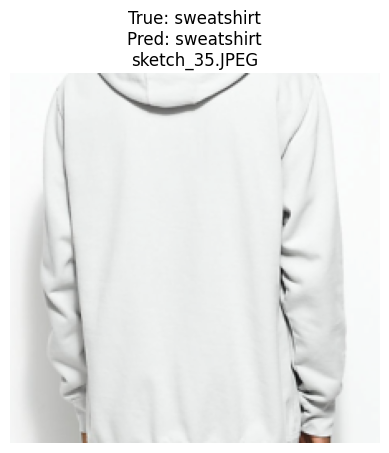

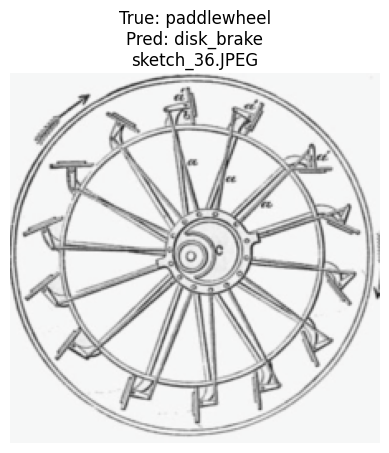

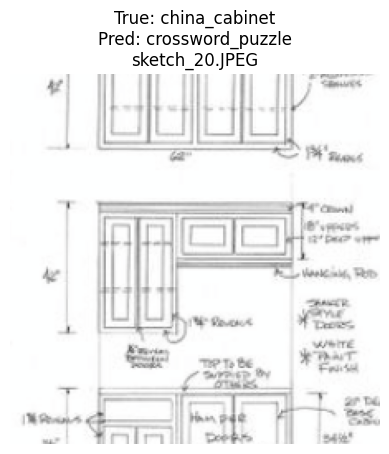

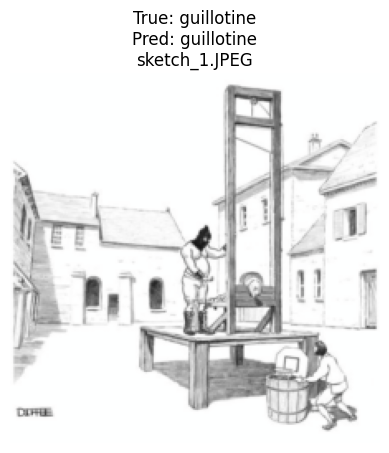

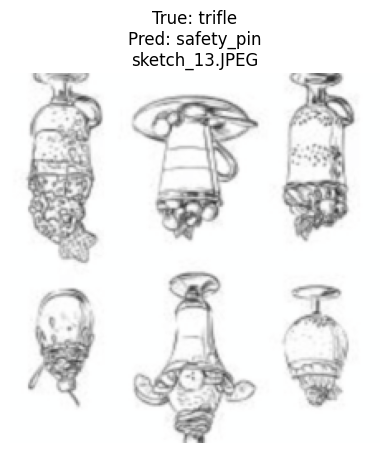

In [ ]:
import os
import json
from PIL import Image
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
import torch
from tqdm import tqdm

# === 1. Скачиваем и загружаем ImageNet class index mapping ===
import urllib.request

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = "imagenet_class_index.json"
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)

with open(fname, "r") as f:
    imagenet_class_index = json.load(f)
synset_to_idx = {v[0]: int(k) for k, v in imagenet_class_index.items()}
idx_to_name = {int(k): v[1] for k, v in imagenet_class_index.items()}

# === 2. Класс датасета ===
class ImageNetSketchDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.root_dir = root_dir
        # Сканируем все классы
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            if os.path.isdir(class_dir):
                for fname in os.listdir(class_dir):
                    if fname.lower().endswith('.jpeg'):
                        self.samples.append((os.path.join(class_dir, fname), class_id))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, class_id = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        label = synset_to_idx.get(class_id, -1)
        if self.transform:
            img = self.transform(img)
        return img, label, img_path

# === 3. Трансформации ===
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# === 4. Загрузка датасета ===
sketch_root = 'sketch'
dataset = ImageNetSketchDataset(sketch_root, transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

# === 5. Загрузка модели ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=True)
model.eval()
model.to(device)

# === 6. Accuracy ===
correct, total = 0, 0
for imgs, labels, _ in tqdm(dataloader):
    imgs, labels = imgs.to(device), labels.to(device)
    with torch.no_grad():
        logits = model(imgs)
        preds = logits.argmax(dim=1)
        mask = (labels != -1)
        correct += (preds[mask] == labels[mask]).sum().item()
        total += mask.sum().item()
print(f"ImageNet-Sketch Top-1 accuracy: {100*correct/total:.2f}%")

# === 7. Примеры предсказаний ===
import matplotlib.pyplot as plt
import numpy as np
from random import randint

N = 5
for _ in range(N):
    img, label, img_path = dataset[randint(0, len(dataset)-1)]
    with torch.no_grad():
        output = model(img.unsqueeze(0).to(device))
        pred = output.argmax(dim=1).item()
    # Денормализация
    im = img.numpy().transpose(1,2,0) * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    im = np.clip(im, 0, 1)
    plt.imshow(im)
    plt.title(f"True: {idx_to_name.get(label, '?')}\nPred: {idx_to_name.get(pred, '?')}\n{os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()


## BPDA

In [ ]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, Subset
from PIL import Image
import io
import numpy as np
import requests
from tqdm import tqdm # Для прогресс-баров

# --- Глобальные параметры нормализации ImageNet ---
# Используются для денормализации/нормализации при работе с PIL Image
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

# --- Вспомогательные функции для денормализации/нормализации тензоров ---
def denormalize_tensor(tensor, mean, std):
    """Денормализует тензор из нормализованного диапазона обратно в [0, 1]."""
    # Создаем тензоры для mean и std на том же устройстве, что и входной тензор
    mean_tensor = torch.tensor(mean, device=tensor.device).view(1, -1, 1, 1)
    std_tensor = torch.tensor(std, device=tensor.device).view(1, -1, 1, 1)
    return tensor.mul(std_tensor).add(mean_tensor)

def normalize_tensor(tensor, mean, std):
    """Нормализует тензор из диапазона [0, 1] в нормализованный диапазон ImageNet."""
    mean_tensor = torch.tensor(mean, device=tensor.device).view(1, -1, 1, 1)
    std_tensor = torch.tensor(std, device=tensor.device).view(1, -1, 1, 1)
    return tensor.sub(mean_tensor).div(std_tensor)

# --- 1. Определение функции PGD атаки (ПЕРЕМЕЩЕНО В НАЧАЛО) ---
def pgd_attack(model, x, y, eps=8/255, alpha=2/255, iters=20, clip_min=None, clip_max=None):
    """
    Выполняет PGD-атаку на модель.
    model: torch.nn.Module, готовый пайплайн (например, bpda_model)
    x: батч изображений [B,3,H,W], float32. Ожидается, что они уже нормализованы.
    y: метки [B]
    eps: максимальная L_inf норма пертурбации.
    alpha: размер шага PGD.
    iters: количество итераций PGD.
    clip_min, clip_max: Диапазон значений пикселей (для нормализованных данных).
                        Если None, будут использованы IMAGENET_MEAN/STD для расчета.
    """
    if clip_min is None or clip_max is None:
        # Рассчитываем clip_min/max для нормализованных значений
        # Приближенно, чтобы не усложнять, возьмем общие границы
        _min_val = -np.mean(IMAGENET_MEAN) / np.mean(IMAGENET_STD) # Примерно -2.5
        _max_val = (1 - np.mean(IMAGENET_MEAN)) / np.mean(IMAGENET_STD) # Примерно 2.5
        clip_min = min( (0 - m) / s for m, s in zip(IMAGENET_MEAN, IMAGENET_STD)) # Более точный min
        clip_max = max( (1 - m) / s for m, s in zip(IMAGENET_MEAN, IMAGENET_STD)) # Более точный max

        # Для простоты можно использовать жестко закодированные
        # clip_min, clip_max = -2.5, 2.5 # Или более точные значения, как в примере

    x_adv = x.clone().detach()

    # Инициализация случайным шумом в пределах eps-шара
    # Убедимся, что начальная пертурбация также находится в допустимом диапазоне пикселей
    random_noise = (torch.rand_like(x_adv) * 2 * eps - eps)
    x_adv = x_adv + random_noise
    x_adv = torch.clamp(x_adv, clip_min, clip_max) # Clamp к диапазону пикселей

    x_adv = x_adv.detach() # Отключить от графа, чтобы начать новый граф с requires_grad = True
    x_adv.requires_grad = True

    for i in range(iters):
        logits = model(x_adv)
        loss = torch.nn.functional.cross_entropy(logits, y)

        # Обнуляем градиенты перед backward, чтобы избежать их накопления
        # Если x_adv.grad уже None (в первой итерации), то zero_() вызовет ошибку
        # Поэтому делаем проверку или используем model.zero_grad()
        if x_adv.grad is not None:
            x_adv.grad.zero_()

        loss.backward()

        with torch.no_grad():
            # Если градиент по какой-то причине стал None (чего не должно быть с BPDA)
            # или если норма градиента очень мала, можно прервать атаку
            if x_adv.grad is None or x_adv.grad.norm().item() == 0:
                # print(f"PGD: Warning: Gradient is None or zero at iteration {i}. Attack stopped.")
                break

            grad = x_adv.grad
            x_adv.data += alpha * grad.sign() # Обновляем пертурбацию

            # Проекция на epsilon-шар (L-infinity)
            delta = x_adv.data - x # Разница от исходного изображения
            delta = torch.clamp(delta, -eps, eps) # Ограничиваем дельту
            x_adv.data = x + delta # Применяем ограниченную дельту

            # Clamp к диапазону пикселей
            x_adv.data = x_adv.data.clamp(clip_min, clip_max)

    return x_adv.detach()

# --- 2. BPDA Wrapper ---
class BPDAWrapper(torch.nn.Module):
    def __init__(self, forward_fn, backward_fn=None):
        """
        forward_fn: функция защиты (torch.Tensor -> torch.Tensor), обязательно batched: [B,3,H,W]->[B,3,H,W].
                    Ожидаются нормализованные тензоры.
        backward_fn: torch.Tensor -> torch.Tensor, функция для подмены backward-pass (по умолчанию identity).
                    Принимает grad_output, возвращает grad_input.
        """
        super().__init__()
        self.forward_fn = forward_fn
        # По умолчанию backward_fn - это тождественная функция (identity)
        self.backward_fn = backward_fn if backward_fn is not None else lambda x: x

    def forward(self, x):
        # Передаем forward_fn и backward_fn в статический метод apply
        return BPDAFunction.apply(x, self.forward_fn, self.backward_fn)

class BPDAFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, forward_fn, backward_fn):
        # Сохраняем backward_fn в контексте для использования в backward
        ctx.backward_fn = backward_fn
        # На прямом проходе выполняем защитную функцию, отключая отслеживание градиентов
        with torch.no_grad():
            out = forward_fn(x)
        return out

    @staticmethod
    def backward(ctx, grad_output):
        # В обратном проходе используем аппроксимацию (backward_fn)
        # для вычисления grad_input. Это и есть суть BPDA.
        grad_input = ctx.backward_fn(grad_output)
        # Возвращаем градиент для x, и None для forward_fn и backward_fn
        # так как по ним градиенты не нужны.
        return grad_input, None, None


# --- 3. Функции защиты (с исправленной нормализацией) ---
def median_defense_kornia(x, kernel_size=3):
    """Применяет медианный фильтр с помощью Kornia."""
    # Kornia median_blur работает с диапазоном [0,1] или [0,255] для `dtype=uint8`.
    # Для `float32` он обычно ожидает диапазон, в котором находятся ваши данные.
    # Так как мы передаем нормализованные данные, Kornia будет работать с ними.
    # Если бы Kornia требовала [0,1], то нужно было бы делать денормализацию/нормализацию.
    # Для `kornia.filters.median_blur` на `float32` вход, денормализация не требуется,
    # если не указано иное в документации или если вы не переводите в uint8.
    # Для JPEG - обязательно, для медианного фильтра - нет.
    return kornia.filters.median_blur(x, (kernel_size, kernel_size))

def jpeg_defense_batch(x, quality=15):
    """
    Применяет JPEG-сжатие к батчу изображений.
    x: батч тензоров [B,3,H,W], float32, нормализованные значения (e.g., ImageNet mean/std).
    Возвращает: батч тензоров [B,3,H,W], float32, снова нормализованные.
    """
    imgs_out = []
    for img_tensor in x:
        img_tensor = img_tensor.detach().cpu() # Отключаем от графа и переносим на CPU

        if img_tensor.ndim == 4 and img_tensor.shape[0] == 1:
            img_tensor = img_tensor.squeeze(0)  # (1,3,H,W) -> (3,H,W)
        elif img_tensor.ndim == 4:
            raise ValueError(f"Unexpected shape: {img_tensor.shape}")


        # 1. Денормализация тензора в диапазон [0, 1] для PIL
        img_denormalized = denormalize_tensor(img_tensor, IMAGENET_MEAN, IMAGENET_STD)
        img_denormalized = torch.clamp(img_denormalized, 0, 1) # Убеждаемся, что значения в [0, 1]

        if img_denormalized.ndim == 4 and img_denormalized.shape[0] == 1:
            img_denormalized = img_denormalized.squeeze(0)
        elif img_denormalized.ndim == 4:
            raise ValueError(f"Unexpected shape after denormalize: {img_denormalized.shape}")

        pil_img = transforms.ToPILImage()(img_denormalized)

        # 2. JPEG сжатие/декомпрессия
        buf = io.BytesIO()
        pil_img.save(buf, format='JPEG', quality=quality)
        buf.seek(0)
        pil_jpeg = Image.open(buf).convert('RGB')

        # 3. Обратная конвертация в тензор [0, 1]
        img_re_tensor = transforms.ToTensor()(pil_jpeg)

        # 4. Обратная нормализация тензора в стандартный диапазон ImageNet
        img_final = normalize_tensor(img_re_tensor, IMAGENET_MEAN, IMAGENET_STD)

        imgs_out.append(img_final)

    out = torch.stack(imgs_out).to(x.device)
    if out.ndim == 5 and out.shape[1] == 1:
        # Случай, когда получился [B, 1, 3, 224, 224]
        out = out.squeeze(1)
    elif out.ndim != 4:
        raise ValueError(f"Expected 4D output, got shape {out.shape}")
    return out

# --- Конфигурация и загрузка модели ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# Модель
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).eval().to(DEVICE)

# --- Настройка защиты с BPDA ---
bpda_defense = BPDAWrapper(
    forward_fn=lambda x: jpeg_defense_batch(x, quality=15),  # Функция JPEG-сжатия
    backward_fn=lambda x: x                                  # Аппроксимация градиента (identity)
)

# Пайплайн: защита -> модель
# Теперь bpda_model будет первым применять защиту, а затем передавать результат в ResNet-50
bpda_model = torch.nn.Sequential(bpda_defense, model)
bpda_model.eval() # Переводим весь пайплайн в режим оценки

# --- Загрузка и подготовка данных ImageNet ---
# Убедитесь, что у вас есть структура папок ImageNet:
# imagenet/val/n01440764/...images...
# imagenet/val/n01443537/...images...
imagenet_val_dir = './imagenet/val'  # Укажите ваш путь к папке с валидационными данными ImageNet

# Стандартные трансформации для ImageNet
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(), # Преобразует в [0,1]
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD) # Нормализует
])

# Загрузка всего датасета
dataset_full = datasets.ImageFolder(imagenet_val_dir, transform=transform)

# Выбор подмножества для более быстрой демонстрации (10% от валидационного набора)
n = len(dataset_full)
# Используем np.random.seed для воспроизводимости, если нужно
# np.random.seed(42)
indices = np.random.choice(n, int(n * 0.10), replace=False) # Выбираем 10% случайных индексов
subset = Subset(dataset_full, indices)

# Создание DataLoader
dataloader = DataLoader(subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True) # Уменьшил batch_size

# --- Оценка "чистой" точности (через защиту) ---
print("\n--- Evaluating Clean Accuracy (through defense) ---")
clean_correct, clean_total = 0, 0

with torch.no_grad():
    for images, labels in tqdm(dataloader, desc='Clean eval', unit='batch'):
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = bpda_model(images) # Пропускаем через BPDA-защиту и модель
        preds = outputs.argmax(dim=1)
        clean_correct += (preds == labels).sum().item()
        clean_total += labels.size(0)

print(f"Clean accuracy (через защиту): {100 * clean_correct / clean_total:.2f}%")

# --- Оценка устойчивости к BPDA-PGD атаке ---
print("\n--- Evaluating Robust Accuracy with BPDA-PGD Attack ---")
robust_correct, robust_total = 0, 0

# Параметры атаки
ATTACK_EPS = 4/255 # L_inf epsilon
ATTACK_ALPHA = 2/255 # PGD step size
ATTACK_ITERS = 5 # PGD iterations

# Вычисляем clip_min и clip_max для нормализованных данных
_clip_min = min( (0 - m) / s for m, s in zip(IMAGENET_MEAN, IMAGENET_STD))
_clip_max = max( (1 - m) / s for m, s in zip(IMAGENET_MEAN, IMAGENET_STD))

for images, labels in tqdm(dataloader, desc='BPDA-PGD eval', unit='batch'):
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    # Генерируем состязательные примеры с помощью BPDA-PGD
    adv_images = pgd_attack(bpda_model, images, labels,
                            eps=ATTACK_EPS, alpha=ATTACK_ALPHA, iters=ATTACK_ITERS,
                            clip_min=_clip_min, clip_max=_clip_max)

    with torch.no_grad(): # Оценка состязательных примеров без отслеживания градиентов
        logits = bpda_model(adv_images) # Пропускаем состязательный пример через защиту и модель
        preds = logits.argmax(dim=1)
        robust_correct += (preds == labels).sum().item()
        robust_total += labels.size(0)

print(f"BPDA-PGD robust accuracy: {100*robust_correct/robust_total:.2f}%")

print("\n--- Демонстрация завершена ---")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



--- Evaluating Clean Accuracy (through defense) ---


Clean eval: 100%|██████████| 157/157 [01:00<00:00,  2.60batch/s]


Clean accuracy (через защиту): 58.80%

--- Evaluating Robust Accuracy with BPDA-PGD Attack ---


BPDA-PGD eval: 100%|██████████| 157/157 [06:27<00:00,  2.47s/batch]

BPDA-PGD robust accuracy: 47.04%

--- Демонстрация завершена ---


## randomized_smoothing

In [ ]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import numpy as np
from tqdm import tqdm

# --- Настройка устройства ---
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 32
IMG_SIZE = 224

# --- Трансформации как в ImageNet ---
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)
])

# --- Датасет (ImageNet или любой ImageFolder с классами-именами как WNID) ---
imagenet_val_dir = './imagenet/val'  # ← Укажи свой путь!
dataset = datasets.ImageFolder(imagenet_val_dir, transform=transform)
n = len(dataset)
# Используем 10% датасета для скорости (или 100%, если хватит времени/ресурса)
indices = np.random.choice(n, int(n * 0.10), replace=False)
subset = Subset(dataset, indices)
dataloader = DataLoader(subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# --- Модель ResNet-50 ---
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).to(DEVICE).eval()

# --- Randomized Smoothing функция ---
def randomized_smoothing(model, x, num_samples=50, sigma=0.25, device='cuda'):
    """
    Для каждого входа x считает предсказание модели при гауссовом шуме sigma, num_samples раз.
    Возвращает наиболее частый класс.
    """
    model.eval()
    B = x.shape[0]
    counts = torch.zeros(B, 1000, device=device)  # 1000 классов ImageNet

    with torch.no_grad():
        for _ in range(num_samples):
            noise = torch.randn_like(x) * sigma
            logits = model(x + noise)
            preds = logits.argmax(dim=1)
            for i in range(B):
                counts[i, preds[i]] += 1

    smoothed_preds = counts.argmax(dim=1)
    return smoothed_preds

# --- Основной цикл: считаем обычную accuracy и smoothed accuracy ---
clean_correct, total = 0, 0
smooth_correct = 0
SIGMA = 0.25      # Стандартное значение для smoothing
N_SAMPLES = 50    # Можно 30 для быстроты

print("--- Evaluating clean and randomized smoothing accuracy ---")
for images, labels in tqdm(dataloader, desc="Batches"):
    images, labels = images.to(DEVICE), labels.to(DEVICE)
    total += labels.size(0)

    # Обычная accuracy
    with torch.no_grad():
        logits = model(images)
        preds = logits.argmax(dim=1)
        clean_correct += (preds == labels).sum().item()

    # Randomized Smoothing
    smoothed_preds = randomized_smoothing(model, images, num_samples=N_SAMPLES, sigma=SIGMA, device=DEVICE)
    smooth_correct += (smoothed_preds == labels).sum().item()

print(f"Clean accuracy: {100*clean_correct/total:.2f}%")
print(f"Randomized smoothing (σ={SIGMA}, n={N_SAMPLES}) accuracy: {100*smooth_correct/total:.2f}%")


--- Evaluating clean and randomized smoothing accuracy ---


Batches: 100%|██████████| 157/157 [12:03<00:00,  4.61s/it]

Clean accuracy: 75.38%
Randomized smoothing (σ=0.25, n=50) accuracy: 67.08%


In [ ]:
def fgsm_attack(model, images, labels, eps=8/255):
    images_adv = images.clone().detach().requires_grad_(True)
    outputs = model(images_adv)
    loss = torch.nn.functional.cross_entropy(outputs, labels)
    loss.backward()
    grad_sign = images_adv.grad.sign()
    images_adv = images_adv + eps * grad_sign
    # Не забудь про clip в диапазон нормализованных значений!
    images_adv = torch.max(torch.min(images_adv, images.max()), images.min())
    return images_adv.detach()

# Основной цикл
fgsm_correct, pgd_correct, total = 0, 0, 0

for images, labels in tqdm(dataloader):
    images, labels = images.to(DEVICE), labels.to(DEVICE)
    total += labels.size(0)

    # FGSM
    images_fgsm = fgsm_attack(model, images, labels, eps=8/255)
    with torch.no_grad():
        preds_fgsm = model(images_fgsm).argmax(dim=1)
        fgsm_correct += (preds_fgsm == labels).sum().item()

    # PGD
    images_pgd = pgd_attack(model, images, labels, eps=8/255, alpha=2/255, iters=10)
    with torch.no_grad():
        preds_pgd = model(images_pgd).argmax(dim=1)
        pgd_correct += (preds_pgd == labels).sum().item()

print(f"FGSM robust accuracy: {100*fgsm_correct/total:.2f}%")
print(f"PGD robust accuracy:  {100*pgd_correct/total:.2f}%")


100%|██████████| 157/157 [08:54<00:00,  3.40s/it]

FGSM robust accuracy: 8.00%
PGD robust accuracy:  0.12%


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import numpy as np
from tqdm import tqdm

# --- Параметры ---
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 128
IMG_SIZE = 224
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]
STADV_EPS = 0.06     # поле смещений, в относительных координатах grid_sample
STADV_STEPS = 25
STADV_STEP_SIZE = 0.02

# --- Трансформации ImageNet ---
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)
])

# --- Датасет (ImageNet или любой ImageFolder с WNID) ---
imagenet_val_dir = './imagenet/val'  # ← Укажи свой путь!
dataset = datasets.ImageFolder(imagenet_val_dir, transform=transform)
n = len(dataset)
indices = np.random.choice(n, int(n * 0.10), replace=False)  # 10% датасета для скорости
subset = Subset(dataset, indices)
dataloader = DataLoader(subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# --- Модель ResNet-50 ---
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).to(DEVICE).eval()

# --- Bilinear Grid Warping ---
def grid_sample(img, flow):
    # img: [B, 3, H, W], flow: [B, 2, H, W]
    B, C, H, W = img.shape
    grid_y, grid_x = torch.meshgrid(
        torch.linspace(-1, 1, H, device=img.device),
        torch.linspace(-1, 1, W, device=img.device),
        indexing='ij' if 'indexing' in torch.meshgrid.__code__.co_varnames else None
    )
    base_grid = torch.stack([grid_x, grid_y], dim=-1)  # [H, W, 2]
    base_grid = base_grid.unsqueeze(0).repeat(B, 1, 1, 1)  # [B, H, W, 2]
    flow_grid = flow.permute(0, 2, 3, 1)
    warped_grid = base_grid + flow_grid  # [B, H, W, 2]
    output = F.grid_sample(img, warped_grid, mode='bilinear', padding_mode='border', align_corners=True)
    return output

# --- StAdv-атака ---
def stadv_attack(model, images, labels, epsilon=0.03, steps=30, step_size=0.01):
    B, C, H, W = images.shape
    device = images.device
    model.eval()

    # Начальное поле смещений = 0
    flow = torch.zeros(B, 2, H, W, device=device, requires_grad=True)
    optimizer = torch.optim.Adam([flow], lr=step_size)
    loss_fn = nn.CrossEntropyLoss()

    for t in range(steps):
        optimizer.zero_grad()
        flow_clamped = torch.clamp(flow, -epsilon, epsilon)
        adv_images = grid_sample(images, flow_clamped)
        logits = model(adv_images)
        loss = -loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
    return grid_sample(images, torch.clamp(flow, -epsilon, epsilon)).detach()

# --- Оценка clean accuracy и StAdv fooling rate ---
clean_correct, stadv_correct, total = 0, 0, 0

print("--- Evaluating clean and StAdv attack robust accuracy ---")
for images, labels in tqdm(dataloader, desc="Batches"):
    images, labels = images.to(DEVICE), labels.to(DEVICE)
    total += labels.size(0)

    # Clean accuracy
    with torch.no_grad():
        logits_clean = model(images)
        preds_clean = logits_clean.argmax(dim=1)
        clean_correct += (preds_clean == labels).sum().item()

    # StAdv атака
    adv_images = stadv_attack(model, images, labels,
                              epsilon=STADV_EPS,
                              steps=STADV_STEPS,
                              step_size=STADV_STEP_SIZE)
    with torch.no_grad():
        logits_stadv = model(adv_images)
        preds_stadv = logits_stadv.argmax(dim=1)
        stadv_correct += (preds_stadv == labels).sum().item()

print(f"Clean accuracy: {100*clean_correct/total:.2f}%")
print(f"StAdv robust accuracy: {100*stadv_correct/total:.2f}%")
print("\n--- StAdv demo complete ---")


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 179MB/s]


--- Evaluating clean and StAdv attack robust accuracy ---


Batches: 100%|██████████| 40/40 [21:17<00:00, 31.93s/it]

Clean accuracy: 76.28%
StAdv robust accuracy: 0.20%

--- StAdv demo complete ---


In [ ]:
!pip install sympy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cu

# Эксперементы

### info

In [ ]:
MODELS = [
    "resnet-50",
    "hf:nvidia/MambaVision-T-1K",
    "hf:facebook/deit-base-distilled-patch16-224",
    "hf:microsoft/swin-tiny-patch4-window7-224",
    "timm:coatnet_0_rw_224.sw_in1k",
    "timm:mobilenetv4_hybrid_large.e600_r384_in1k",
    "timm:efficientnet_b3",
    "timm:swin_base_patch4_window7_224",
    "timm:convnextv2_tiny.fcmae_ft_in1k",
    "timm:beitv2_base_patch16_224"
]

In [ ]:
metric = {
    # classification
    #до и после атаки
    Accuracy,
    ECE,
    Inference Time,
    Params
    Accuracy (Top-5),
    NLL,
    Precision Macro,
    Recall Macro,
    Entropy Mean,
    Entropy Std,

    Average Min Perturbation Norm,
    LPIPS,

    Transfer ASR,
    Median Query Count,

    Common Corruption Accuracy (mCE),

    Certified Accuracy,
    Average Certified Radius (ACR),

    KL Divergence (Clean vs Adv),
    Feature distance,
    Attribution Stability,

    BPDA Success,

    Accuracy (на OOD),


    #detection
    mAP,
    Recall,
    Precision,
    FPS,
    Params,

    ASR,
    Median Queries,
    Avg Perturbation,
    LPIPS,
    MABD,
    SCD,
    EW-mAPD,

    mCE,
    Transferability,

    Certified Accuracy,
    Certified Radius,

    Attribution/CAMs Stability,
    Conf. drop,
    Feature Distance,
    KL divergence,

    mAP drop,
    False Positives,
    Miss Rate
}

### До изменений

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:beitv2_base_patch16_224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

100%|██████████| 117/117 [00:46<00:00,  2.52it/s]
ERROR:root:Error during plotting: 'MetricsCollector' object has no attribute 'plot_metrics'



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.023787
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.873130
Accuracy (Top-5)                0.985577
NLL                             0.507692
Precision Macro                 0.066500
Recall Macro                    0.065462
Entropy Mean                    1.240036
Entropy Std                     0.617867
ECE                             0.068168
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.023787050165681757), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:beitv2_base_patch16_224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

100%|██████████| 156/156 [22:21<00:00,  8.60s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.863911
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.198117
Accuracy (Top-5)                0.423878
NLL                             6.986444
Precision Macro                 0.029385
Recall Macro                    0.019826
Entropy Mean                    1.837807
Entropy Std                     1.711602
ECE                             0.614269
KL Divergence (Clean vs Adv)    5.299361
Transfer ASR                    0.000000
Attribution Stability           0.312779
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.863910914995731), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

100%|██████████| 78/78 [01:03<00:00,  1.22it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.063613
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.628806
Accuracy (Top-5)                0.835337
NLL                             1.807223
Precision Macro                 0.074043
Recall Macro                    0.062852
Entropy Mean                    1.326384
Entropy Std                     1.709050
ECE                             0.109907
KL Divergence (Clean vs Adv)    1.232743
Transfer ASR                    0.000000
Attribution Stability           0.372323
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.06361330166841164), 'Perturbation

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

100%|██████████| 78/78 [01:03<00:00,  1.22it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.059286
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.628806
Accuracy (Top-5)                0.835337
NLL                             1.807225
Precision Macro                 0.074043
Recall Macro                    0.062852
Entropy Mean                    1.326384
Entropy Std                     1.709051
ECE                             0.109907
KL Divergence (Clean vs Adv)    1.232746
Transfer ASR                    0.000000
Attribution Stability           0.372323
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.05928644155844664), 'Perturbation

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

100%|██████████| 78/78 [16:03<00:00, 12.35s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            12.116336
Perturbation L∞ Mean             1.702678
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.003405
Accuracy (Top-5)                 0.232572
NLL                             13.185411
Precision Macro                  0.000540
Recall Macro                     0.000340
Entropy Mean                     0.324094
Entropy Std                      0.968453
ECE                              0.926557
KL Divergence (Clean vs Adv)    15.835393
Transfer ASR                     0.000000
Attribution Stability            0.243347
BPDA Success                     0.845753
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(12.116335853552

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 250    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

 17%|█▋        | 27/156 [15:44<1:23:20, 38.77s/it]

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

100%|██████████| 39/39 [02:22<00:00,  3.66s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.274494
Perturbation L∞ Mean            0.338718
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.705529
Accuracy (Top-5)                0.934696
NLL                             1.123037
Precision Macro                 0.040831
Recall Macro                    0.035267
Entropy Mean                    2.161566
Entropy Std                     1.753296
ECE                             0.094327
KL Divergence (Clean vs Adv)    0.400221
Transfer ASR                    0.000000
Attribution Stability           0.883291
BPDA Success                    0.167869
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.274494171142578), 'Perturbation L

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

100%|██████████| 156/156 [26:33<00:00, 10.22s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            10.140630
Perturbation L∞ Mean             2.018230
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.836538
Accuracy (Top-5)                 0.948718
NLL                              0.837424
Precision Macro                  0.022741
Recall Macro                     0.020917
Entropy Mean                     2.019166
Entropy Std                      0.852677
ECE                              0.120994
KL Divergence (Clean vs Adv)     0.352039
Transfer ASR                     0.000000
Attribution Stability            0.373862
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(10.140630258963

### Ошибки

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_nes = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'nes',

        'attack_params': {
            'attack_eps': 8/255,  # чертёж бюджета
        }
    }




    benchmark = DeepGuardBenchmark(clf_config_nes)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/152M [00:00<?, ?B/s]

AttributeError: module 'foolbox.attacks' has no attribute 'NESAttack'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_hsj = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'hopskipjump',

        # В простейшем случае никаких доп. параметров не нужно:
        'attack_params': {
            'max_steps': 50,
            'epsilon': 0.1
            # Например, можно задать 'max_steps': 50, 'epsilon': 0.1 и т.д.,
            # если ваша версия HopSkipJumpAttack поддерживает.
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_hsj)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

NotImplementedError: 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_patch = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'patch',

        'attack_params': {
            'patch_size_ratio': 0.2,  # патч занимает 20% высоты/ширины картинки
            'steps': 100,             # число итераций обучения патча
            'lr': 0.1                 # learning rate
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_patch)
    results = benchmark.run()
    print("Results:", results)

NameError: name 'PatchAttack' is not defined

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_smoothing = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'randomized_smoothing',

        'attack_params': {
            'sigma':       0.25,   # например, стандартное отклонение шума
            'num_samples': 100,    # число «шотов» при усреднении
            'alpha':       0.001   # уровень доверия
        }
    }




    benchmark = DeepGuardBenchmark(clf_config_smoothing)
    results = benchmark.run()
    print("Results:", results)

AttributeError: module 'foolbox.attacks' has no attribute 'RandomizedSmoothingAttack'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_ibp = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'ibp',

        'attack_params': {
            'eps_max':   8/255,
            'eps_step':  2/255,
            'num_steps': 10
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_ibp)
    results = benchmark.run()
    print("Results:", results)

AttributeError: module 'foolbox.attacks' has no attribute 'IBPAttack'

### После

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,
        "attack": "ddn",
        "attack_params": {
            "init_epsilon": 1.0,  # (тот же параметр init_epsilon, что в демо-коде)
            "steps": 50,         # сколько итераций (как в демонстрации)
            "gamma": 0.05         # гамма-коэффициент (как в демонстрации)
        },
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 50.3MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 19/19 [09:34<00:00, 30.26s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            29.824809
Perturbation L∞ Mean             0.043874
LPIPS Mean                       0.000039
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.000000
Accuracy (Top-5)                 0.969572
NLL                              2.324841
Precision Macro                  0.000000
Recall Macro                     0.000000
Entropy Mean                     0.803407
Entropy Std                      0.674224
ECE                              0.699517
KL Divergence (Clean vs Adv)     1.845422
Transfer ASR                     0.000000
Attribution Stability            0.526446
BPDA Success                     0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(29.824808610113

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,
        "attack": "nes",
        'attack_params': {
            'steps': 10,
            'epsilon': 0.1,
            'sigma': 0.001,
            'lr': 0.01,
            'n_samples': 5
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [14:27<00:00,  5.56s/it]



--- Metrics Summary ---
                                       Value
Inference Time (avg)            5.518594e+00
Perturbation L∞ Mean            5.440932e-05
LPIPS Mean                      5.442260e-08
Feature Distance Mean           0.000000e+00
Median Query Count              0.000000e+00
Certified Accuracy              0.000000e+00
Average Certified Radius (ACR)  0.000000e+00
Accuracy                        9.278846e-01
Accuracy (Top-5)                9.823718e-01
NLL                             3.697138e-01
Precision Macro                 2.388911e-02
Recall Macro                    2.319833e-02
Entropy Mean                    1.612803e-01
Entropy Std                     5.218376e-01
ECE                             3.626065e-02
KL Divergence (Clean vs Adv)    6.495071e-08
Transfer ASR                    0.000000e+00
Attribution Stability           1.000000e+00
BPDA Success                    0.000000e+00
-----------------------

Results: defaultdict(<class 'dict'>, {'foundationa

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.01,
        "attack": "hopskipjump",
        "attack_params": {
            "steps": 5,
            "initial_gradient_eval_steps": 5
        }
    }

    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 7/7 [22:50<00:00, 195.84s/it]



--- Metrics Summary ---
                                     Value
Inference Time (avg)            195.443976
Perturbation L∞ Mean              1.741950
LPIPS Mean                        0.000000
Feature Distance Mean             0.000000
Median Query Count                0.000000
Certified Accuracy                0.000000
Average Certified Radius (ACR)    0.000000
Accuracy                          0.000000
Accuracy (Top-5)                  0.968750
NLL                               1.737533
Precision Macro                   0.000000
Recall Macro                      0.000000
Entropy Mean                      2.514396
Entropy Std                       1.555669
ECE                               0.363291
KL Divergence (Clean vs Adv)      1.091124
Transfer ASR                      0.000000
Attribution Stability             0.408828
BPDA Success                      0.734375
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.flo

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        "attack": "patch",
        "attack_params": {
            "steps": 10000,
            "learning_rate": 5.0,
            "rotation_max": 22.5,
            "scale_min": 0.1,
            "scale_max": 1.0,
            "batch_size": 16
        }
    }

    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [00:41<00:00,  1.90it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.020506
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.849159
Accuracy (Top-5)                0.968550
NLL                             0.696813
Precision Macro                 0.087307
Recall Macro                    0.084917
Entropy Mean                    0.283480
Entropy Std                     0.627866
ECE                             0.077860
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.020505752318944685), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.5,
        "attack": "patch",
        "attack_params": {
            "steps": 10000,
            "learning_rate": 5.0,
            "rotation_max": 22.5,
            "scale_min": 0.1,
            "scale_max": 1.0,
            "batch_size": 16
        }
    }

    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 391/391 [03:30<00:00,  1.86it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.030281
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.819733
Accuracy (Top-5)                0.956482
NLL                             0.867016
Precision Macro                 0.435307
Recall Macro                    0.410715
Entropy Mean                    2.071704
Entropy Std                     0.866183
ECE                             0.113989
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.030281232750934105), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean'

# Старые метрики:

## timm:resnet50


In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 88.1MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [01:04<00:00,  1.83it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.059289
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.828259
Accuracy (Top-5)                0.967415
NLL                             0.766626
Precision Macro                 0.064241
Recall Macro                    0.062091
Entropy Mean                    0.314492
Entropy Std                     0.658332
ECE                             0.090287
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.059288642345330655), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [05:42<00:00,  2.20s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)             1.784771
Perturbation L∞ Mean             2.012214
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.011218
Accuracy (Top-5)                 0.091546
NLL                             14.671376
Precision Macro                  0.002488
Recall Macro                     0.001120
Entropy Mean                     0.303106
Entropy Std                      1.099501
ECE                              0.936339
KL Divergence (Clean vs Adv)    17.455683
Transfer ASR                     0.000000
Attribution Stability            0.113885
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(1.7847708402535

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [05:33<00:00,  4.27s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)             3.493078
Perturbation L∞ Mean             2.012214
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.008814
Accuracy (Top-5)                 0.099760
NLL                             14.899660
Precision Macro                  0.001936
Recall Macro                     0.000880
Entropy Mean                     0.209759
Entropy Std                      0.953617
ECE                              0.956106
KL Divergence (Clean vs Adv)    17.923767
Transfer ASR                     0.000000
Attribution Stability            0.111583
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.4930782746046

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [04:49<00:00,  1.85s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            1.788204
Perturbation L∞ Mean            1.040162
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.474359
Accuracy (Top-5)                0.847356
NLL                             1.816160
Precision Macro                 0.032156
Recall Macro                    0.023706
Entropy Mean                    1.314744
Entropy Std                     1.727031
ECE                             0.245420
KL Divergence (Clean vs Adv)    1.304554
Transfer ASR                    0.000000
Attribution Stability           0.640264
BPDA Success                    0.516026
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(1.788204008188003), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [01:20<00:00,  2.07s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            1.827910
Perturbation L∞ Mean            0.486002
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.618590
Accuracy (Top-5)                0.888622
NLL                             1.518156
Precision Macro                 0.037752
Recall Macro                    0.030925
Entropy Mean                    0.894286
Entropy Std                     1.574571
ECE                             0.196093
KL Divergence (Clean vs Adv)    0.829187
Transfer ASR                    0.000000
Attribution Stability           0.817258
BPDA Success                    0.239583
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(1.8279098486289), 'Perturbation L∞ 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [15:03<00:00,  5.79s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            5.738201
Perturbation L∞ Mean            2.018230
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.754006
Accuracy (Top-5)                0.903846
NLL                             1.170052
Precision Macro                 0.022118
Recall Macro                    0.018856
Entropy Mean                    1.010923
Entropy Std                     1.538594
ECE                             0.074528
KL Divergence (Clean vs Adv)    0.912820
Transfer ASR                    0.000000
Attribution Stability           0.337159
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(5.7382006247838335), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

100%|██████████| 78/78 [01:03<00:00,  1.22it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.063613
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.628806
Accuracy (Top-5)                0.835337
NLL                             1.807223
Precision Macro                 0.074043
Recall Macro                    0.062852
Entropy Mean                    1.326384
Entropy Std                     1.709050
ECE                             0.109907
KL Divergence (Clean vs Adv)    1.232743
Transfer ASR                    0.000000
Attribution Stability           0.372323
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.06361330166841164), 'Perturbation

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:resnet50',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

100%|██████████| 78/78 [16:03<00:00, 12.35s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            12.116336
Perturbation L∞ Mean             1.702678
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.003405
Accuracy (Top-5)                 0.232572
NLL                             13.185411
Precision Macro                  0.000540
Recall Macro                     0.000340
Entropy Mean                     0.324094
Entropy Std                      0.968453
ECE                              0.926557
KL Divergence (Clean vs Adv)    15.835393
Transfer ASR                     0.000000
Attribution Stability            0.243347
BPDA Success                     0.845753
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(12.116335853552

## timm:coatnet_0_rw_224.sw_in1k

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [00:28<00:00,  4.07it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.044021
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.819979
Accuracy (Top-5)                0.956197
NLL                             0.859735
Precision Macro                 0.064156
Recall Macro                    0.061460
Entropy Mean                    2.043931
Entropy Std                     0.799271
ECE                             0.112567
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.04402142508417113), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean':

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [10:00<00:00,  3.85s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.335533
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.130409
Accuracy (Top-5)                0.258013
NLL                             8.968138
Precision Macro                 0.023529
Recall Macro                    0.013035
Entropy Mean                    1.575237
Entropy Std                     1.659621
ECE                             0.708697
KL Divergence (Clean vs Adv)    6.474169
Transfer ASR                    0.000000
Attribution Stability           0.161889
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.3355326301012282), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [10:00<00:00,  7.69s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.701853
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.082732
Accuracy (Top-5)                0.169271
NLL                             9.539434
Precision Macro                 0.016672
Recall Macro                    0.008268
Entropy Mean                    1.246302
Entropy Std                     1.396563
ECE                             0.764971
KL Divergence (Clean vs Adv)    6.975165
Transfer ASR                    0.000000
Attribution Stability           0.129501
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.701853113296704), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [07:09<00:00,  2.75s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            2.660534
Perturbation L∞ Mean            0.826829
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.582532
Accuracy (Top-5)                0.916266
NLL                             1.339569
Precision Macro                 0.035943
Recall Macro                    0.029108
Entropy Mean                    2.286097
Entropy Std                     1.017135
ECE                             0.176375
KL Divergence (Clean vs Adv)    0.531648
Transfer ASR                    0.000000
Attribution Stability           0.752137
BPDA Success                    0.411458
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(2.660534462867639), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [02:21<00:00,  3.64s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.269014
Perturbation L∞ Mean            0.272977
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.713542
Accuracy (Top-5)                0.931891
NLL                             1.098847
Precision Macro                 0.040343
Recall Macro                    0.035663
Entropy Mean                    2.103093
Entropy Std                     0.917497
ECE                             0.137208
KL Divergence (Clean vs Adv)    0.258701
Transfer ASR                    0.000000
Attribution Stability           0.907614
BPDA Success                    0.135817
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.2690137716440053), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [25:43<00:00,  9.89s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            9.818278
Perturbation L∞ Mean            2.018230
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.836538
Accuracy (Top-5)                0.947917
NLL                             0.838725
Precision Macro                 0.022739
Recall Macro                    0.020917
Entropy Mean                    2.017860
Entropy Std                     0.852390
ECE                             0.120375
KL Divergence (Clean vs Adv)    0.353368
Transfer ASR                    0.000000
Attribution Stability           0.373804
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(9.818277812921083), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [01:43<00:00,  1.33s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.337440
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.693710
Accuracy (Top-5)                0.893630
NLL                             1.431910
Precision Macro                 0.077123
Recall Macro                    0.069363
Entropy Mean                    2.308802
Entropy Std                     0.980887
ECE                             0.064162
KL Divergence (Clean vs Adv)    0.543881
Transfer ASR                    0.000000
Attribution Stability           0.418576
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.33743960735125417), 'Perturbation

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:coatnet_0_rw_224.sw_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [20:56<00:00, 32.22s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            32.012866
Perturbation L∞ Mean             1.813893
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.015224
Accuracy (Top-5)                 0.203526
NLL                              8.831526
Precision Macro                  0.001625
Recall Macro                     0.000385
Entropy Mean                     1.267648
Entropy Std                      1.196345
ECE                              0.794795
KL Divergence (Clean vs Adv)     7.000720
Transfer ASR                     0.000000
Attribution Stability            0.180091
BPDA Success                     0.899038
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(32.012865696197

## timm:mobilenetv4_hybrid_large.e600_r384_in1k


In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/152M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [00:26<00:00,  4.41it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.072536
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.811165
Accuracy (Top-5)                0.953526
NLL                             0.866382
Precision Macro                 0.063917
Recall Macro                    0.060811
Entropy Mean                    1.530405
Entropy Std                     0.636502
ECE                             0.059217
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.07253622397398338), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean':

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [05:37<00:00,  2.17s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            1.943907
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.192909
Accuracy (Top-5)                0.328926
NLL                             8.921096
Precision Macro                 0.030049
Recall Macro                    0.019268
Entropy Mean                    1.731206
Entropy Std                     1.518103
ECE                             0.582959
KL Divergence (Clean vs Adv)    6.739638
Transfer ASR                    0.000000
Attribution Stability           0.183189
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(1.9439066648483276), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [05:31<00:00,  4.25s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.853634
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.155248
Accuracy (Top-5)                0.268429
NLL                             9.645427
Precision Macro                 0.025485
Recall Macro                    0.015511
Entropy Mean                    1.477289
Entropy Std                     1.361738
ECE                             0.622643
KL Divergence (Clean vs Adv)    7.406771
Transfer ASR                    0.000000
Attribution Stability           0.155970
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.8536335749503894), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [28:28<00:00, 10.95s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            10.839417
Perturbation L∞ Mean             0.592864
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.690705
Accuracy (Top-5)                 0.877404
NLL                              1.379449
Precision Macro                  0.040432
Recall Macro                     0.034525
Entropy Mean                     1.662598
Entropy Std                      0.878621
ECE                              0.144625
KL Divergence (Clean vs Adv)     0.611330
Transfer ASR                     0.000000
Attribution Stability            0.809271
BPDA Success                     0.294471
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(10.839416814156

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [01:24<00:00,  2.17s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            1.910970
Perturbation L∞ Mean            0.341954
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.671474
Accuracy (Top-5)                0.908253
NLL                             1.254930
Precision Macro                 0.039311
Recall Macro                    0.033558
Entropy Mean                    1.640189
Entropy Std                     0.836892
ECE                             0.141969
KL Divergence (Clean vs Adv)    0.417437
Transfer ASR                    0.000000
Attribution Stability           0.880204
BPDA Success                    0.169471
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(1.9109701804625683), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [15:11<00:00,  5.84s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            5.782215
Perturbation L∞ Mean            2.018230
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.786859
Accuracy (Top-5)                0.912660
NLL                             1.069672
Precision Macro                 0.022178
Recall Macro                    0.019677
Entropy Mean                    1.742844
Entropy Std                     0.798058
ECE                             0.085872
KL Divergence (Clean vs Adv)    0.579290
Transfer ASR                    0.000000
Attribution Stability           0.407344
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(5.782215274297274), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [01:02<00:00,  1.26it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.382707
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.658253
Accuracy (Top-5)                0.853766
NLL                             1.727179
Precision Macro                 0.074752
Recall Macro                    0.065808
Entropy Mean                    1.976046
Entropy Std                     0.831853
ECE                             0.064298
KL Divergence (Clean vs Adv)    0.770038
Transfer ASR                    0.000000
Attribution Stability           0.425909
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.38270660241444904), 'Perturbation

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:mobilenetv4_hybrid_large.e600_r384_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 15/39 [14:33<41:16, 103.20s/it]

## timm/deit_base_distilled_patch16_224.fb_in1k



In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/349M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [00:51<00:00,  2.26it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.036386
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.860577
Accuracy (Top-5)                0.980235
NLL                             0.559882
Precision Macro                 0.066099
Recall Macro                    0.064519
Entropy Mean                    0.266605
Entropy Std                     0.480304
ECE                             0.063472
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.036385788876786195), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [23:03<00:00,  8.87s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.597393
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.094551
Accuracy (Top-5)                0.370994
NLL                             7.826599
Precision Macro                 0.016593
Recall Macro                    0.009444
Entropy Mean                    1.137510
Entropy Std                     1.255262
ECE                             0.674902
KL Divergence (Clean vs Adv)    6.778500
Transfer ASR                    0.000000
Attribution Stability           0.249244
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.5973927944134445), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [22:11<00:00, 17.07s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            12.867831
Perturbation L∞ Mean             2.012214
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.068710
Accuracy (Top-5)                 0.317107
NLL                              8.867738
Precision Macro                  0.012363
Recall Macro                     0.006868
Entropy Mean                     0.808617
Entropy Std                      1.049944
ECE                              0.773404
KL Divergence (Clean vs Adv)     7.866098
Transfer ASR                     0.000000
Attribution Stability            0.219748
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(12.867831407449

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [16:45<00:00,  6.44s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.219776
Perturbation L∞ Mean            0.640939
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.679087
Accuracy (Top-5)                0.937099
NLL                             0.882721
Precision Macro                 0.039076
Recall Macro                    0.033937
Entropy Mean                    0.805409
Entropy Std                     1.343532
ECE                             0.134843
KL Divergence (Clean vs Adv)    0.471993
Transfer ASR                    0.000000
Attribution Stability           0.825128
BPDA Success                    0.318510
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.219776035883488), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [05:57<00:00,  9.17s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            8.370795
Perturbation L∞ Mean            0.249554
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.759615
Accuracy (Top-5)                0.954728
NLL                             0.781264
Precision Macro                 0.041601
Recall Macro                    0.037967
Entropy Mean                    0.530572
Entropy Std                     1.102669
ECE                             0.115479
KL Divergence (Clean vs Adv)    0.277395
Transfer ASR                    0.000000
Attribution Stability           0.925346
BPDA Success                    0.123397
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(8.370795329411825), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [1:03:43<00:00, 24.51s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            24.391974
Perturbation L∞ Mean             2.018230
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.854968
Accuracy (Top-5)                 0.960737
NLL                              0.589594
Precision Macro                  0.022892
Recall Macro                     0.021378
Entropy Mean                     0.861123
Entropy Std                      1.096963
ECE                              0.032058
KL Divergence (Clean vs Adv)     0.356700
Transfer ASR                     0.000000
Attribution Stability            0.505720
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(24.391973891319

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [03:57<00:00,  3.04s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.042682
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.735176
Accuracy (Top-5)                0.915665
NLL                             1.085725
Precision Macro                 0.079267
Recall Macro                    0.073495
Entropy Mean                    1.159036
Entropy Std                     1.301795
ECE                             0.039457
KL Divergence (Clean vs Adv)    0.573321
Transfer ASR                    0.000000
Attribution Stability           0.527829
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.04268228090726412), 'Perturbation

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:deit_base_distilled_patch16_224.fb_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 19/19 [1:12:49<00:00, 229.99s/it]



--- Metrics Summary ---
                                     Value
Inference Time (avg)            229.144336
Perturbation L∞ Mean              1.803049
LPIPS Mean                        0.000000
Feature Distance Mean             0.000000
Median Query Count                0.000000
Certified Accuracy                0.000000
Average Certified Radius (ACR)    0.000000
Accuracy                          0.044408
Accuracy (Top-5)                  0.371711
NLL                               8.343789
Precision Macro                   0.005046
Recall Macro                      0.001208
Entropy Mean                      0.684149
Entropy Std                       0.906046
ECE                               0.821881
KL Divergence (Clean vs Adv)      8.008033
Transfer ASR                      0.000000
Attribution Stability             0.257499
BPDA Success                      0.894737
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.flo

## timm:efficientnet_b3



In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/349M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [00:51<00:00,  2.26it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.036386
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.860577
Accuracy (Top-5)                0.980235
NLL                             0.559882
Precision Macro                 0.066099
Recall Macro                    0.064519
Entropy Mean                    0.266605
Entropy Std                     0.480304
ECE                             0.063472
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.036385788876786195), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [23:03<00:00,  8.87s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.597393
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.094551
Accuracy (Top-5)                0.370994
NLL                             7.826599
Precision Macro                 0.016593
Recall Macro                    0.009444
Entropy Mean                    1.137510
Entropy Std                     1.255262
ECE                             0.674902
KL Divergence (Clean vs Adv)    6.778500
Transfer ASR                    0.000000
Attribution Stability           0.249244
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.5973927944134445), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [22:11<00:00, 17.07s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            12.867831
Perturbation L∞ Mean             2.012214
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.068710
Accuracy (Top-5)                 0.317107
NLL                              8.867738
Precision Macro                  0.012363
Recall Macro                     0.006868
Entropy Mean                     0.808617
Entropy Std                      1.049944
ECE                              0.773404
KL Divergence (Clean vs Adv)     7.866098
Transfer ASR                     0.000000
Attribution Stability            0.219748
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(12.867831407449

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [16:45<00:00,  6.44s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.219776
Perturbation L∞ Mean            0.640939
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.679087
Accuracy (Top-5)                0.937099
NLL                             0.882721
Precision Macro                 0.039076
Recall Macro                    0.033937
Entropy Mean                    0.805409
Entropy Std                     1.343532
ECE                             0.134843
KL Divergence (Clean vs Adv)    0.471993
Transfer ASR                    0.000000
Attribution Stability           0.825128
BPDA Success                    0.318510
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.219776035883488), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [05:57<00:00,  9.17s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            8.370795
Perturbation L∞ Mean            0.249554
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.759615
Accuracy (Top-5)                0.954728
NLL                             0.781264
Precision Macro                 0.041601
Recall Macro                    0.037967
Entropy Mean                    0.530572
Entropy Std                     1.102669
ECE                             0.115479
KL Divergence (Clean vs Adv)    0.277395
Transfer ASR                    0.000000
Attribution Stability           0.925346
BPDA Success                    0.123397
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(8.370795329411825), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 3/156 [01:14<1:02:49, 24.64s/it]

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:efficientnet_b3',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

## hf:microsoft/swin-tiny-patch4-window7-224

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 64.0MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [01:06<00:00,  1.77it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.123526
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.844017
Accuracy (Top-5)                0.973558
NLL                             0.673728
Precision Macro                 0.065011
Recall Macro                    0.063271
Entropy Mean                    1.570349
Entropy Std                     0.782707
ECE                             0.081338
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.12352584569882123), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean':

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [08:44<00:00,  3.36s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)             2.970278
Perturbation L∞ Mean             2.012214
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.051082
Accuracy (Top-5)                 0.098958
NLL                             10.086161
Precision Macro                  0.014591
Recall Macro                     0.005108
Entropy Mean                     3.576871
Entropy Std                      2.620112
ECE                              0.461690
KL Divergence (Clean vs Adv)     8.143869
Transfer ASR                     0.000000
Attribution Stability            0.079367
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(2.9702780919197

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [08:45<00:00,  6.74s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)             5.991780
Perturbation L∞ Mean             2.012214
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.020032
Accuracy (Top-5)                 0.047476
NLL                             10.831285
Precision Macro                  0.006434
Recall Macro                     0.002004
Entropy Mean                     3.188192
Entropy Std                      2.302823
ECE                              0.492738
KL Divergence (Clean vs Adv)     8.619941
Transfer ASR                     0.000000
Attribution Stability            0.047598
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(5.9917797155869

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [06:06<00:00,  2.35s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            2.253007
Perturbation L∞ Mean            0.950225
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.524038
Accuracy (Top-5)                0.912660
NLL                             1.679501
Precision Macro                 0.033522
Recall Macro                    0.026183
Entropy Mean                    3.354079
Entropy Std                     2.328111
ECE                             0.134651
KL Divergence (Clean vs Adv)    0.882204
Transfer ASR                    0.000000
Attribution Stability           0.710376
BPDA Success                    0.473558
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(2.253006507188846), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [02:18<00:00,  3.55s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.179976
Perturbation L∞ Mean            0.338718
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.705529
Accuracy (Top-5)                0.934696
NLL                             1.123037
Precision Macro                 0.040831
Recall Macro                    0.035267
Entropy Mean                    2.161566
Entropy Std                     1.753296
ECE                             0.094327
KL Divergence (Clean vs Adv)    0.400221
Transfer ASR                    0.000000
Attribution Stability           0.883291
BPDA Success                    0.167869
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.179975839761587), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [24:12<00:00,  9.31s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            9.242347
Perturbation L∞ Mean            2.018230
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.851763
Accuracy (Top-5)                0.946314
NLL                             1.695875
Precision Macro                 0.022971
Recall Macro                    0.021298
Entropy Mean                    5.144901
Entropy Std                     0.955078
ECE                             0.555494
KL Divergence (Clean vs Adv)    0.994814
Transfer ASR                    0.000000
Attribution Stability           0.412918
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(9.24234734284572), 'Perturbation L∞

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [01:36<00:00,  1.23s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.491955
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.688101
Accuracy (Top-5)                0.884415
NLL                             2.205973
Precision Macro                 0.076238
Recall Macro                    0.068795
Entropy Mean                    5.172048
Entropy Std                     1.062309
ECE                             0.416299
KL Divergence (Clean vs Adv)    1.158213
Transfer ASR                    0.000000
Attribution Stability           0.446374
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.4919545558782724), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'hf:microsoft/swin-tiny-patch4-window7-224',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [40:13<00:00, 30.94s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            30.606460
Perturbation L∞ Mean             1.730267
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.004207
Accuracy (Top-5)                 0.148838
NLL                              9.424838
Precision Macro                  0.001207
Recall Macro                     0.000420
Entropy Mean                     2.990926
Entropy Std                      2.049500
ECE                              0.512132
KL Divergence (Clean vs Adv)     7.556922
Transfer ASR                     0.000000
Attribution Stability            0.174027
BPDA Success                     0.859375
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(30.606460063885

## timm:convnextv2_tiny.fcmae_ft_in1k

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 117/117 [00:29<00:00,  4.01it/s]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.032289
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.850694
Accuracy (Top-5)                0.980235
NLL                             0.610842
Precision Macro                 0.065306
Recall Macro                    0.063774
Entropy Mean                    1.306968
Entropy Std                     0.627991
ECE                             0.055778
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.03228869193639511), 'Perturbation L∞ Mean': np.float32(0.0), 'LPIPS Mean':

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [10:28<00:00,  4.03s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.518628
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.048678
Accuracy (Top-5)                0.099359
NLL                             9.993258
Precision Macro                 0.015645
Recall Macro                    0.004864
Entropy Mean                    3.521002
Entropy Std                     2.409401
ECE                             0.465059
KL Divergence (Clean vs Adv)    8.025857
Transfer ASR                    0.000000
Attribution Stability           0.070646
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.5186276038487754), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [10:25<00:00,  8.02s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.995088
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.046474
Accuracy (Top-5)                0.095753
NLL                             9.934320
Precision Macro                 0.015122
Recall Macro                    0.004640
Entropy Mean                    3.405111
Entropy Std                     2.098510
ECE                             0.466047
KL Divergence (Clean vs Adv)    7.961876
Transfer ASR                    0.000000
Attribution Stability           0.061944
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.995087641936082), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [10:50<00:00,  4.17s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            4.075582
Perturbation L∞ Mean            0.978250
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.510417
Accuracy (Top-5)                0.913061
NLL                             1.618995
Precision Macro                 0.034117
Recall Macro                    0.025510
Entropy Mean                    3.140994
Entropy Std                     2.278992
ECE                             0.134468
KL Divergence (Clean vs Adv)    0.957532
Transfer ASR                    0.000000
Attribution Stability           0.681306
BPDA Success                    0.485978
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(4.075582172626104), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [02:30<00:00,  3.85s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.449971
Perturbation L∞ Mean            0.352099
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.701522
Accuracy (Top-5)                0.939904
NLL                             1.087082
Precision Macro                 0.040856
Recall Macro                    0.035072
Entropy Mean                    1.935731
Entropy Std                     1.723146
ECE                             0.092930
KL Divergence (Clean vs Adv)    0.442422
Transfer ASR                    0.000000
Attribution Stability           0.873051
BPDA Success                    0.174679
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.4499705021197977), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [26:11<00:00, 10.07s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            10.001997
Perturbation L∞ Mean             2.018230
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.843750
Accuracy (Top-5)                 0.958333
NLL                              1.684031
Precision Macro                  0.022927
Recall Macro                     0.021096
Entropy Mean                     5.057010
Entropy Std                      1.032062
ECE                              0.548142
KL Divergence (Clean vs Adv)     1.100803
Transfer ASR                     0.000000
Attribution Stability            0.321600
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(10.001997351646

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [01:50<00:00,  1.41s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.379322
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.699319
Accuracy (Top-5)                0.894431
NLL                             2.200272
Precision Macro                 0.077146
Recall Macro                    0.069923
Entropy Mean                    5.282793
Entropy Std                     0.863438
ECE                             0.452048
KL Divergence (Clean vs Adv)    1.312826
Transfer ASR                    0.000000
Attribution Stability           0.371436
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.37932225068410236), 'Perturbation

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'timm:convnextv2_tiny.fcmae_ft_in1k',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [11:13<00:00, 17.26s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            17.059963
Perturbation L∞ Mean             1.880406
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.006410
Accuracy (Top-5)                 0.129808
NLL                              9.089268
Precision Macro                  0.000716
Recall Macro                     0.000160
Entropy Mean                     3.164876
Entropy Std                      1.873159
ECE                              0.478777
KL Divergence (Clean vs Adv)     7.744035
Transfer ASR                     0.000000
Attribution Stability            0.117025
BPDA Success                     0.931891
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(17.059963061259

## hf:nvidia/MambaVision-T-1K

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.075,
        # Attack
        'attack': None,
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

ValueError: Could not load model 'hf:nvidia/MambaVision-T-1K'

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,
        'attack': 'mim',
        # Add attack-specific parameters
        'attack_params': {
            'eps':   8/255,
            'steps': 10,
            'decay': 1.0,
            'alpha': 2/255        # если хотите задать свой шаг (alpha) для MIM
        }
    }
    benchmark = DeepGuardBenchmark(clf_config)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [10:28<00:00,  4.03s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.518628
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.048678
Accuracy (Top-5)                0.099359
NLL                             9.993258
Precision Macro                 0.015645
Recall Macro                    0.004864
Entropy Mean                    3.521002
Entropy Std                     2.409401
ECE                             0.465059
KL Divergence (Clean vs Adv)    8.025857
Transfer ASR                    0.000000
Attribution Stability           0.070646
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.5186276038487754), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_pgd = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        'attack': 'pgd',

        'attack_params': {
            'eps':   8/255,   # L∞-бюджет
            'alpha': 2/255,   # шаг
            'steps': 10       # число итераций
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_pgd)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [10:25<00:00,  8.02s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            6.995088
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.046474
Accuracy (Top-5)                0.095753
NLL                             9.934320
Precision Macro                 0.015122
Recall Macro                    0.004640
Entropy Mean                    3.405111
Entropy Std                     2.098510
ECE                             0.466047
KL Divergence (Clean vs Adv)    7.961876
Transfer ASR                    0.000000
Attribution Stability           0.061944
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(6.995087641936082), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_cw = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 16,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'cw_l2',

        'attack_params': {
            'c':     1e-3,   # коэффициент штрафа
            'steps': 100    # число итераций 100 ворк 5 мин
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_cw)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [10:50<00:00,  4.17s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            4.075582
Perturbation L∞ Mean            0.978250
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.510417
Accuracy (Top-5)                0.913061
NLL                             1.618995
Precision Macro                 0.034117
Recall Macro                    0.025510
Entropy Mean                    3.140994
Entropy Std                     2.278992
ECE                             0.134468
KL Divergence (Clean vs Adv)    0.957532
Transfer ASR                    0.000000
Attribution Stability           0.681306
BPDA Success                    0.485978
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(4.075582172626104), 'Perturbation L

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_square = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.05,

        'attack': 'square',

        # Для Square Attack используем ключи: attack_norm, attack_eps, attack_n_queries, attack_n_restarts, attack_p_init
        'attack_params': {
            'attack_norm':     'Linf',
            'attack_eps':      8/255,
            'attack_n_queries': 1000,
            'attack_n_restarts': 1,
            'attack_p_init':   0.8
        }
    }


    benchmark = DeepGuardBenchmark(clf_config_square)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [02:30<00:00,  3.85s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            3.449971
Perturbation L∞ Mean            0.352099
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.701522
Accuracy (Top-5)                0.939904
NLL                             1.087082
Precision Macro                 0.040856
Recall Macro                    0.035072
Entropy Mean                    1.935731
Entropy Std                     1.723146
ECE                             0.092930
KL Divergence (Clean vs Adv)    0.442422
Transfer ASR                    0.000000
Attribution Stability           0.873051
BPDA Success                    0.174679
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(3.4499705021197977), 'Perturbation 

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_spsa = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 8,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'spsa',

        'attack_params': {
            'attack_eps':      8/255,
            'attack_nb_sample': 4
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_spsa)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 156/156 [26:11<00:00, 10.07s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            10.001997
Perturbation L∞ Mean             2.018230
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.843750
Accuracy (Top-5)                 0.958333
NLL                              1.684031
Precision Macro                  0.022927
Recall Macro                     0.021096
Entropy Mean                     5.057010
Entropy Std                      1.032062
ECE                              0.548142
KL Divergence (Clean vs Adv)     1.100803
Transfer ASR                     0.000000
Attribution Stability            0.321600
BPDA Success                     1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(10.001997351646

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_fgsm = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 64,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.1,

        # Название атаки
        'attack': 'fgsm',

        # В attack_params передаём только eps
        'attack_params': {
            'eps': 2/255  # допустим, хотим максимальное изменение 2/255
        }
    }

    benchmark = DeepGuardBenchmark(clf_config_fgsm)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 78/78 [01:50<00:00,  1.41s/it]



--- Metrics Summary ---
                                   Value
Inference Time (avg)            0.379322
Perturbation L∞ Mean            2.012214
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.699319
Accuracy (Top-5)                0.894431
NLL                             2.200272
Precision Macro                 0.077146
Recall Macro                    0.069923
Entropy Mean                    5.282793
Entropy Std                     0.863438
ECE                             0.452048
KL Divergence (Clean vs Adv)    1.312826
Transfer ASR                    0.000000
Attribution Stability           0.371436
BPDA Success                    1.000000
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(0.37932225068410236), 'Perturbation

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    clf_config_auto = {
        'model': 'hf:nvidia/MambaVision-T-1K',
        'data_dir': './imagenet/',
        'dataset_name': 'imagenet',
        'batch_size': 32,
        'device': 'cuda',
        'task_type': 'classification',
        'num_classes_clf': 1000,
        'img_size': 224,
        'val_fraction': 0.025,

        'attack': 'autoattack',

        'attack_params': {
            'eps':   8/255,    # L∞-предел
            'norm':  'Linf'    # можно 'L2', если хотите L2-режим
            # при желании можно добавить 'version': 'standard' или др. (если ваша версия AutoAttack поддерживает)
        }
    }



    benchmark = DeepGuardBenchmark(clf_config_auto)
    results = benchmark.run()
    print("Results:", results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 39/39 [11:13<00:00, 17.26s/it]



--- Metrics Summary ---
                                    Value
Inference Time (avg)            17.059963
Perturbation L∞ Mean             1.880406
LPIPS Mean                       0.000000
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.006410
Accuracy (Top-5)                 0.129808
NLL                              9.089268
Precision Macro                  0.000716
Recall Macro                     0.000160
Entropy Mean                     3.164876
Entropy Std                      1.873159
ECE                              0.478777
KL Divergence (Clean vs Adv)     7.744035
Transfer ASR                     0.000000
Attribution Stability            0.117025
BPDA Success                     0.931891
-----------------------

Results: defaultdict(<class 'dict'>, {'foundational_eval': {'Inference Time (avg)': np.float64(17.059963061259

# Итог

In [ ]:
!tar -xvf /content/drive/MyDrive/Tiny-ImageNet-C.tar

Выходные данные были обрезаны до нескольких последних строк (5000).
Tiny-ImageNet-C/zoom_blur/1/n04562935/test_8949.JPEG
Tiny-ImageNet-C/zoom_blur/1/n04562935/test_6394.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_6297.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_5044.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_6615.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_3643.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_286.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_3962.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_5058.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_868.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_6492.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_5311.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_7778.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_8542.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_9007.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_4372.JPEG
Tiny-ImageNet-C/zoom_blur/1/n02950826/test_126.

In [ ]:
!unzip /content/drive/MyDrive/ImageNet-Sketch.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: sketch/n03980874/sketch_12.JPEG  
  inflating: sketch/n03980874/sketch_11.JPEG  
  inflating: sketch/n03980874/sketch_10.JPEG  
  inflating: sketch/n03980874/sketch_9.JPEG  
  inflating: sketch/n03980874/sketch_8.JPEG  
  inflating: sketch/n03980874/sketch_7.JPEG  
  inflating: sketch/n03980874/sketch_6.JPEG  
  inflating: sketch/n03980874/sketch_5.JPEG  
  inflating: sketch/n03980874/sketch_4.JPEG  
  inflating: sketch/n03980874/sketch_3.JPEG  
  inflating: sketch/n03980874/sketch_2.JPEG  
  inflating: sketch/n03980874/sketch_1.JPEG  
  inflating: sketch/n03980874/sketch_0.JPEG  
   creating: sketch/n03977966/
  inflating: sketch/n03977966/sketch_50.JPEG  
  inflating: sketch/n03977966/sketch_49.JPEG  
  inflating: sketch/n03977966/sketch_48.JPEG  
  inflating: sketch/n03977966/sketch_47.JPEG  
  inflating: sketch/n03977966/sketch_46.JPEG  
  inflating: sketch/n03977966/sketch_45.JPEG  
  inflating: sketc

In [7]:
!pip install torchattacks foolbox
!pip install adversarial-robustness-toolbox
!pip install sympy --upgrade
!pip install kornia
!pip install lpips
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [1]:
import torch
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
import time
import logging
import gc
from collections import defaultdict
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import json
import urllib.request
import io


# --- Optional imports ---
try:
    from torchmetrics.detection import MeanAveragePrecision
    from torchmetrics.classification import Accuracy, CalibrationError
    TORCHMETRICS_AVAILABLE = True
except ImportError:
    TORCHMETRICS_AVAILABLE = False
    logging.warning("torchmetrics not found. Some metrics will be unavailable.")

try:
    from tqdm import tqdm
    TQDM_AVAILABLE = True
except ImportError:
    TQDM_AVAILABLE = False
    logging.warning("tqdm not found; progress bars will be disabled.")

try:
    import lpips
    LPIPS_AVAILABLE = True
except ImportError:
    LPIPS_AVAILABLE = False
    logging.warning("lpips not found. LPIPS metric will be unavailable.")

try:
    import kornia
    KORNIA_AVAILABLE = True
except ImportError:
    KORNIA_AVAILABLE = False
    logging.warning("kornia not found. Some defense functions will be unavailable.")


# --- Logging Configuration ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


# --- MetricsCollector Class ---
class MetricsCollector:
    def __init__(self, num_classes_clf=1000, task_type='classification', device='cpu'):
        self.task_type = task_type
        self.num_classes_clf = num_classes_clf
        self.device = device
        self.reset()

        # Инициализация метрик torchmetrics
        if TORCHMETRICS_AVAILABLE:
            self.accuracy_metric = Accuracy(task='multiclass', num_classes=num_classes_clf).to(device)
            self.ece_metric = CalibrationError(task='multiclass', num_classes=num_classes_clf).to(device)

    def reset(self):
        # Общие метрики
        self.perturbations = []
        self.inference_times = []
        self.lpips_values = []
        self.feature_distances = []
        self.query_counts = []
        self.certified_radii = []

        # Классификация
        self.preds_clf = []
        self.labels_clf = []
        self.confs_clf = []
        self.logits_clf = []
        self.entropy_vals_clf = []
        self.clean_logits_clf = []
        self.adv_logits_clf = []
        self.clean_features = []
        self.adv_features = []
        self.ood_scores = []

        # Детекция
        self.det_preds = []
        self.adv_preds_det = []
        self.clean_preds_det = []
        self.det_labels = []
        self.confidence_drops = []
        self.false_positives = []
        self.miss_rates = []

        # Сертифицированная устойчивость
        self.certified_correct = 0
        self.total_certified = 0

        # Randomized Smoothing
        self.smoothed_correct = 0
        self.smoothed_total = 0

    def update(self, outputs, targets, clean_outputs=None, adv_input=None, clean_input=None, time_taken=None):
        # Норма возмущений
        if adv_input is not None and clean_input is not None:
            perturb = (adv_input - clean_input).view(adv_input.size(0), -1)
            norm = torch.norm(perturb, p=float('inf'), dim=1)
            self.perturbations.extend(norm.detach().cpu().numpy())

        # Время инференса
        if time_taken is not None:
            self.inference_times.append(time_taken)

        if self.task_type == 'classification':
            self._update_classification(outputs, targets, clean_outputs)
        elif self.task_type == 'detection':
            self._update_detection(outputs, targets, clean_outputs)

    def _update_classification(self, outputs, targets, clean_outputs):
        logits = outputs
        labels = targets
        if logits is None:
            return

        probs = F.softmax(logits, dim=1)
        conf, pred = torch.max(probs, dim=1)
        entropy = -(probs * torch.clamp(probs.log(), min=-1e9)).sum(dim=1)

        self.preds_clf.extend(pred.cpu().numpy())
        self.labels_clf.extend(labels.cpu().numpy())
        self.confs_clf.extend(conf.cpu().numpy())
        self.logits_clf.extend(logits.cpu().numpy())
        self.entropy_vals_clf.extend(entropy.cpu().numpy())

        if clean_outputs is not None:
            self.clean_logits_clf.extend(clean_outputs.cpu().numpy())
            self.adv_logits_clf.extend(logits.cpu().numpy())

    def _update_detection(self, outputs, targets, clean_outputs):
        self.det_preds.extend(outputs)
        self.adv_preds_det.extend(outputs)

        if clean_outputs is not None:
            self.clean_preds_det.extend(clean_outputs)

        self.det_labels.extend(targets)

        # Вычисление падения уверенности
        if clean_outputs is not None and outputs is not None:
            for clean_pred, adv_pred in zip(clean_outputs, outputs):
                clean_confs = clean_pred['scores'].cpu().numpy()
                adv_confs = adv_pred['scores'].cpu().numpy()

                if len(clean_confs) > 0 and len(adv_confs) > 0:
                    avg_drop = np.mean(clean_confs - adv_confs)
                    self.confidence_drops.append(avg_drop)

    def add_lpips(self, value):
        self.lpips_values.append(value)

    def add_feature_distance(self, distance):
        self.feature_distances.append(distance)

    def add_query_count(self, count):
        self.query_counts.append(count)

    def add_certified_radius(self, radius):
        self.certified_radii.append(radius)

    def add_ood_score(self, score):
        self.ood_scores.append(score)

    def add_certified_result(self, is_correct, radius):
        if is_correct:
            self.certified_correct += 1
        self.total_certified += 1
        self.certified_radii.append(radius)

    def update_smoothing_results(self, preds, labels):
        self.smoothed_correct += (preds == labels).sum().item()
        self.smoothed_total += labels.size(0)

    def compute(self):
        results = {}

        # Общие метрики
        results['Inference Time (avg)'] = np.mean(self.inference_times) if self.inference_times else 0.0
        results['Perturbation L∞ Mean'] = np.mean(self.perturbations) if self.perturbations else 0.0
        results['LPIPS Mean'] = np.mean(self.lpips_values) if self.lpips_values else 0.0
        results['Feature Distance Mean'] = np.mean(self.feature_distances) if self.feature_distances else 0.0
        results['Median Query Count'] = np.median(self.query_counts) if self.query_counts else 0.0

        # Сертифицированная устойчивость
        results['Certified Accuracy'] = self.certified_correct / self.total_certified if self.total_certified > 0 else 0.0
        results['Average Certified Radius (ACR)'] = np.mean(self.certified_radii) if self.certified_radii else 0.0

        # Randomized Smoothing
        if self.smoothed_total > 0:
            results['Smoothed Accuracy'] = self.smoothed_correct / self.smoothed_total

        # Метрики классификации
        if self.task_type == 'classification' and self.preds_clf:
            results.update(self._compute_classification_metrics())

        # Метрики детекции
        elif self.task_type == 'detection' and self.det_preds:
            results.update(self._compute_detection_metrics())

        # Метрики OOD
        if self.ood_scores:
            results['OOD Accuracy'] = np.mean(self.ood_scores)

        return results

    def _compute_classification_metrics(self):
        metrics = {}
        preds = np.array(self.preds_clf)
        labels = np.array(self.labels_clf)
        confs = np.array(self.confs_clf)
        logits = np.array(self.logits_clf)
        entropies = np.array(self.entropy_vals_clf)

        all_possible_labels = np.arange(self.num_classes_clf)

        # Основные метрики
        metrics['Accuracy'] = (preds == labels).mean()
        metrics['Accuracy (Top-5)'] = self._top_k_accuracy(logits, labels, k=5)
        metrics['NLL'] = log_loss(labels, self._softmax_np(logits), labels=all_possible_labels)
        metrics['Precision Macro'] = precision_score(labels, preds, average='macro', zero_division=0, labels=all_possible_labels)
        metrics['Recall Macro'] = recall_score(labels, preds, average='macro', zero_division=0, labels=all_possible_labels)
        metrics['Entropy Mean'] = entropies.mean()
        metrics['Entropy Std'] = entropies.std()

        # ECE
        if TORCHMETRICS_AVAILABLE:
            logits_tensor = torch.tensor(logits, device=self.device)
            labels_tensor = torch.tensor(labels, device=self.device)
            metrics['ECE'] = self.ece_metric(logits_tensor, labels_tensor).item()
        else:
            metrics['ECE'] = self._ece(confs, preds, labels)

        # Расширенные метрики
        if self.clean_logits_clf and self.adv_logits_clf:
            metrics['KL Divergence (Clean vs Adv)'] = self._kl_divergence(
                self.clean_logits_clf, self.adv_logits_clf)

        metrics['Transfer ASR'] = self._compute_transferability_clf()
        metrics['Attribution Stability'] = self._compute_attribution_stability_clf()
        metrics['BPDA Success'] = self._compute_bpda_success_clf()

        return metrics

    def _compute_detection_metrics(self):
        metrics = {}

        # Базовые метрики
        if TORCHMETRICS_AVAILABLE:
            try:
                metric = MeanAveragePrecision(box_format='xyxy')
                metric.update(self.adv_preds_det, self.det_labels)
                map_metrics = metric.compute()

                metrics['mAP'] = map_metrics['map'].item()
                metrics['Recall'] = map_metrics['mar_100'].item()
                metrics['Precision'] = map_metrics['map_50'].item()
                metrics['FPS'] = 1.0 / np.mean(self.inference_times) if self.inference_times else 0.0

                # Вычисление mAP drop если есть чистые предсказания
                if self.clean_preds_det:
                    clean_metric = MeanAveragePrecision(box_format='xyxy')
                    clean_metric.update(self.clean_preds_det, self.det_labels)
                    clean_map = clean_metric.compute()['map'].item()
                    metrics['mAP drop'] = (clean_map - metrics['mAP']) / clean_map if clean_map > 0 else 0.0
            except Exception as e:
                logging.error(f"Error computing detection metrics: {e}")

        # Дополнительные метрики
        metrics['ASR'] = self._compute_asr_detection()
        metrics['Avg Confidence Drop'] = np.mean(self.confidence_drops) if self.confidence_drops else 0.0
        metrics['False Positives'] = np.mean(self.false_positives) if self.false_positives else 0.0
        metrics['Miss Rate'] = np.mean(self.miss_rates) if self.miss_rates else 0.0

        # Расширенные метрики
        if self.clean_preds_det and self.adv_preds_det:
            metrics['MABD'] = self._compute_mabd()
            metrics['SCD'] = self._compute_scd()
            metrics['EW-mAPD'] = self._compute_ew_mapd()
            metrics['KL Divergence'] = self._compute_kl_detection()

        return metrics

    # ... (all other _compute_* and helper methods from your original class) ...
    def _compute_asr_detection(self):
        """Вычисляет Attack Success Rate для детекции"""
        if not self.clean_preds_det:
            return 0.0
        total_objects, successful_attacks = 0, 0
        for clean_pred, adv_pred in zip(self.clean_preds_det, self.adv_preds_det):
            clean_boxes, adv_boxes = clean_pred['boxes'].cpu().numpy(), adv_pred['boxes'].cpu().numpy()
            for i in range(len(clean_boxes)):
                total_objects += 1; found = False
                for j in range(len(adv_boxes)):
                    if self._iou(clean_boxes[i], adv_boxes[j]) > 0.5: found = True; break
                if not found: successful_attacks += 1
        return successful_attacks / total_objects if total_objects > 0 else 0.0

    def _compute_kl_detection(self):
        if not self.clean_preds_det or not self.adv_preds_det: return 0.0
        clean_confs, adv_confs = [], []
        for clean_pred, adv_pred in zip(self.clean_preds_det, self.adv_preds_det):
            clean_confs.extend(clean_pred['scores'].cpu().numpy()); adv_confs.extend(adv_pred['scores'].cpu().numpy())
        clean_hist, _ = np.histogram(clean_confs, bins=10, range=(0, 1), density=True)
        adv_hist, _ = np.histogram(adv_confs, bins=10, range=(0, 1), density=True)
        return np.sum(clean_hist * np.log(clean_hist / (adv_hist + 1e-10) + 1e-10))

    def _compute_ew_mapd(self):
        if not self.clean_preds_det or not self.perturbations: return 0.0
        clean_metric = MeanAveragePrecision(box_format='xyxy'); clean_metric.update(self.clean_preds_det, self.det_labels)
        clean_map = clean_metric.compute()['map'].item()
        adv_metric = MeanAveragePrecision(box_format='xyxy'); adv_metric.update(self.adv_preds_det, self.det_labels)
        adv_map = adv_metric.compute()['map'].item()
        avg_energy = np.mean([np.linalg.norm(p) for p in self.perturbations]) if self.perturbations else 0
        return (clean_map - adv_map) / (avg_energy + 1e-6)

    def _top_k_accuracy(self, logits, labels, k=5):
        topk = np.argsort(logits, axis=1)[:, -k:]
        correct = sum(1 for i, label in enumerate(labels) if label in topk[i])
        return correct / len(labels) if len(labels) > 0 else 0

    def _softmax_np(self, x_arr):
        e_x = np.exp(x_arr - np.max(x_arr, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def _ece(self, confs, preds, labels, n_bins=15):
        if len(confs) == 0: return 0.0
        bins, bin_indices = np.linspace(0, 1, n_bins + 1), np.digitize(confs, bins) - 1
        ece = sum(np.abs(np.mean(preds[bin_indices == i] == labels[bin_indices == i]) - np.mean(confs[bin_indices == i])) * np.sum(bin_indices == i) for i in range(n_bins) if np.sum(bin_indices == i) > 0)
        return ece / len(confs)

    def _kl_divergence(self, p_logits_list, q_logits_list):
        p, q = self._softmax_np(np.array(p_logits_list)), self._softmax_np(np.array(q_logits_list))
        return np.mean(np.sum(p * np.log(p / (q + 1e-10)), axis=1))

    def _compute_transferability_clf(self):
        preds_np = np.array(self.preds_clf)
        if len(preds_np) == 0: return 0.0
        _, counts = np.unique(preds_np, return_counts=True)
        dominant_classes = counts / len(preds_np) > 0.2
        return np.sum(dominant_classes) / self.num_classes_clf

    def _compute_attribution_stability_clf(self):
        if not self.clean_logits_clf or not self.adv_logits_clf: return 0.0
        clean_top, adv_top = np.argsort(self.clean_logits_clf, axis=1)[:, -5:], np.argsort(self.adv_logits_clf, axis=1)[:, -5:]
        iou_scores = [len(set(c) & set(a)) / len(set(c) | set(a)) if len(set(c) | set(a)) > 0 else 0 for c, a in zip(clean_top, adv_top)]
        return np.mean(iou_scores)

    def _compute_bpda_success_clf(self):
        if not self.perturbations: return 0.0
        large_perturbations = sum(1 for p in self.perturbations if p > 1.0)
        return large_perturbations / len(self.perturbations)

    def _iou(self, box1, box2):
        x1, y1, x2, y2 = max(box1[0], box2[0]), max(box1[1], box2[1]), min(box1[2], box2[2]), min(box1[3], box2[3])
        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area, box2_area = (box1[2] - box1[0]) * (box1[3] - box1[1]), (box2[2] - box2[0]) * (box2[3] - box2[1])
        union_area = box1_area + box2_area - inter_area
        return inter_area / union_area if union_area > 0 else 0.0

    def _compute_mabd(self, iou_thresh=0.5):
        distortions = [np.mean(np.abs(c_box - a_box)) for c, a in zip(self.clean_preds_det, self.adv_preds_det) for c_box in c['boxes'].cpu().numpy() for a_box in a['boxes'].cpu().numpy() if self._iou(c_box, a_box) >= iou_thresh]
        return np.mean(distortions) if distortions else 0.0

    def _compute_scd(self, iou_thresh=0.5, conf_min=0.5):
        diffs = []
        for clean, adv in zip(self.clean_preds_det, self.adv_preds_det):
            cb, cf = clean['boxes'].cpu().numpy(), clean['scores'].cpu().numpy()
            ab, af = adv['boxes'].cpu().numpy(), adv['scores'].cpu().numpy()
            for i, (c_box, c_conf) in enumerate(zip(cb, cf)):
                if c_conf < conf_min: continue
                best_j, best_iou = None, 0
                for j, a_box in enumerate(ab):
                    iou_val = self._iou(c_box, a_box)
                    if iou_val >= iou_thresh and iou_val > best_iou: best_j, best_iou = j, iou_val
                diffs.append(c_conf - af[best_j] if best_j is not None else c_conf)
        return np.mean(diffs) if diffs else 0.0

# --- Helper Functions for Normalization and Defenses ---
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

def denormalize_tensor(tensor, mean=IMAGENET_MEAN, std=IMAGENET_STD):
    mean_tensor = torch.tensor(mean, device=tensor.device).view(1, -1, 1, 1)
    std_tensor = torch.tensor(std, device=tensor.device).view(1, -1, 1, 1)
    return tensor.mul(std_tensor).add(mean_tensor)

def normalize_tensor(tensor, mean=IMAGENET_MEAN, std=IMAGENET_STD):
    mean_tensor = torch.tensor(mean, device=tensor.device).view(1, -1, 1, 1)
    std_tensor = torch.tensor(std, device=tensor.device).view(1, -1, 1, 1)
    return tensor.sub(mean_tensor).div(std_tensor)

def unnormalize(x, mean=IMAGENET_MEAN, std=IMAGENET_STD):
    mean = torch.tensor(mean, device=x.device)[None, :, None, None]
    std = torch.tensor(std, device=x.device)[None, :, None, None]
    return x * std + mean

# --- Dataset Classes (TinyImageNet-C, ImageNet-Sketch) ---
_synset_to_idx = None
def get_synset_to_idx_map():
    global _synset_to_idx
    if _synset_to_idx is not None:
        return _synset_to_idx

    fname = "imagenet_class_index.json"
    if not os.path.exists(fname):
        logging.info(f"Downloading {fname} for class mapping...")
        url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
        urllib.request.urlretrieve(url, fname)

    with open(fname, "r") as f:
        imagenet_class_index = json.load(f)
    _synset_to_idx = {v[0]: int(k) for k, v in imagenet_class_index.items()}
    return _synset_to_idx

class TinyImageNetCDataset(Dataset):
    def __init__(self, root_dir, corruption, severity, transform=None):
        self.samples = []
        self.transform = transform
        self.synset_to_idx = get_synset_to_idx_map()
        corruption_dir = os.path.join(root_dir, corruption, str(severity))
        if not os.path.isdir(corruption_dir):
            raise FileNotFoundError(f"Corruption directory not found: {corruption_dir}")

        for class_id in os.listdir(corruption_dir):
            class_dir = os.path.join(corruption_dir, class_id)
            if os.path.isdir(class_dir):
                for fname in os.listdir(class_dir):
                    if fname.lower().endswith(('.jpeg', '.jpg', '.png')):
                        self.samples.append((os.path.join(class_dir, fname), class_id))

    def __len__(self): return len(self.samples)
    def __getitem__(self, idx):
        img_path, class_id = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        label = self.synset_to_idx.get(class_id, -1)
        if self.transform:
            img = self.transform(img)
        return img, label

class ImageNetSketchDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.synset_to_idx = get_synset_to_idx_map()
        if not os.path.isdir(root_dir):
            raise FileNotFoundError(f"ImageNet-Sketch directory not found: {root_dir}")
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            if os.path.isdir(class_dir):
                for fname in os.listdir(class_dir):
                    if fname.lower().endswith(('.jpeg', '.jpg', '.png')):
                        self.samples.append((os.path.join(class_dir, fname), class_id))

    def __len__(self): return len(self.samples)
    def __getitem__(self, idx):
        img_path, class_id = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        label = self.synset_to_idx.get(class_id, -1)
        if self.transform:
            img = self.transform(img)
        return img, label

# --- Data Loaders ---
def load_dataset(name, data_dir, batch_size, split='val', corruption=None, severity=None, num_workers=4, img_size=224):
    import torchvision
    import torchvision.transforms as transforms
    from torchvision.datasets import CocoDetection

    n = name.lower()
    normalize = transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)

    if n == 'imagenet':
        transform = transforms.Compose([transforms.Resize(int(img_size*256/224)), transforms.CenterCrop(img_size), transforms.ToTensor(), normalize])
        dataset = torchvision.datasets.ImageNet(root=data_dir, split=split, transform=transform)
        return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    if n == 'tinyimagenet-c' and corruption and severity:
        transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(img_size), transforms.ToTensor(), normalize])
        dataset = TinyImageNetCDataset(data_dir, corruption, severity, transform)
        return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    if n == 'imagenet-sketch':
        transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(img_size), transforms.ToTensor(), normalize])
        dataset = ImageNetSketchDataset(data_dir, transform)
        return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    # ... (Rest of your original load_dataset function)
    if n in ['coco', 'coco_detection', 'coco_val2017', 'coco_detection_val2017']: # Made names more specific
        ann_file_name = 'instances_val2017.json' if 'val' in split or split == 'val' else 'instances_train2017.json'
        img_folder_name = 'val2017' if 'val' in split or split == 'val' else 'train2017'
        ann_file = os.path.join(data_dir, 'annotations', ann_file_name)
        img_dir = os.path.join(data_dir, img_folder_name)
        if not os.path.exists(ann_file): raise FileNotFoundError(f"Annotation file not found: {ann_file}")
        if not os.path.exists(img_dir): raise FileNotFoundError(f"Image directory not found: {img_dir}")
        transform_coco = transforms.Compose([transforms.Resize((img_size, img_size)), transforms.ToTensor()])
        dataset = CocoDetection(img_dir, ann_file, transform=transform_coco)
        return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, collate_fn=lambda b: tuple(zip(*b)))

    # Fallback to synthetic data
    logging.info(f"Dataset '{name}' not explicitly supported, creating synthetic data.")
    return load_dataset('imagenet_synthetic' if 'classification' in name else 'coco_detection_synthetic', data_dir, batch_size, split, corruption, severity, num_workers, img_size)

# --- Attacks Registry ---
# Imports for attacks
import torch.nn as nn
try:
    from torchattacks import FGSM as TA_FGSM, PGD as TA_PGD, MIFGSM as TA_MIFGSM, CW as TA_CW_L2, AutoAttack as TA_AA
    from torchattacks.attacks.square import Square as TA_SquareAttack
    from torchattacks.attacks.spsa import SPSA as TA_SPSA
    TORCHATTACKS_AVAILABLE = True
except ImportError:
    TORCHATTACKS_AVAILABLE = False
    logging.warning("torchattacks not found. Most adversarial attacks will be unavailable.")

try:
    import foolbox as fb
    FOOLBOX_AVAILABLE = True
except ImportError:
    FOOLBOX_AVAILABLE = False
    logging.warning("foolbox not found. Some adversarial attacks will be unavailable.")


# --- BPDA Attack Helpers ---
class BPDAWrapper(torch.nn.Module):
    def __init__(self, forward_fn, backward_fn=None):
        super().__init__()
        self.forward_fn = forward_fn
        self.backward_fn = backward_fn if backward_fn is not None else lambda x: x
    def forward(self, x): return BPDAFunction.apply(x, self.forward_fn, self.backward_fn)

class BPDAFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, forward_fn, backward_fn):
        ctx.backward_fn = backward_fn
        with torch.no_grad(): out = forward_fn(x)
        return out
    @staticmethod
    def backward(ctx, grad_output):
        grad_input = ctx.backward_fn(grad_output)
        return grad_input, None, None

def jpeg_defense_batch(x, quality=15):
    """
    Применяет JPEG-сжатие к батчу изображений.
    """
    imgs_out = []
    for img_tensor in x:
        img_tensor_cpu = img_tensor.detach().cpu()

        # 1. Денормализация
        img_denormalized = torch.clamp(denormalize_tensor(img_tensor_cpu), 0, 1)
        if img_denormalized.ndim == 4:
            img_denormalized = img_denormalized.squeeze(0)

        # 2. PIL -> JPEG -> PIL
        pil_img = transforms.ToPILImage()(img_denormalized)
        buf = io.BytesIO()
        pil_img.save(buf, format='JPEG', quality=quality)
        buf.seek(0)
        pil_jpeg = Image.open(buf).convert('RGB')

        # 3. Обратно в тензор
        img_re_tensor = transforms.ToTensor()(pil_jpeg) # Форма [C, H, W]

        # 4. Обратная нормализация
        img_final_normalized = normalize_tensor(img_re_tensor) # Форма [1, C, H, W]

        # УБИРАЕМ ЛИШНЕЕ ИЗМЕРЕНИЕ ПОСЛЕ НОРМАЛИЗАЦИИ
        if img_final_normalized.ndim == 4:
            img_final_normalized = img_final_normalized.squeeze(0) # Теперь форма [C, H, W]

        # Теперь эта проверка должна пройти успешно
        if img_final_normalized.ndim != 3:
             raise ValueError(f"Unexpected tensor dimension {img_final_normalized.ndim} inside jpeg_defense_batch loop.")

        imgs_out.append(img_final_normalized)

    return torch.stack(imgs_out).to(x.device)

# --- StAdv Attack Helpers ---
def grid_sample(img, flow):
    B, C, H, W = img.shape
    grid_y, grid_x = torch.meshgrid(
        torch.linspace(-1, 1, H, device=img.device),
        torch.linspace(-1, 1, W, device=img.device),
        indexing='ij'
    )
    base_grid = torch.stack([grid_x, grid_y], dim=-1).unsqueeze(0).repeat(B, 1, 1, 1)
    flow_grid = flow.permute(0, 2, 3, 1)
    warped_grid = base_grid + flow_grid
    return F.grid_sample(img, warped_grid, mode='bilinear', padding_mode='border', align_corners=True)

def stadv_attack(model, images, labels, epsilon=0.06, steps=25, step_size=0.02):
    B, C, H, W = images.shape; device = images.device
    flow = torch.zeros(B, 2, H, W, device=device, requires_grad=True)
    optimizer = torch.optim.Adam([flow], lr=step_size)
    loss_fn = nn.CrossEntropyLoss()
    for _ in range(steps):
        optimizer.zero_grad()
        adv_images = grid_sample(images, torch.clamp(flow, -epsilon, epsilon))
        loss = -loss_fn(model(adv_images), labels)
        loss.backward()
        optimizer.step()
    return grid_sample(images, torch.clamp(flow.detach(), -epsilon, epsilon))

# --- Attack Constructors ---
_attack_constructors = {}
if TORCHATTACKS_AVAILABLE:
    _attack_constructors.update({
        "fgsm": lambda m, **kw: TA_FGSM(m, eps=kw.get("eps", 0.03)),
        "pgd": lambda m, **kw: TA_PGD(m, eps=kw.get("eps", 8/255), alpha=kw.get("alpha", 2/255), steps=kw.get("steps", 10)),
        "mim": lambda m, **kw: TA_MIFGSM(m, eps=kw.get("eps", 0.03), alpha=kw.get("alpha", 0.01), steps=kw.get("steps", 10), decay=kw.get("decay", 1.0)),
        "cw_l2": lambda m, **kw: TA_CW_L2(m, c=kw.get("c", 1e-4), steps=kw.get("steps", 1000)),
        "autoattack": lambda m, **kw: TA_AA(m, norm=kw.get("norm", "Linf"), eps=kw.get("eps", 0.03)),
        "square": lambda m, **kw: TA_SquareAttack(m, norm=kw.get("norm", "Linf"), eps=kw.get("eps", 0.03), n_queries=kw.get("steps", 5000)),
        "spsa": lambda m, **kw: TA_SPSA(m, eps=kw.get("eps", 0.03), nb_iter=kw.get("steps", 100)),
        "bpda_jpeg": lambda m, **kw: TA_PGD(
            nn.Sequential(BPDAWrapper(lambda x: jpeg_defense_batch(x, quality=kw.get('jpeg_quality', 25))), m).eval(),
            eps=kw.get("eps", 4/255), alpha=kw.get("alpha", 1/255), steps=kw.get("steps", 20)
        ),
        "stadv": lambda m, **kw: lambda x, y: stadv_attack(m, x, y, epsilon=kw.get('eps', 0.06), steps=kw.get('steps', 25), step_size=kw.get('step_size', 0.02)),
    })

def create_attack(name: str, model, **kwargs):
    if name not in _attack_constructors:
        raise ValueError(f"Attack '{name}' not registered. Available: {list(_attack_constructors.keys())}")
    return _attack_constructors[name](model, **kwargs)




# --- Core Evaluation Module ---
class FoundationalModule:
    def __init__(self, name, config):
        self.module_name = name
        self.config = config
        self.results = {}
        self.hf_processor = config.get('hf_processor', None)
        if LPIPS_AVAILABLE:
            self.lpips_loss_fn = lpips.LPIPS(net='alex').to(config['device']).eval()

    def run(self, model, loader):
        device = self.config['device']
        task_type = self.config.get('task_type', 'classification')
        collector = MetricsCollector(num_classes_clf=self.config.get('num_classes_clf', 1000), task_type=task_type, device=device)
        model.to(device).eval()

        # Handle special evaluation modes like Randomized Smoothing
        attack_name = self.config.get('attack')
        if attack_name == 'randomized_smoothing':
            self._run_randomized_smoothing_eval(model, loader, collector)
        else:
            self._run_standard_eval(model, loader, collector)

        # Final computation and display
        self.results = collector.compute()
        df = pd.DataFrame([self.results]).transpose()
        df.columns = ['Value']
        print(f"\n--- Metrics Summary for Module '{self.module_name}' ---")
        print(df)
        print("--------------------------------------------------\n")
        gc.collect()
        if torch.cuda.is_available(): torch.cuda.empty_cache()

    def get_results(self):
        return {self.module_name: self.results}

# --- Randomized Smoothing Evaluation Function ---
    def _run_randomized_smoothing_eval(self, model, loader, collector):
        import itertools # Добавляем импорт

        logging.info("Running Randomized Smoothing evaluation...")
        device = self.config['device']
        sigma = self.config.get('attack_sigma', self.config.get('attack_params', {}).get('sigma', 0.25))
        n_samples = self.config.get('attack_steps', self.config.get('attack_params', {}).get('steps', 50))

        # --- КОПИРУЕМ ЛОГИКУ VAL_FRACTION СЮДА ---
        val_frac = self.config.get('val_fraction', 1.0)
        total_batches = None
        if val_frac < 1.0:
            try:
                total_batches = int(len(loader) * val_frac)
            except TypeError: # Если у loader нет __len__
                logging.warning("val_fraction specified, but loader has no length. val_fraction will be ignored.")

        # Создаем итератор, который будет либо полным, либо обрезанным
        if total_batches is not None:
            iterator_source = itertools.islice(loader, total_batches)
            logging.info(f"Using {val_frac*100:.1f}% of the dataset ({total_batches} batches).")
        else:
            iterator_source = loader
            # Для tqdm, если loader имеет длину
            total_batches = len(loader) if hasattr(loader, '__len__') else None

        iterator = tqdm(iterator_source, desc="Smoothed Eval", total=total_batches) if TQDM_AVAILABLE else iterator_source

        for batch in iterator:
            images, labels = batch[0].to(device), batch[1].to(device)
            # Filter out samples with invalid labels (-1)
            valid_mask = labels != -1
            if not valid_mask.any(): continue
            images, labels = images[valid_mask], labels[valid_mask]

            smoothed_preds = randomized_smoothing_eval(model, images, num_samples=n_samples, sigma=sigma, device=device)
            collector.update_smoothing_results(smoothed_preds, labels)

        if TQDM_AVAILABLE and isinstance(iterator, tqdm):
            iterator.close()

    def _run_standard_eval(self, model, loader, collector):
        import itertools # Добавляем импорт

        device = self.config['device']
        attack_name = self.config.get('attack')
        attack_fn = None

        # Patch model forward for HF classification models if needed
        orig_forward = model.forward
        if self.config.get('task_type') == 'classification':
             model.forward = lambda x, *a, **k: (o.logits if hasattr(o:=(orig_forward(x,*a,**k)), 'logits') else o)

        if attack_name:
            try:
                params = self.config.get('attack_params', {})
                params['device'] = device
                attack_fn = create_attack(attack_name, model, **params)
            except (ValueError, NameError) as e:
                logging.error(f"Could not initialize attack '{attack_name}': {e}. Proceeding with clean evaluation.")
                attack_name = None

        model.forward = orig_forward # Restore original forward

        # --- ВОССТАНАВЛИВАЕМ ЛОГИКУ VAL_FRACTION ---
        val_frac = self.config.get('val_fraction', 1.0)
        total_batches = None
        if val_frac < 1.0:
            try:
                total_batches = int(len(loader) * val_frac)
            except TypeError: # Если у loader нет __len__
                logging.warning("val_fraction specified, but loader has no length. val_fraction will be ignored.")

        # Создаем итератор, который будет либо полным, либо обрезанным
        if total_batches is not None:
            iterator_source = itertools.islice(loader, total_batches)
            logging.info(f"Using {val_frac*100:.1f}% of the dataset ({total_batches} batches).")
        else:
            iterator_source = loader
            total_batches = len(loader) if hasattr(loader, '__len__') else None # для tqdm

        iterator = tqdm(iterator_source, desc=f"Eval ({attack_name or 'clean'})", total=total_batches) if TQDM_AVAILABLE else iterator_source

        for batch in iterator:
            # ... остальной код метода остается без изменений ...
            x_orig, targets_orig = batch[0].to(device), batch[1]

            # Prepare targets
            if isinstance(targets_orig, torch.Tensor):
                targets = targets_orig.to(device)
            else: # Detection targets
                targets = [{k: v.to(device) for k, v in t.items()} for t in targets_orig]

            # Filter out invalid labels
            if self.config.get('task_type') == 'classification':
                valid_mask = targets != -1
                if not valid_mask.any(): continue
                x_orig, targets = x_orig[valid_mask], targets[valid_mask]

            # Get clean predictions if needed for comparison
            clean_logits, clean_dets = None, None
            if attack_fn:
                with torch.no_grad():
                    if self.config.get('task_type') == 'classification':
                        clean_logits = model(x_orig)
                    else:
                        clean_dets = self._get_detection_preds_cpu(model, x_orig)

            # Generate adversarial examples
            start_time = time.time()
            if attack_fn:
                # Handle different attack interfaces
                if hasattr(attack_fn, 'forward'): # torchattacks style
                     x_adv = attack_fn(x_orig, targets)
                else: # custom lambda style
                     x_adv = attack_fn(x_orig, targets)
            else:
                x_adv = x_orig.clone()
            time_taken = time.time() - start_time

            # Get adversarial predictions
            with torch.no_grad():
                if self.config.get('task_type') == 'classification':
                    adv_outputs = model(x_adv)
                else:
                    adv_outputs = self._get_detection_preds_cpu(model, x_adv)

            # Determine the correct clean outputs to pass
            clean_outputs_for_update = clean_logits if clean_logits is not None else clean_dets

            # Update collector
            collector.update(
                outputs=adv_outputs, targets=targets, clean_outputs=clean_outputs_for_update,
                adv_input=x_adv, clean_input=x_orig, time_taken=time_taken
            )
            if LPIPS_AVAILABLE and x_adv.shape == x_orig.shape:
                lpips_val = self.lpips_loss_fn(unnormalize(x_adv)*2-1, unnormalize(x_orig)*2-1).mean().item()
                collector.add_lpips(lpips_val)

        if TQDM_AVAILABLE and isinstance(iterator, tqdm):
            iterator.close()

    def _get_detection_preds_cpu(self, model, x):
        """Helper to get processed detection outputs on CPU."""
        raw_preds = model(x)
        # Handle different output formats (YOLO, DETR, etc.)
        if isinstance(raw_preds, (list, tuple)) and hasattr(raw_preds[0], 'boxes'): # YOLO
            return [{'boxes': r.boxes.xyxy.cpu(), 'scores': r.boxes.conf.cpu(), 'labels': r.boxes.cls.long().cpu()} for r in raw_preds]
        elif self.hf_processor: # DETR
            sizes = [x.shape[2:]] * x.shape[0]
            processed = self.hf_processor.post_process_object_detection(raw_preds, threshold=0.5, target_sizes=sizes)
            return [{'boxes': p['boxes'].cpu(), 'scores': p['scores'].cpu(), 'labels': p['labels'].cpu()} for p in processed]
        else: # Standard format
            return [{k: v.cpu() for k, v in item.items()} for item in raw_preds]


# --- Main Benchmark Class ---
class DeepGuardBenchmark:
    def __init__(self, config):
        self.config = config
        self.results = defaultdict(dict)
        self.hf_processor = None
        self._validate_config()

    def _validate_config(self):
        if not isinstance(self.config.get('model'), (str, nn.Module)):
            raise ValueError("Config 'model' must be a string or nn.Module.")
        if 'data_dir' not in self.config:
            logging.warning("'data_dir' not specified; dataset loading may fail.")
        self.config.setdefault('batch_size', 32)
        self.config.setdefault('device', 'cuda' if torch.cuda.is_available() else 'cpu')
        self.config.setdefault('task_type', 'classification')

    def _load_model_and_processor(self):
        spec, device = self.config['model'], self.config['device']
        if isinstance(spec, nn.Module): return spec.to(device).eval(), None

        # Try loading from various backends
        try: # HuggingFace
            from transformers import AutoModelForImageClassification, AutoImageProcessor, DetrForObjectDetection, DetrImageProcessor
            if self.config['task_type'] == 'classification':
                proc = AutoImageProcessor.from_pretrained(spec)
                model = AutoModelForImageClassification.from_pretrained(spec, trust_remote_code=True).to(device).eval()
                return model, proc
            else: # detection
                proc = DetrImageProcessor.from_pretrained(spec)
                model = DetrForObjectDetection.from_pretrained(spec).to(device).eval()
                return model, proc
        except Exception: pass

        try: # TIMM
            import timm
            model = timm.create_model(spec, pretrained=True, num_classes=self.config.get('num_classes_clf', 1000)).to(device).eval()
            return model, None
        except Exception: pass

        try: # YOLO
            from ultralytics import YOLO
            if spec.endswith('.pt'):
                model = YOLO(spec).model.to(device).eval() # Use the underlying torch model
                return model, None
        except Exception: pass

        try: # Torchvision
            import torchvision.models as t_models
            model = getattr(t_models, spec)(weights='IMAGENET1K_V1').to(device).eval()
            return model, None
        except Exception: pass

        raise ValueError(f"Could not load model '{spec}' from any backend.")


    def run(self):
        model, proc = self._load_model_and_processor()
        self.config['hf_processor'] = proc

        # Infer image size and num_classes from model/processor if possible
        if proc and hasattr(proc, 'size'):
            size = proc.size['shortest_edge'] if isinstance(proc.size, dict) else proc.size
            self.config.setdefault('img_size', size)
        self.config.setdefault('img_size', 224)

        if hasattr(model, 'config') and hasattr(model.config, 'num_labels'):
             self.config.setdefault('num_classes_clf', model.config.num_labels)
        self.config.setdefault('num_classes_clf', 1000)

        loader = load_dataset(
            name=self.config.get('dataset_name', 'imagenet'),
            data_dir=self.config.get('data_dir', './'),
            batch_size=self.config.get('batch_size', 32),
            split=self.config.get('dataset_split', 'val'),
            corruption=self.config.get('corruption'),
            severity=self.config.get('severity'),
            num_workers=self.config.get('num_workers', 2),
            img_size=self.config['img_size']
        )

        # Create and run the evaluation module
        fm = FoundationalModule('foundational_eval', self.config)
        fm.run(model, loader)
        self.results.update(fm.get_results())

        del model, loader, fm
        gc.collect()
        if torch.cuda.is_available(): torch.cuda.empty_cache()

        return self.results


In [ ]:
# --- Example Usage ---
if __name__ == '__main__':
    # Ensure you have a 'data' directory with the respective datasets
    # For example: data/imagenet/val, data/Tiny-ImageNet-C, data/sketch
    if not os.path.exists('data'): os.makedirs('data')


    # === Example 2: BPDA attack against JPEG defense on ResNet-50 ===
    print("\n" + "="*50)
    print("RUNNING: Example 2 - BPDA Attack (JPEG Defense)")
    print("="*50)
    config_bpda = {
        'model': 'resnet50',
        'dataset_name': 'imagenet',
        'data_dir': 'imagenet', # MODIFY THIS PATH
        'val_fraction': 0.01,

        'attack': 'bpda_jpeg',
        'attack_params': {'jpeg_quality': 30, 'eps': 8/255, 'steps': 20},
        'batch_size': 16, # BPDA can be slower
    }
    benchmark_bpda = DeepGuardBenchmark(config_bpda)
    results_bpda = benchmark_bpda.run()

    # === Example 3: StAdv (Spatial Attack) on ResNet-50 ===
    print("\n" + "="*50)
    print("RUNNING: Example 3 - StAdv (Spatial) Attack")
    print("="*50)
    config_stadv = {
        'model': 'resnet50',
        'dataset_name': 'imagenet',
        'data_dir': 'imagenet', # MODIFY THIS PATH
        'val_fraction': 0.01,

        'attack': 'stadv',
        'attack_params': {'eps': 0.05, 'steps': 20},
        'batch_size': 32,
    }
    benchmark_stadv = DeepGuardBenchmark(config_stadv)
    results_stadv = benchmark_stadv.run()

    # === Example 4: Evaluating on a corruption from Tiny-ImageNet-C ===
    print("\n" + "="*50)
    print("RUNNING: Example 4 - TinyImageNet-C (Fog Corruption)")
    print("="*50)
    config_tinyc = {
        'model': 'resnet50',
        'dataset_name': 'tinyimagenet-c',
        'data_dir': 'Tiny-ImageNet-C', # MODIFY THIS PATH
        'corruption': 'fog',
        'severity': 5,
        'batch_size': 64,
        # No attack specified, so it will be a clean evaluation on corrupted data
    }
    #benchmark_tinyc = DeepGuardBenchmark(config_tinyc)
    #results_tinyc = benchmark_tinyc.run()

    # === Example 5: Evaluating on ImageNet-Sketch (Out-of-Distribution) ===
    print("\n" + "="*50)
    print("RUNNING: Example 5 - ImageNet-Sketch (OOD Generalization)")
    print("="*50)
    config_sketch = {
        'model': 'resnet50',
        'dataset_name': 'imagenet-sketch',
        'data_dir': 'sketch', # MODIFY THIS PATH
        'batch_size': 64,
    }
    #benchmark_sketch = DeepGuardBenchmark(config_sketch)
    #results_sketch = benchmark_sketch.run()

    # === Example 6: Evaluating with Randomized Smoothing defense ===
    print("\n" + "="*50)
    print("RUNNING: Example 6 - Randomized Smoothing Defense")
    print("="*50)
    config_smooth = {
        'model': 'resnet50',
        'dataset_name': 'imagenet',
        'data_dir': 'imagenet', # MODIFY THIS PATH
        'val_fraction': 0.01,

        'attack': 'randomized_smoothing',
        'attack_params': {'sigma': 0.25, 'steps': 50}, # sigma and n_samples
        'batch_size': 32,
    }
    benchmark_smooth = DeepGuardBenchmark(config_smooth)
    results_smooth = benchmark_smooth.run()


        # === Example 1: Standard PGD attack on ResNet-50 with ImageNet ===
    print("\n" + "="*50)
    print("RUNNING: Example 1 - PGD Attack on ResNet-50")
    print("="*50)
    config_pgd = {
        'model': 'resnet50',
        'dataset_name': 'imagenet',
        'data_dir': 'imagenet', # MODIFY THIS PATH
        'val_fraction': 0.01,

        'attack': 'pgd',
        'attack_params': {'eps': 4/255, 'steps': 10},
        'batch_size': 32,
    }
    benchmark_pgd = DeepGuardBenchmark(config_pgd)
    results_pgd = benchmark_pgd.run()


RUNNING: Example 2 - BPDA Attack (JPEG Defense)
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Eval (bpda_jpeg): 100%|██████████| 31/31 [01:38<00:00,  3.18s/it]



--- Metrics Summary for Module 'foundational_eval' ---
                                   Value
Inference Time (avg)            3.011006
Perturbation L∞ Mean            2.018181
LPIPS Mean                      0.413114
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.729839
Accuracy (Top-5)                0.901210
NLL                             1.294279
Precision Macro                 0.008845
Recall Macro                    0.007318
Entropy Mean                    1.162873
Entropy Std                     1.622345
ECE                             0.089562
KL Divergence (Clean vs Adv)    0.895435
Transfer ASR                    0.000000
Attribution Stability           0.369840
BPDA Success                    1.000000
--------------------------------------------------


RUNNING: Example 3 - StAdv (Spatial) Attack
Setting up [LPIPS] perceptu

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Eval (stadv): 100%|██████████| 15/15 [01:32<00:00,  6.14s/it]



--- Metrics Summary for Module 'foundational_eval' ---
                                    Value
Inference Time (avg)             5.584959
Perturbation L∞ Mean             3.560329
LPIPS Mean                       0.679771
Feature Distance Mean            0.000000
Median Query Count               0.000000
Certified Accuracy               0.000000
Average Certified Radius (ACR)   0.000000
Accuracy                         0.000000
Accuracy (Top-5)                 0.002083
NLL                             15.942385
Precision Macro                  0.000000
Recall Macro                     0.000000
Entropy Mean                     0.004202
Entropy Std                      0.091052
ECE                              0.998999
KL Divergence (Clean vs Adv)    22.567257
Transfer ASR                     0.001000
Attribution Stability            0.020602
BPDA Success                     0.997917
--------------------------------------------------


RUNNING: Example 4 - TinyImageNet-C (Fog Corruption

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Smoothed Eval:   2%|▏         | 37/1563 [02:55<2:00:25,  4.74s/it]


KeyboardInterrupt: 

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# --- Example Usage ---
if __name__ == '__main__':
    # Ensure you have a 'data' directory with the respective datasets
    # For example: data/imagenet/val, data/Tiny-ImageNet-C, data/sketch
    if not os.path.exists('data'): os.makedirs('data')


    # === Example 3: StAdv (Spatial Attack) on ResNet-50 ===
    print("\n" + "="*50)
    # === Example 4: Evaluating on a corruption from Tiny-ImageNet-C ===
    print("\n" + "="*50)
    print("RUNNING: Example 4 - TinyImageNet-C (Fog Corruption)")
    print("="*50)
    config_tinyc = {
        'model': 'resnet50',
        'dataset_name': 'tinyimagenet-c',
        'data_dir': 'Tiny-ImageNet-C', # MODIFY THIS PATH
        'corruption': 'fog',
        'severity': 5,
        'batch_size': 64,
        # No attack specified, so it will be a clean evaluation on corrupted data
    }
    benchmark_tinyc = DeepGuardBenchmark(config_tinyc)
    results_tinyc = benchmark_tinyc.run()

    # === Example 5: Evaluating on ImageNet-Sketch (Out-of-Distribution) ===
    print("\n" + "="*50)
    print("RUNNING: Example 5 - ImageNet-Sketch (OOD Generalization)")
    print("="*50)
    config_sketch = {
        'model': 'resnet50',
        'dataset_name': 'imagenet-sketch',
        'data_dir': 'sketch', # MODIFY THIS PATH
        'batch_size': 64,
    }
    benchmark_sketch = DeepGuardBenchmark(config_sketch)
    results_sketch = benchmark_sketch.run()

    # === Example 6: Evaluating with Randomized Smoothing defense ===
    print("\n" + "="*50)
    print("RUNNING: Example 6 - Randomized Smoothing Defense")
    print("="*50)
    config_smooth = {
        'model': 'resnet50',
        'dataset_name': 'imagenet',
        'data_dir': 'imagenet', # MODIFY THIS PATH
        'val_fraction': 0.001,

        'attack': 'randomized_smoothing',
        'attack_params': {'sigma': 0.25, 'steps': 50}, # sigma and n_samples
        'batch_size': 32,
    }
    benchmark_smooth = DeepGuardBenchmark(config_smooth)
    results_smooth = benchmark_smooth.run()






RUNNING: Example 4 - TinyImageNet-C (Fog Corruption)
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Eval (clean): 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]



--- Metrics Summary for Module 'foundational_eval' ---
                                   Value
Inference Time (avg)            0.000046
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.063000
Accuracy (Top-5)                0.143200
NLL                             6.902766
Precision Macro                 0.093109
Recall Macro                    0.012600
Entropy Mean                    3.382130
Entropy Std                     1.413868
ECE                             0.301987
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
--------------------------------------------------


RUNNING: Example 5 - ImageNet-Sketch (OOD Generalization)
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Eval (clean): 100%|██████████| 796/796 [09:52<00:00,  1.34it/s]



--- Metrics Summary for Module 'foundational_eval' ---
                                   Value
Inference Time (avg)            0.000055
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Accuracy                        0.291988
Accuracy (Top-5)                0.465012
NLL                             4.782316
Precision Macro                 0.456773
Recall Macro                    0.292160
Entropy Mean                    2.144763
Entropy Std                     1.660218
ECE                             0.283662
Transfer ASR                    0.000000
Attribution Stability           0.000000
BPDA Success                    0.000000
--------------------------------------------------


RUNNING: Example 6 - Randomized Smoothing Defense
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spat

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Smoothed Eval:  32%|███▏      | 494/1563 [37:51<1:22:04,  4.61s/it]

In [2]:
# --- Randomized Smoothing Evaluation Function ---
def randomized_smoothing_eval(model, x, num_samples=50, sigma=0.25, device='cuda'):
    """
    Для каждого входа x считает предсказание модели при гауссовом шуме sigma, num_samples раз.
    Возвращает наиболее частый класс.
    """
    model.eval()
    B = x.shape[0]

    # --- Улучшенное определение количества классов ---
    num_classes = 1000 # Значение по умолчанию для ImageNet
    if hasattr(model, 'config') and hasattr(model.config, 'num_labels'):
        num_classes = model.config.num_labels
    elif hasattr(model, 'num_classes'):
        num_classes = model.num_classes
    elif hasattr(model, 'fc') and hasattr(model.fc, 'out_features'): # Для стандартных моделей torchvision
        num_classes = model.fc.out_features
    # ---------------------------------------------

    counts = torch.zeros(B, num_classes, device=device)

    with torch.no_grad():
        for _ in range(num_samples):
            # Добавляем клон, чтобы не изменять исходный тензор x
            noisy_input = x.clone() + torch.randn_like(x) * sigma
            logits = model(noisy_input)
            preds = logits.argmax(dim=1)
            for i in range(B):
                # Добавляем проверку, чтобы индекс не вышел за пределы
                if preds[i] < num_classes:
                    counts[i, preds[i]] += 1

    smoothed_preds = counts.argmax(dim=1)
    return smoothed_preds

In [4]:
# --- Example Usage ---
if __name__ == '__main__':
    # Ensure you have a 'data' directory with the respective datasets
    # For example: data/imagenet/val, data/Tiny-ImageNet-C, data/sketch
    if not os.path.exists('data'): os.makedirs('data')



    # === Example 6: Evaluating with Randomized Smoothing defense ===
    print("\n" + "="*50)
    print("RUNNING: Example 6 - Randomized Smoothing Defense")
    print("="*50)
    config_smooth = {
        'model': 'resnet50',
        'dataset_name': 'imagenet',
        'data_dir': 'imagenet', # MODIFY THIS PATH
        'val_fraction': 0.01,

        'attack': 'randomized_smoothing',
        'attack_params': {'sigma': 0.25, 'steps': 50}, # sigma and n_samples
        'batch_size': 32,
    }
    benchmark_smooth = DeepGuardBenchmark(config_smooth)
    results_smooth = benchmark_smooth.run()





RUNNING: Example 6 - Randomized Smoothing Defense
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Smoothed Eval: 100%|██████████| 15/15 [01:09<00:00,  4.63s/it]



--- Metrics Summary for Module 'foundational_eval' ---
                                   Value
Inference Time (avg)            0.000000
Perturbation L∞ Mean            0.000000
LPIPS Mean                      0.000000
Feature Distance Mean           0.000000
Median Query Count              0.000000
Certified Accuracy              0.000000
Average Certified Radius (ACR)  0.000000
Smoothed Accuracy               0.827083
--------------------------------------------------



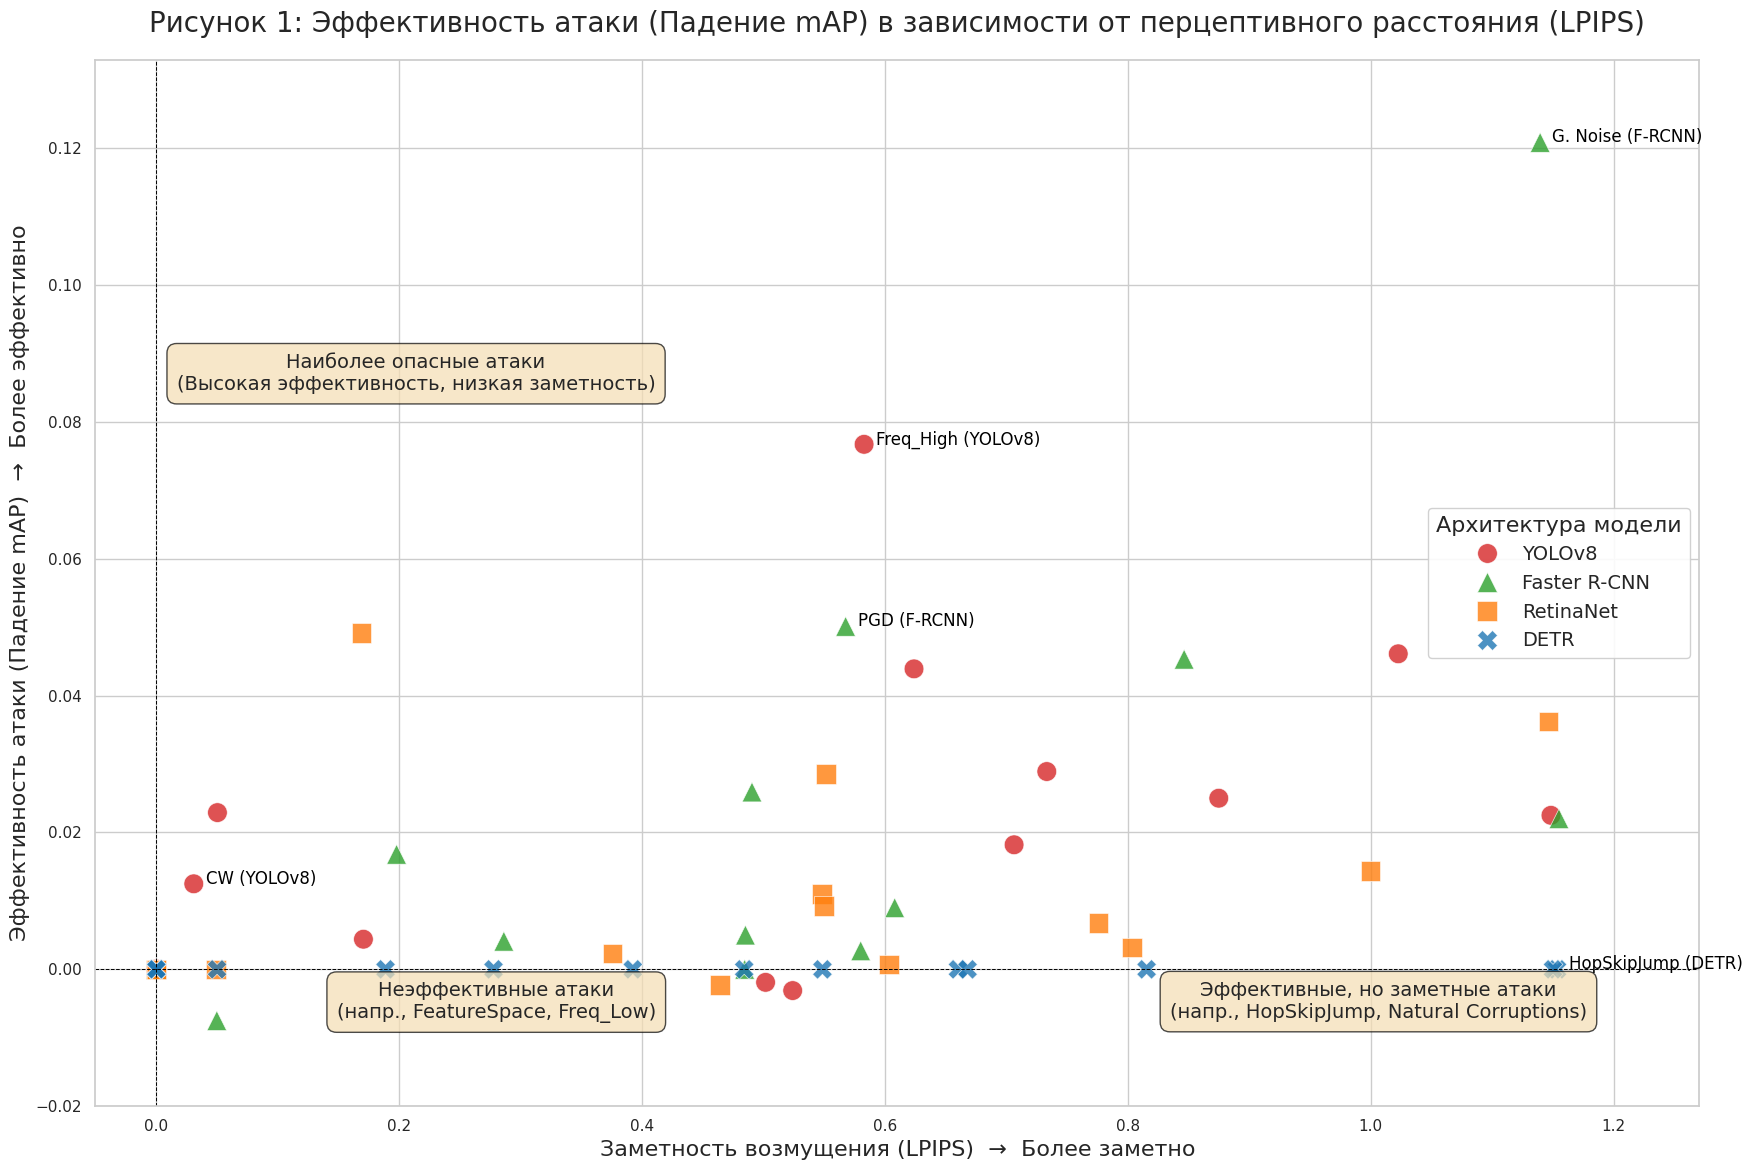

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Шаг 1: Подготовленные данные из ваших логов ---
# Я вручную собрал эти данные из предоставленных вами результатов.
data = [
    # YOLOv8 Data
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'lpips': 0.5019},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'lpips': 0.0311},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'lpips': 0.0506},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'lpips': 0.5242},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'lpips': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'lpips': 0.5830},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'lpips': 1.0228},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'lpips': 0.1708},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'lpips': 0.6241},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'lpips': 0.7065},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'lpips': 0.7334},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'lpips': 1.1485},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'lpips': 0.8750},

    # Faster R-CNN Data
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'lpips': 0.2864},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0001},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'lpips': 0.0501},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'lpips': 0.4847},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'lpips': 0.4853},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'lpips': 0.4907},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0005},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'lpips': 1.1551},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'lpips': 0.1981},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'lpips': 0.5678},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'lpips': 0.6082},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'lpips': 0.5802},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'lpips': 1.1396},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'lpips': 0.8465},

    # RetinaNet Data
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'lpips': 0.3758},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0001},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'lpips': 0.0496},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'lpips': 0.5482},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'lpips': 0.4642},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'lpips': 0.5515},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'lpips': 1.0000},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'lpips': 0.1691},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'lpips': 0.5501},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'lpips': 0.7759},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'lpips': 0.6037},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'lpips': 1.1465},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'lpips': 0.8036},

    # DETR Data
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'lpips': 0.2779},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0007},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'lpips': 0.0503},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'lpips': 0.3926},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'lpips': 0.0},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'lpips': 0.4843},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'lpips': 1.1535},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'lpips': 0.1890},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'lpips': 0.5487},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'lpips': 0.6603},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'lpips': 0.6682},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'lpips': 1.1502},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'lpips': 0.8156},
]

# Создаем DataFrame
df = pd.DataFrame(data)

# --- Шаг 2: Визуализация ---

# Настройка стиля и размера графика
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 12))

# Определяем палитру и маркеры для каждой модели
palette = {
    'YOLOv8': '#d62728',         # Красный
    'RetinaNet': '#ff7f0e',      # Оранжевый
    'Faster R-CNN': '#2ca02c',   # Зеленый
    'DETR': '#1f77b4'            # Синий
}
markers = {
    'YOLOv8': 'o',
    'RetinaNet': 's',
    'Faster R-CNN': '^',
    'DETR': 'X'
}

# Создаем диаграмму рассеяния
sns.scatterplot(
    data=df,
    x='lpips',
    y='map_drop',
    hue='model',
    style='model',
    palette=palette,
    markers=markers,
    s=200,  # Размер маркеров
    alpha=0.8,
    edgecolor="w",
    linewidth=0.5,
    ax=ax
)

# --- Шаг 3: Добавление аннотаций и меток для научной подачи ---

# Добавление разделительных линий
ax.axhline(0, color='black', linestyle='--', linewidth=0.7)
ax.axvline(0, color='black', linestyle='--', linewidth=0.7)

# Заголовки и подписи осей
ax.set_title(
    'Рисунок 1: Эффективность атаки (Падение mAP) в зависимости от перцептивного расстояния (LPIPS)',
    fontsize=20, pad=20
)
ax.set_xlabel('Заметность возмущения (LPIPS)  →  Более заметно', fontsize=16)
ax.set_ylabel('Эффективность атаки (Падение mAP)  →  Более эффективно', fontsize=16)

# Аннотации для ключевых атак
# Выберем несколько показательных точек для подписи, чтобы не перегружать график
points_to_annotate = {
    ('YOLOv8', 'Freq_High'): 'Freq_High (YOLOv8)',
    ('YOLOv8', 'CW'): 'CW (YOLOv8)',
    ('Faster R-CNN', 'gaussian_noise'): 'G. Noise (F-RCNN)',
    ('Faster R-CNN', 'PGD'): 'PGD (F-RCNN)',
    ('DETR', 'HopSkipJump'): 'HopSkipJump (DETR)',
}

for i, row in df.iterrows():
    key = (row['model'], row['attack'])
    if key in points_to_annotate:
        ax.text(
            row['lpips'] + 0.01, row['map_drop'],
            points_to_annotate[key],
            fontsize=12,
            color='black'
        )

# Добавление текстовых блоков для описания квадрантов
bbox_style = dict(boxstyle="round,pad=0.5", fc="wheat", ec="black", lw=1, alpha=0.7)

ax.text(0.8, 0.10, "Эффективные, но заметные атаки\n(напр., HopSkipJump, Natural Corruptions)",
        fontsize=14, bbox=bbox_style, ha='center', va='center', transform=ax.transAxes)

ax.text(0.2, 0.7, "Наиболее опасные атаки\n(Высокая эффективность, низкая заметность)",
        fontsize=14, bbox=bbox_style, ha='center', va='center', transform=ax.transAxes)

ax.text(0.25, 0.1, "Неэффективные атаки\n(напр., FeatureSpace, Freq_Low)",
        fontsize=14, bbox=bbox_style, ha='center', va='center', transform=ax.transAxes)


# Настройка легенды
legend = ax.legend(title='Архитектура модели', fontsize=14, title_fontsize=16)
legend.get_frame().set_alpha(0.9)

# Установка пределов осей для лучшей читаемости
ax.set_ylim(-0.02, df['map_drop'].max() * 1.1)
ax.set_xlim(-0.05, df['lpips'].max() * 1.1)

plt.tight_layout(pad=1.5)
plt.show()

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Данные для ключевых атак (собраны из логов)
data = {
    'Model': ['YOLOv8', 'RetinaNet', 'Faster R-CNN', 'DETR'],
    'PGD (mAP Drop)': [0.044, 0.009, 0.050, 0.000],
    'Freq_High (FP/Img)': [85.9, 0.0, 0.4, 0.2], # Нормализуем для графика
    'HopSkipJump (ASR-Hide %)': [100, 100, 100, 100],
    'CW (mAP Drop)': [0.013, 0.0, 0.0, 0.0],
    'Gaussian Noise (mAP Drop)': [0.023, 0.036, 0.121, 0.0],
    'DPatch (mAP Drop)': [0.023, 0.0, -0.007, 0.0],
}
df = pd.DataFrame(data)

# Нормализуем FP/Img, чтобы он был сопоставим с другими метриками
# Делим на максимальное значение, чтобы получить шкалу от 0 до 100
max_fp = df['Freq_High (FP/Img)'].max()
df['Freq_High (FP/Img)'] = (df['Freq_High (FP/Img)'] / max_fp) * 100

# Переводим mAP Drop в "шкалу урона" от 0 до 100 (для наглядности)
# Возьмем максимальное падение mAP за 100%
max_map_drop = df[['PGD (mAP Drop)', 'CW (mAP Drop)', 'Gaussian Noise (mAP Drop)', 'DPatch (mAP Drop)']].max().max()
for col in ['PGD (mAP Drop)', 'CW (mAP Drop)', 'Gaussian Noise (mAP Drop)', 'DPatch (mAP Drop)']:
    df[col] = (df[col] / max_map_drop) * 100


# Создаем радиальную диаграмму
fig = go.Figure()

categories = list(df.columns[1:])
colors = {'YOLOv8': '#d62728', 'RetinaNet': '#ff7f0e', 'Faster R-CNN': '#2ca02c', 'DETR': '#1f77b4'}

for i, row in df.iterrows():
    model_name = row['Model']
    fig.add_trace(go.Scatterpolar(
        r=row.values[1:].tolist() + [row.values[1]], # Замыкаем контур
        theta=categories + [categories[0]],
        fill='toself',
        name=model_name,
        line_color=colors[model_name],
        opacity=0.7
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100],
      tickvals=[0, 25, 50, 75, 100],
      ticktext=['0%', '25%', '50%', '75%', '100% Урона']
    )),
  showlegend=True,
  title='Рисунок 2: Профиль уязвимости архитектур (чем больше площадь, тем хуже)',
  font_size=14
)

fig.show()

In [3]:
import pandas as pd
import plotly.express as px

# Используем те же подготовленные данные, что и для радиальной диаграммы
# Только теперь не будем нормализовывать, оставим оригинальные значения mAP Drop
data_bar = {
    'Model': ['YOLOv8', 'RetinaNet', 'Faster R-CNN', 'DETR'] * 4,
    'Attack': ['PGD']*4 + ['Freq_High']*4 + ['Gaussian Noise']*4 + ['HopSkipJump']*4,
    'mAP Drop': [0.044, 0.009, 0.050, 0.0] + \
                [0.077, 0.029, 0.026, 0.0] + \
                [0.023, 0.036, 0.121, 0.0] + \
                [0.046, 0.014, 0.022, 0.0]
}
df_bar = pd.DataFrame(data_bar)

# Создаем сгруппированную гистограмму
fig = px.bar(
    df_bar,
    x="Attack",
    y="mAP Drop",
    color="Model",
    barmode="group",
    color_discrete_map=colors,
    title="Рисунок 3: Сравнение падения mAP по ключевым атакам",
    labels={"mAP Drop": "Падение mAP (чем выше, тем хуже)", "Attack": "Тип атаки"}
)

fig.update_layout(
    font_size=14,
    yaxis_title_font_size=16,
    xaxis_title_font_size=16,
    legend_title_font_size=16
)

fig.show()

In [5]:
import pandas as pd
import plotly.express as px

# --- Шаг 1: Полные данные, которые уже содержат столбец 'attack' ---
# Этот блок кода остается таким же, как в самом первом примере (для диаграммы рассеяния)
data = [
    # YOLOv8 Data
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'lpips': 0.5019},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'lpips': 0.0311},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'lpips': 0.0506},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'lpips': 0.5242},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'lpips': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'lpips': 0.5830},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'lpips': 1.0228},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'lpips': 0.1708},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'lpips': 0.6241},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'lpips': 0.7065},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'lpips': 0.7334},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'lpips': 1.1485},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'lpips': 0.8750},

    # Faster R-CNN Data
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'lpips': 0.2864},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0001},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'lpips': 0.0501},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'lpips': 0.4847},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'lpips': 0.4853},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'lpips': 0.4907},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0005},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'lpips': 1.1551},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'lpips': 0.1981},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'lpips': 0.5678},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'lpips': 0.6082},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'lpips': 0.5802},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'lpips': 1.1396},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'lpips': 0.8465},

    # RetinaNet Data
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'lpips': 0.3758},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0001},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'lpips': 0.0496},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'lpips': 0.5482},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'lpips': 0.4642},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'lpips': 0.5515},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'lpips': 1.0000},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'lpips': 0.1691},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'lpips': 0.5501},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'lpips': 0.7759},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'lpips': 0.6037},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'lpips': 1.1465},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'lpips': 0.8036},

    # DETR Data
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'lpips': 0.2779},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0007},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'lpips': 0.0503},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'lpips': 0.3926},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'lpips': 0.0},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'lpips': 0.4843},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'lpips': 1.1535},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'lpips': 0.1890},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'lpips': 0.5487},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'lpips': 0.6603},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'lpips': 0.6682},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'lpips': 1.1502},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'lpips': 0.8156},
]
df = pd.DataFrame(data)

# --- ИСПРАВЛЕННЫЙ КОД ДЛЯ ТЕПЛОВОЙ КАРТЫ ---

# Создаем сводную таблицу (pivot table) из всех данных
# ВАЖНО: Убеждаемся, что df содержит столбец 'attack', по которому можно фильтровать
attacks_for_heatmap = ['PGD', 'Freq_High', 'HopSkipJump', 'CW', 'SquareAttack', 'gaussian_noise', 'contrast']

# Фильтруем DataFrame по списку атак
df_heatmap_data = df[df['attack'].isin(attacks_for_heatmap)]

# Создаем сводную таблицу. Теперь это сработает.
pivot_table = df_heatmap_data.pivot(index='model', columns='attack', values='map_drop')

# Сортируем столбцы в том же порядке, что и в списке
pivot_table = pivot_table[attacks_for_heatmap]

# Создаем тепловую карту
fig = px.imshow(
    pivot_table,
    text_auto=".3f", # Отображать значения в ячейках с 3 знаками после запятой
    aspect="auto",
    color_continuous_scale='Reds', # Используем шкалу красного цвета
    title="Рисунок 4: Тепловая карта падения mAP для разных моделей и атак",
    labels=dict(x="Тип атаки", y="Архитектура модели", color="Падение mAP")
)

fig.update_xaxes(side="top")
fig.update_layout(
    font_size=12,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

fig.show()

In [6]:
!pip install pandas plotly kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00


In [1]:
!pip install -U pandas plotly kaleido

In [2]:
import pandas as pd
import plotly.express as px

# === ШАГ 1: ПОЛНЫЙ СБОР ДАННЫХ ИЗ ВАШИХ ЛОГОВ ===
# Я структурировал все предоставленные вами данные в один DataFrame.
data = [
    # Model, Attack, mAP Drop, ASR-Hide, FP/Img
    # --- YOLOv8 ---
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'asr_hide': 20.0, 'fp_per_image_adv': 13.7},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'asr_hide': 10.0, 'fp_per_image_adv': 15.5},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'asr_hide': 10.0, 'fp_per_image_adv': 0.4},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'asr_hide': 30.0, 'fp_per_image_adv': 0.7},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'asr_hide': 0.0, 'fp_per_image_adv': 85.9},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.1},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'asr_hide': 0.0, 'fp_per_image_adv': 12.0},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'asr_hide': 10.0, 'fp_per_image_adv': 18.1},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'asr_hide': 0.0, 'fp_per_image_adv': 22.5},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'defocus_blur', 'map_drop': 0.0048, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0},

    # --- Faster R-CNN ---
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'asr_hide': 30.0, 'fp_per_image_adv': 2.3},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 30.0, 'fp_per_image_adv': 0.6},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'asr_hide': 10.0, 'fp_per_image_adv': 0.3},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.9},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'asr_hide': 20.0, 'fp_per_image_adv': 0.3},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.9},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'asr_hide': 20.0, 'fp_per_image_adv': 0.5},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'asr_hide': 20.0, 'fp_per_image_adv': 1.7},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'asr_hide': 50.0, 'fp_per_image_adv': 0.9},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'asr_hide': 0.0, 'fp_per_image_adv': 1.2},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'asr_hide': 50.0, 'fp_per_image_adv': 0.1},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'Faster R-CNN', 'attack': 'defocus_blur', 'map_drop': 0.0151, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0},

    # --- RetinaNet ---
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.2},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'defocus_blur', 'map_drop': 0.0148, 'asr_hide': 50.0, 'fp_per_image_adv': 0.0},

    # --- DETR ---
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.1},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 3.3},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 40.0, 'fp_per_image_adv': 4.7},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 1.2},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 4.7},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.2},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 0.7},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.2},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.4},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.6},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.1},
    {'model': 'DETR', 'attack': 'defocus_blur', 'map_drop': 0.0, 'asr_hide': 60.0, 'fp_per_image_adv': 0.5},
]

df = pd.DataFrame(data)

# Упорядочиваем для лучшей визуализации
model_order = ['YOLOv8', 'RetinaNet', 'Faster R-CNN', 'DETR']
attack_order = [
    'PGD', 'CW', 'Freq_High', 'HopSkipJump', 'SquareAttack',
    'AttentionGuided', 'ObjectHider', 'StAdv', 'DPatch', 'Daedalus_Lite', 'FeatureSpace',
    'gaussian_noise', 'contrast', 'defocus_blur'
]
df['model'] = pd.Categorical(df['model'], categories=model_order, ordered=True)
df['attack'] = pd.Categorical(df['attack'], categories=attack_order, ordered=True)
df = df.sort_values(['model', 'attack'])


# === ШАГ 2: ФУНКЦИЯ ДЛЯ СОЗДАНИЯ И СОХРАНЕНИЯ ТЕПЛОВЫХ КАРТ ===

def create_heatmap(data_frame, value_col, title, color_scale, file_name):
    """
    Создает, настраивает и сохраняет тепловую карту.

    :param data_frame: pandas DataFrame с данными.
    :param value_col: Название столбца для значений в ячейках.
    :param title: Заголовок графика.
    :param color_scale: Цветовая шкала (напр., 'Reds', 'Blues').
    :param file_name: Имя файла для сохранения (включая .png).
    """
    print(f"Generating heatmap for '{value_col}'...")

    # Создаем сводную таблицу
    pivot_table = data_frame.pivot(index='model', columns='attack', values=value_col)
    pivot_table = pivot_table.reindex(columns=attack_order) # Сохраняем порядок атак

    # Создаем график
    fig = px.imshow(
        pivot_table,
        text_auto=".2f",  # Формат чисел в ячейках
        aspect="auto",
        color_continuous_scale=color_scale,
        title=title,
        labels=dict(x="Тип атаки", y="Архитектура модели", color=value_col)
    )

    # Настройка внешнего вида
    fig.update_xaxes(side="top", tickangle=-45)
    fig.update_layout(
        font_size=12,
        xaxis_title="",
        yaxis_title="",
        title_font_size=20,
        title_x=0.5,
        width=1600,
        height=600,
        margin=dict(l=50, r=50, t=100, b=50)
    )

    # Сохраняем в файл
    fig.write_image(file_name, scale=2) # scale=2 для лучшего качества
    print(f"Saved to {file_name}")
    # fig.show() # Раскомментируйте, если хотите увидеть график в интерактивном режиме


# === ШАГ 3: ГЕНЕРАЦИЯ ТРЕХ КЛЮЧЕВЫХ ГРАФИКОВ ===

# 1. Тепловая карта по "Деградации качества"
create_heatmap(
    data_frame=df,
    value_col='map_drop',
    title='<b>Тепловая карта 1: Деградация качества (Падение mAP)</b><br><sup>Чем краснее, тем сильнее падает точность</sup>',
    color_scale='Reds',
    file_name='heatmap_map_drop.png'
)

# 2. Тепловая карта по "Сокрытию объектов"
create_heatmap(
    data_frame=df,
    value_col='asr_hide',
    title='<b>Тепловая карта 2: Эффект ослепления (ASR-Hide, %)</b><br><sup>Чем краснее, тем успешнее атака скрывает объекты</sup>',
    color_scale='Reds',
    file_name='heatmap_asr_hide.png'
)

# 3. Тепловая карта по "Генерации фантомов"
create_heatmap(
    data_frame=df,
    value_col='fp_per_image_adv',
    title='<b>Тепловая карта 3: Генерация фантомов (FP/Img)</b><br><sup>Чем краснее, тем больше ложных срабатываний</sup>',
    color_scale='Reds',
    file_name='heatmap_fp_img.png'
)

Generating heatmap for 'map_drop'...
Saved to heatmap_map_drop.png
Generating heatmap for 'asr_hide'...
Saved to heatmap_asr_hide.png
Generating heatmap for 'fp_per_image_adv'...
Saved to heatmap_fp_img.png


In [4]:
! pip install adjustText

Generating interactive plot...



Generating static plot with adjusted text...
8 [-0.78525054  0.1589996 ]
17 [-0.8899628  -0.98795053]
4 [0.27332493 0.38518779]
19 [-0.74929727 -0.90048815]
28 [-0.40475834  0.26278952]
2 [-0.57797835 -0.93724466]
27 [-0.18649941  0.89137558]
Saved static plot to scatterplot_full_annotated.png


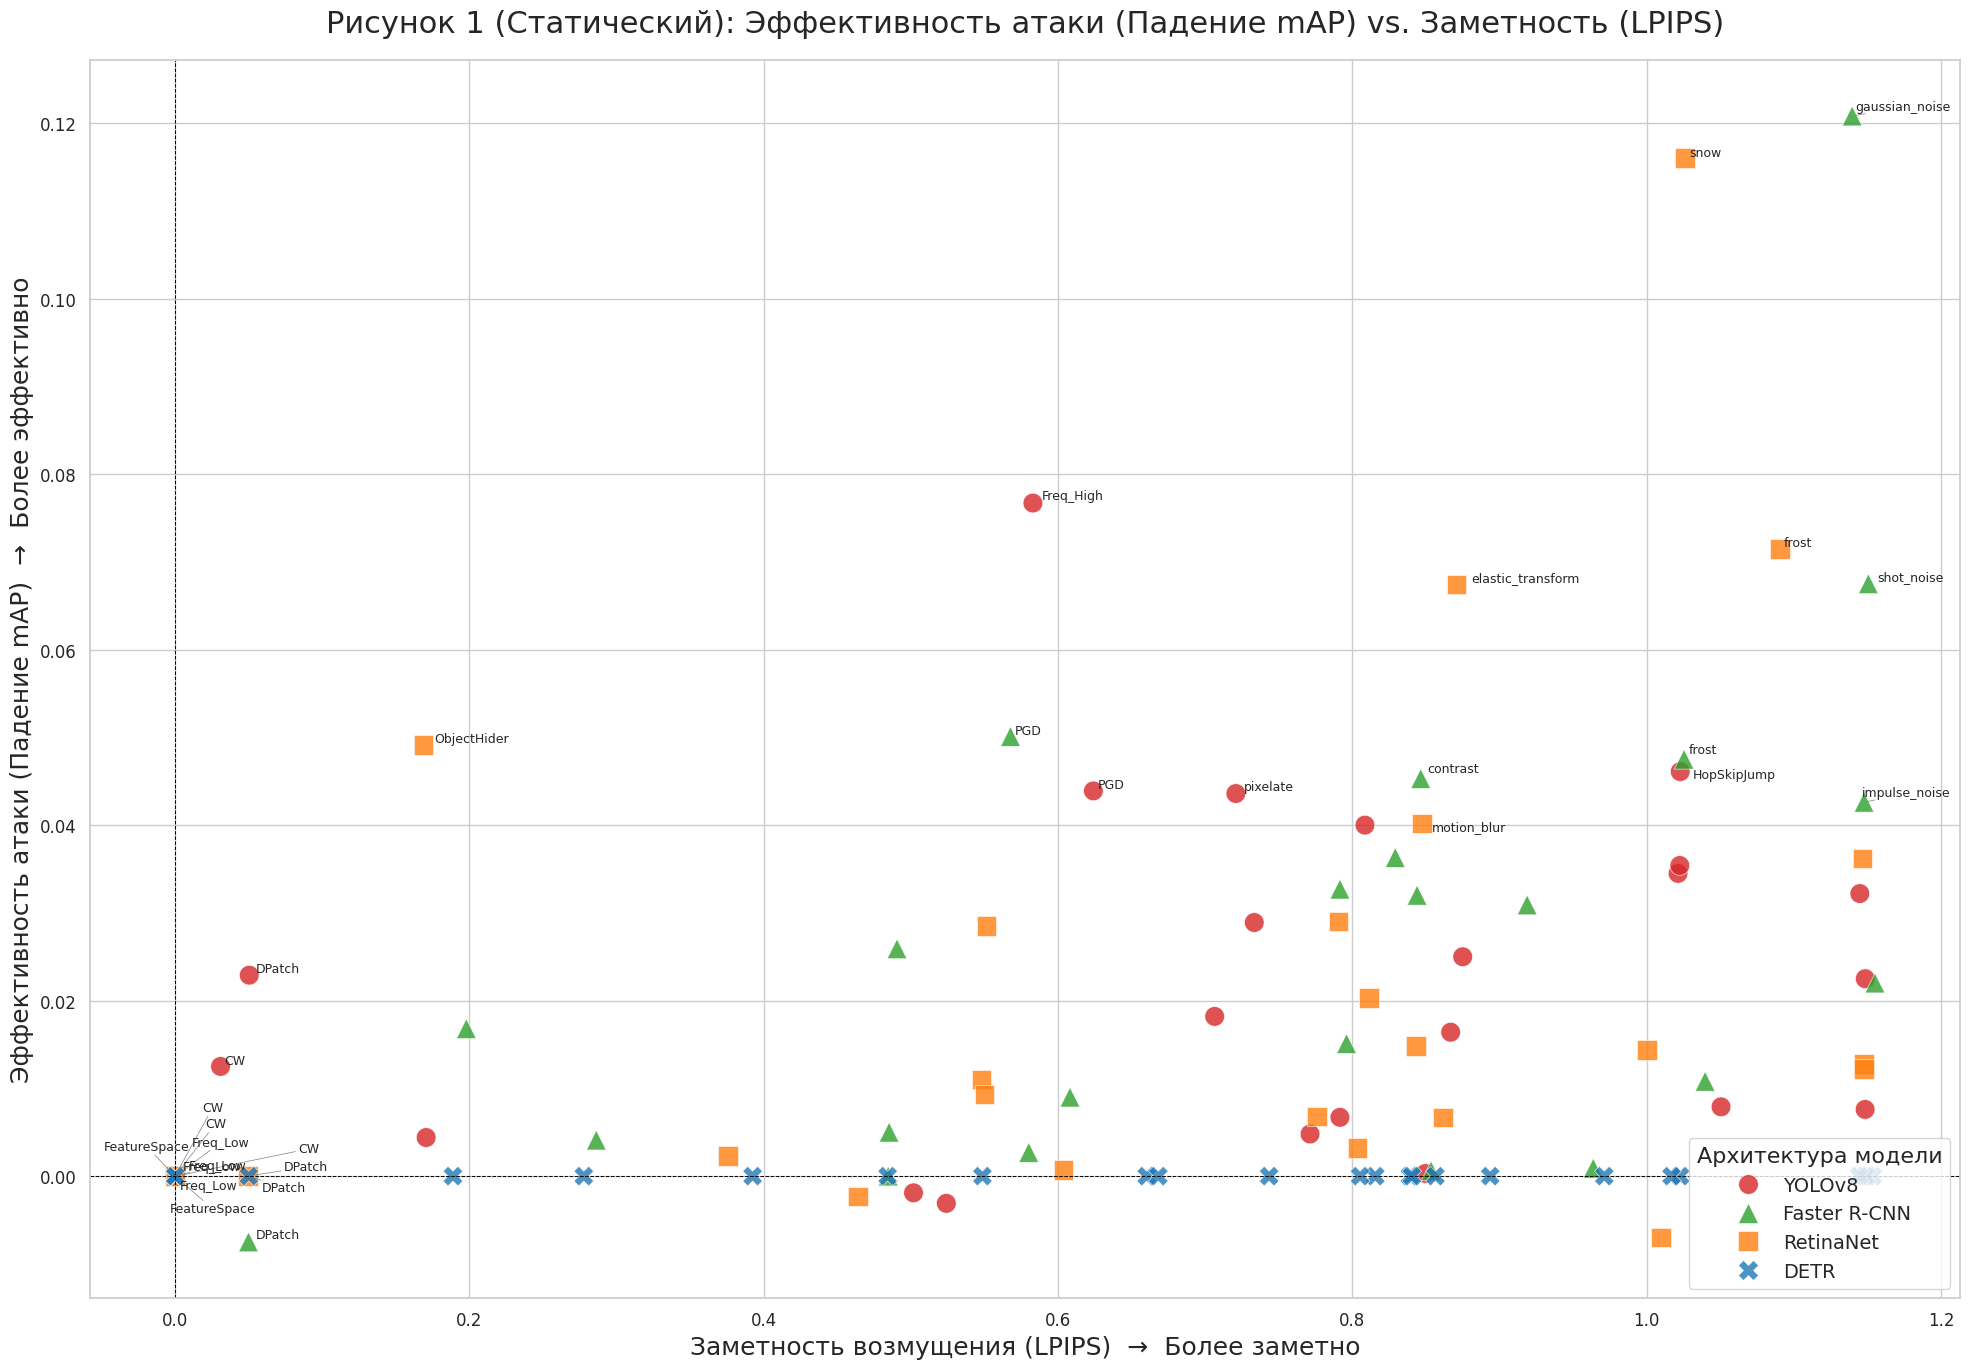

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns

# === ШАГ 1: ПОЛНЫЙ СБОР ДАННЫХ ИЗ ВАШИХ ЛОГОВ ===
# Включаем ВСЕ атаки и метрики для полноты
data = [
    # Model, Attack, mAP Drop, LPIPS
    # --- YOLOv8 ---
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'lpips': 0.5019},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'lpips': 0.0311},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'lpips': 0.0506},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'lpips': 0.5242},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'lpips': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'lpips': 0.5830},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'lpips': 1.0228},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'lpips': 0.1708},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'lpips': 0.6241},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'lpips': 0.7065},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'lpips': 0.7334},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'lpips': 1.1485},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'lpips': 0.8750},
    {'model': 'YOLOv8', 'attack': 'defocus_blur', 'map_drop': 0.0048, 'lpips': 0.7713},
    {'model': 'YOLOv8', 'attack': 'elastic_transform', 'map_drop': 0.0003, 'lpips': 0.8497},
    {'model': 'YOLOv8', 'attack': 'frost', 'map_drop': 0.0079, 'lpips': 1.0505},
    {'model': 'YOLOv8', 'attack': 'impulse_noise', 'map_drop': 0.0076, 'lpips': 1.1484},
    {'model': 'YOLOv8', 'attack': 'jpeg_compression', 'map_drop': 0.0164, 'lpips': 0.8668},
    {'model': 'YOLOv8', 'attack': 'motion_blur', 'map_drop': 0.0067, 'lpips': 0.7916},
    {'model': 'YOLOv8', 'attack': 'pixelate', 'map_drop': 0.0436, 'lpips': 0.7209},
    {'model': 'YOLOv8', 'attack': 'shot_noise', 'map_drop': 0.0322, 'lpips': 1.1448},
    {'model': 'YOLOv8', 'attack': 'snow', 'map_drop': 0.0345, 'lpips': 1.0213},
    {'model': 'YOLOv8', 'attack': 'zoom_blur', 'map_drop': 0.0400, 'lpips': 0.8086},
    {'model': 'YOLOv8', 'attack': 'brightness', 'map_drop': 0.0354, 'lpips': 1.0225},

    # --- Faster R-CNN ---
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'lpips': 0.2864},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0001},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'lpips': 0.0501},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'lpips': 0.4847},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'lpips': 0.4853},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'lpips': 0.4907},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0005},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'lpips': 1.1551},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'lpips': 0.1981},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'lpips': 0.5678},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'lpips': 0.6082},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'lpips': 0.5802},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'lpips': 1.1396},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'lpips': 0.8465},
    {'model': 'Faster R-CNN', 'attack': 'defocus_blur', 'map_drop': 0.0151, 'lpips': 0.7961},
    {'model': 'Faster R-CNN', 'attack': 'elastic_transform', 'map_drop': 0.0363, 'lpips': 0.8292},
    {'model': 'Faster R-CNN', 'attack': 'frost', 'map_drop': 0.0475, 'lpips': 1.0254},
    {'model': 'Faster R-CNN', 'attack': 'impulse_noise', 'map_drop': 0.0426, 'lpips': 1.1477},
    {'model': 'Faster R-CNN', 'attack': 'jpeg_compression', 'map_drop': 0.0309, 'lpips': 0.9188},
    {'model': 'Faster R-CNN', 'attack': 'motion_blur', 'map_drop': 0.0006, 'lpips': 0.8535},
    {'model': 'Faster R-CNN', 'attack': 'pixelate', 'map_drop': 0.0320, 'lpips': 0.8440},
    {'model': 'Faster R-CNN', 'attack': 'shot_noise', 'map_drop': 0.0675, 'lpips': 1.1506},
    {'model': 'Faster R-CNN', 'attack': 'snow', 'map_drop': 0.0108, 'lpips': 1.0397},
    {'model': 'Faster R-CNN', 'attack': 'zoom_blur', 'map_drop': 0.0327, 'lpips': 0.7916},
    {'model': 'Faster R-CNN', 'attack': 'brightness', 'map_drop': 0.0009, 'lpips': 0.9637},

    # --- RetinaNet ---
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'lpips': 0.3758},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0001},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'lpips': 0.0496},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'lpips': 0.5482},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'lpips': 0.4642},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'lpips': 0.5515},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'lpips': 1.0000},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'lpips': 0.1691},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'lpips': 0.5501},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'lpips': 0.7759},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'lpips': 0.6037},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'lpips': 1.1465},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'lpips': 0.8036},
    {'model': 'RetinaNet', 'attack': 'defocus_blur', 'map_drop': 0.0148, 'lpips': 0.8432},
    {'model': 'RetinaNet', 'attack': 'elastic_transform', 'map_drop': 0.0674, 'lpips': 0.8709},
    {'model': 'RetinaNet', 'attack': 'frost', 'map_drop': 0.0715, 'lpips': 1.0904},
    {'model': 'RetinaNet', 'attack': 'impulse_noise', 'map_drop': 0.0128, 'lpips': 1.1475},
    {'model': 'RetinaNet', 'attack': 'jpeg_compression', 'map_drop': 0.0067, 'lpips': 0.8618},
    {'model': 'RetinaNet', 'attack': 'motion_blur', 'map_drop': 0.0402, 'lpips': 0.8475},
    {'model': 'RetinaNet', 'attack': 'pixelate', 'map_drop': 0.0203, 'lpips': 0.8115},
    {'model': 'RetinaNet', 'attack': 'shot_noise', 'map_drop': 0.0122, 'lpips': 1.1476},
    {'model': 'RetinaNet', 'attack': 'snow', 'map_drop': 0.1160, 'lpips': 1.0262},
    {'model': 'RetinaNet', 'attack': 'zoom_blur', 'map_drop': 0.0290, 'lpips': 0.7906},
    {'model': 'RetinaNet', 'attack': 'brightness', 'map_drop': -0.0070, 'lpips': 1.0098},

    # --- DETR ---
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'lpips': 0.2779},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'lpips': 0.0007},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'lpips': 0.0503},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'lpips': 0.3926},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'lpips': 0.0},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'lpips': 0.4843},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'lpips': 0.0004},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'lpips': 1.1535},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'lpips': 0.1890},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'lpips': 0.5487},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'lpips': 0.6603},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'lpips': 0.6682},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'lpips': 1.1502},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'lpips': 0.8156},
    {'model': 'DETR', 'attack': 'defocus_blur', 'map_drop': 0.0, 'lpips': 0.8053},
    {'model': 'DETR', 'attack': 'elastic_transform', 'map_drop': 0.0, 'lpips': 0.8565},
    {'model': 'DETR', 'attack': 'frost', 'map_drop': 0.0, 'lpips': 1.0227},
    {'model': 'DETR', 'attack': 'impulse_noise', 'map_drop': 0.0, 'lpips': 1.1486},
    {'model': 'DETR', 'attack': 'jpeg_compression', 'map_drop': 0.0, 'lpips': 0.8937},
    {'model': 'DETR', 'attack': 'motion_blur', 'map_drop': 0.0, 'lpips': 0.8391},
    {'model': 'DETR', 'attack': 'pixelate', 'map_drop': 0.0, 'lpips': 0.7435},
    {'model': 'DETR', 'attack': 'shot_noise', 'map_drop': 0.0, 'lpips': 1.1445},
    {'model': 'DETR', 'attack': 'snow', 'map_drop': 0.0, 'lpips': 1.0169},
    {'model': 'DETR', 'attack': 'zoom_blur', 'map_drop': 0.0, 'lpips': 0.8405},
    {'model': 'DETR', 'attack': 'brightness', 'map_drop': 0.0, 'lpips': 0.9712},
]

df = pd.DataFrame(data)

# --- ШАГ 2: ИНТЕРАКТИВНАЯ ВЕРСИЯ (для анализа) ---
print("Generating interactive plot...")
fig_interactive = px.scatter(
    df,
    x='lpips',
    y='map_drop',
    color='model',
    symbol='model',
    hover_name='attack',
    hover_data={'lpips': ':.3f', 'map_drop': ':.3f'},
    title='<b>Рисунок 1 (Интерактивный): Эффективность атаки (Падение mAP) vs. Заметность (LPIPS)</b>',
    labels={
        "lpips": "Заметность возмущения (LPIPS)  →  Более заметно",
        "map_drop": "Эффективность атаки (Падение mAP)  →  Более эффективно"
    }
)

fig_interactive.update_traces(marker_size=10, marker_line_width=1, marker_line_color='DarkSlateGrey')
fig_interactive.update_layout(
    legend_title_text='Архитектура модели',
    title_x=0.5,
    font_size=14
)
fig_interactive.show()


# --- ШАГ 3: СТАТИЧЕСКАЯ ВЕРСИЯ (для вставки в презентацию) ---
# Для этого нам понадобится matplotlib и adjustText
# Установите, если отсутствует: !pip install adjustText

print("\nGenerating static plot with adjusted text...")

# Настройка стиля
sns.set_theme(style="whitegrid")
fig_static, ax = plt.subplots(figsize=(20, 14))

palette = {
    'YOLOv8': '#d62728', 'RetinaNet': '#ff7f0e',
    'Faster R-CNN': '#2ca02c', 'DETR': '#1f77b4'
}
markers = {
    'YOLOv8': 'o', 'RetinaNet': 's',
    'Faster R-CNN': '^', 'DETR': 'X'
}

# Рисуем диаграмму
sns.scatterplot(
    data=df, x='lpips', y='map_drop', hue='model', style='model',
    palette=palette, markers=markers, s=200, alpha=0.8,
    edgecolor="w", linewidth=0.5, ax=ax
)

# Добавляем подписи к точкам с помощью adjustText
texts = []
for i, row in df.iterrows():
    # Подписываем только "интересные" точки, чтобы не перегружать график
    if row['map_drop'] > 0.04 or row['lpips'] < 0.06:
        texts.append(
            ax.text(row['lpips'], row['map_drop'], row['attack'], fontsize=9)
        )

# Алгоритм расстановки подписей
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Форматирование
ax.set_title(
    'Рисунок 1 (Статический): Эффективность атаки (Падение mAP) vs. Заметность (LPIPS)',
    fontsize=22, pad=20
)
ax.set_xlabel('Заметность возмущения (LPIPS)  →  Более заметно', fontsize=18)
ax.set_ylabel('Эффективность атаки (Падение mAP)  →  Более эффективно', fontsize=18)
ax.legend(title='Архитектура модели', fontsize=14, title_fontsize=16, loc='lower right')
ax.axhline(0, color='black', linestyle='--', linewidth=0.7)
ax.axvline(0, color='black', linestyle='--', linewidth=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(pad=1.5)
plt.savefig("scatterplot_full_annotated.png", dpi=300)
print("Saved static plot to scatterplot_full_annotated.png")
plt.show()

In [6]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# === ШАГ 1: ПОЛНЫЙ СБОР ДАННЫХ (используем тот же, что и раньше) ===
data = [
    # Model, Attack, mAP Drop, ASR-Hide, FP/Img, LPIPS
    # ... (вставьте сюда полный список словарей из предыдущего ответа) ...
    # --- YOLOv8 ---
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'asr_hide': 20.0, 'fp_per_image_adv': 13.7, 'lpips': 0.5019},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'asr_hide': 10.0, 'fp_per_image_adv': 15.5, 'lpips': 0.0311},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'asr_hide': 10.0, 'fp_per_image_adv': 0.4, 'lpips': 0.0506},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'asr_hide': 30.0, 'fp_per_image_adv': 0.7, 'lpips': 0.5242},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'asr_hide': 0.0, 'fp_per_image_adv': 85.9, 'lpips': 0.5830},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.1, 'lpips': 0.0004},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0228},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'asr_hide': 0.0, 'fp_per_image_adv': 12.0, 'lpips': 0.1708},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'asr_hide': 10.0, 'fp_per_image_adv': 18.1, 'lpips': 0.6241},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7065},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'asr_hide': 0.0, 'fp_per_image_adv': 22.5, 'lpips': 0.7334},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1485},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8750},

    # --- Faster R-CNN ---
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'asr_hide': 30.0, 'fp_per_image_adv': 2.3, 'lpips': 0.2864},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 30.0, 'fp_per_image_adv': 0.6, 'lpips': 0.0001},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'asr_hide': 10.0, 'fp_per_image_adv': 0.3, 'lpips': 0.0501},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.9, 'lpips': 0.4847},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'asr_hide': 20.0, 'fp_per_image_adv': 0.3, 'lpips': 0.4853},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4, 'lpips': 0.4907},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.9, 'lpips': 0.0005},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1551},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'asr_hide': 20.0, 'fp_per_image_adv': 0.5, 'lpips': 0.1981},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'asr_hide': 20.0, 'fp_per_image_adv': 1.7, 'lpips': 0.5678},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'asr_hide': 50.0, 'fp_per_image_adv': 0.9, 'lpips': 0.6082},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'asr_hide': 0.0, 'fp_per_image_adv': 1.2, 'lpips': 0.5802},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'asr_hide': 50.0, 'fp_per_image_adv': 0.1, 'lpips': 1.1396},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8465},

    # --- RetinaNet ---
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.3758},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0001},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0496},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1, 'lpips': 0.5482},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0, 'lpips': 0.4642},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5515},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.2, 'lpips': 0.0004},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1, 'lpips': 0.1691},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5501},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7759},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4, 'lpips': 0.6037},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1465},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8036},

    # --- DETR ---
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.1, 'lpips': 0.2779},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 3.3, 'lpips': 0.0007},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 40.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0503},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 1.2, 'lpips': 0.3926},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.2, 'lpips': 0.4843},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 0.7, 'lpips': 0.0004},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1535},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.2, 'lpips': 0.1890},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5487},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.4, 'lpips': 0.6603},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 0.6682},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.6, 'lpips': 1.1502},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.1, 'lpips': 0.8156},

]
df = pd.DataFrame(data)

# === ШАГ 2: ПОДГОТОВКА И НОРМАЛИЗАЦИЯ ДАННЫХ ===
# Выбираем ключевые атаки и метрики для "отпечатков"
attacks_to_fingerprint = ['PGD', 'Freq_High', 'HopSkipJump', 'CW']
metrics_to_normalize = {
    'map_drop': 'Падение mAP',
    'asr_hide': 'Сокрытие (%)',
    'fp_per_image_adv': 'Фантомы (FP/Img)',
    'lpips': 'Заметность (LPIPS)'
}

# Нормализуем каждую метрику в шкалу [0, 100] для сопоставимости на радаре
df_norm = df.copy()
for metric in metrics_to_normalize:
    max_val = df_norm[metric].max()
    if max_val > 0:
        df_norm[metric] = (df_norm[metric] / max_val) * 100
    # Обработаем отрицательные значения, если есть
    df_norm[metric] = df_norm[metric].clip(lower=0)

# === ШАГ 3: СОЗДАНИЕ ГРАФИКА ===
# Создаем сетку 2x2 для 4 атак
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'polar'}]*2]*2,
    subplot_titles=attacks_to_fingerprint,
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

colors = {'YOLOv8': '#d62728', 'RetinaNet': '#ff7f0e', 'Faster R-CNN': '#2ca02c', 'DETR': '#1f77b4'}
models = ['YOLOv8', 'RetinaNet', 'Faster R-CNN', 'DETR']

# Заполняем каждый subplot
for i, attack_name in enumerate(attacks_to_fingerprint):
    row = i // 2 + 1
    col = i % 2 + 1

    # Фильтруем данные для текущей атаки
    attack_df = df_norm[df_norm['attack'] == attack_name]

    for model_name in models:
        model_data = attack_df[attack_df['model'] == model_name]

        if not model_data.empty:
            values = model_data[metrics_to_normalize.keys()].values.flatten().tolist()

            fig.add_trace(go.Scatterpolar(
                r=values + [values[0]], # Замыкаем контур
                theta=list(metrics_to_normalize.values()) + [list(metrics_to_normalize.values())[0]],
                fill='toself',
                name=model_name,
                line_color=colors[model_name],
                legendgroup=model_name,
                showlegend=(i == 0) # Показываем легенду только для первого графика
            ), row=row, col=col)

# Настройка внешнего вида
fig.update_layout(
    title_text='<b>Рисунок 5: Многомерные "отпечатки" ключевых атак</b><br><sup>Сравнение реакции моделей по 4 основным метрикам</sup>',
    title_x=0.5,
    font_size=14,
    legend_title_text='Архитектура модели',
    polar=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks='')),
    polar2=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks='')),
    polar3=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks='')),
    polar4=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks='')),
    height=900,
    width=1200
)

fig.write_image("attack_fingerprints.png", scale=2)
print("Saved multi-metric plot to attack_fingerprints.png")
fig.show()

Saved multi-metric plot to attack_fingerprints.png


In [9]:
import pandas as pd
import plotly.express as px
import os

# === ШАГ 1: ПОЛНЫЙ СБОР ДАННЫХ (используем тот же, что и раньше) ===
data = [
    # Model, Attack, mAP Drop, ASR-Hide, FP/Img
    # ... (вставьте сюда полный список словарей из предыдущего ответа) ...
    # --- YOLOv8 ---
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'asr_hide': 20.0, 'fp_per_image_adv': 13.7},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'asr_hide': 10.0, 'fp_per_image_adv': 15.5},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'asr_hide': 10.0, 'fp_per_image_adv': 0.4},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'asr_hide': 30.0, 'fp_per_image_adv': 0.7},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'asr_hide': 0.0, 'fp_per_image_adv': 85.9},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.1},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'asr_hide': 0.0, 'fp_per_image_adv': 12.0},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'asr_hide': 10.0, 'fp_per_image_adv': 18.1},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'asr_hide': 0.0, 'fp_per_image_adv': 22.5},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0},

    # --- Faster R-CNN ---
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'asr_hide': 30.0, 'fp_per_image_adv': 2.3},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 30.0, 'fp_per_image_adv': 0.6},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'asr_hide': 10.0, 'fp_per_image_adv': 0.3},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.9},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'asr_hide': 20.0, 'fp_per_image_adv': 0.3},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.9},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'asr_hide': 20.0, 'fp_per_image_adv': 0.5},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'asr_hide': 20.0, 'fp_per_image_adv': 1.7},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'asr_hide': 50.0, 'fp_per_image_adv': 0.9},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'asr_hide': 0.0, 'fp_per_image_adv': 1.2},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'asr_hide': 50.0, 'fp_per_image_adv': 0.1},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},

    # --- RetinaNet ---
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.2},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0},

    # --- DETR ---
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.1},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 3.3},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 40.0, 'fp_per_image_adv': 4.7},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 1.2},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 4.7},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.2},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 0.7},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.2},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.4},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.6},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.1},
]
df = pd.DataFrame(data)

# === ШАГ 2: СОЗДАНИЕ КОМПЛЕКСНОЙ МЕТРИКИ УРОНА ===

# Нормализуем FP/Img на шкалу [0, 100]
max_fp = df['fp_per_image_adv'].max()
df['fp_norm'] = (df['fp_per_image_adv'] / max_fp) * 100 if max_fp > 0 else 0

# Веса для сокрытия и генерации фантомов. Можно менять, если один тип отказа важнее.
w_hide = 0.5
w_fp = 0.5

# Рассчитываем итоговый "Уровень деградации"
df['degradation_score'] = (w_hide * df['asr_hide']) + (w_fp * df['fp_norm'])


# === ШАГ 3: ВИЗУАЛИЗАЦИЯ НОВОЙ МЕТРИКИ ===

print("Generating heatmap for 'Degradation Score'...")

# Упорядочиваем для лучшей визуализации
model_order = ['YOLOv8', 'RetinaNet', 'Faster R-CNN', 'DETR']
attack_order = [
    # Сначала самые "ослепляющие"
    'HopSkipJump', 'contrast', 'gaussian_noise',
    # Потом самые "галлюциногенные"
    'Freq_High', 'PGD', 'StAdv', 'CW',
    # Остальные
    'SquareAttack', 'AttentionGuided', 'ObjectHider', 'DPatch', 'Daedalus_Lite', 'FeatureSpace'
]
df['model'] = pd.Categorical(df['model'], categories=model_order, ordered=True)
df['attack'] = pd.Categorical(df['attack'], categories=attack_order, ordered=True)
df = df.sort_values(['model', 'attack'])


# Создаем сводную таблицу
pivot_degradation = df.pivot(index='model', columns='attack', values='degradation_score')

# Создаем график
fig = px.imshow(
    pivot_degradation,
    text_auto=".1f",  # Формат чисел в ячейках
    aspect="auto",
    color_continuous_scale='Reds',
    title='<b>Комплексная оценка устойчивости: Уровень деградации модели</b><br><sup>Интегральная метрика, учитывающая сокрытие объектов (ASR-Hide) и генерацию фантомов (FP/Img)</sup>',
    labels=dict(x="Тип атаки", y="Архитектура модели", color="Уровень деградации")
)

# Настройка внешнего вида
fig.update_xaxes(side="bottom", tickangle=-45)
fig.update_layout(
    font_size=12,
    xaxis_title="",
    yaxis_title="",
    title_font_size=20,
    title_x=0.5,
    width=1400,
    height=600,
    margin=dict(l=50, r=50, t=120, b=50)
)

# Сохраняем в файл
if not os.path.exists("heatmaps"):
    os.makedirs("heatmaps")
fig.write_image("heatmaps/heatmap_degradation_score.png", scale=2)
print("Saved comprehensive heatmap to heatmaps/heatmap_degradation_score.png")
fig.show()

Generating heatmap for 'Degradation Score'...
Saved comprehensive heatmap to heatmaps/heatmap_degradation_score.png


Generating Scatter Plot...
6 [ 0.25577692 -0.44146254]
17 [-0.32592921 -0.71953839]
11 [-0.18939864  0.43158349]
25 [ 0.21589464 -0.4371055 ]
Saved scatterplot_degradation.png


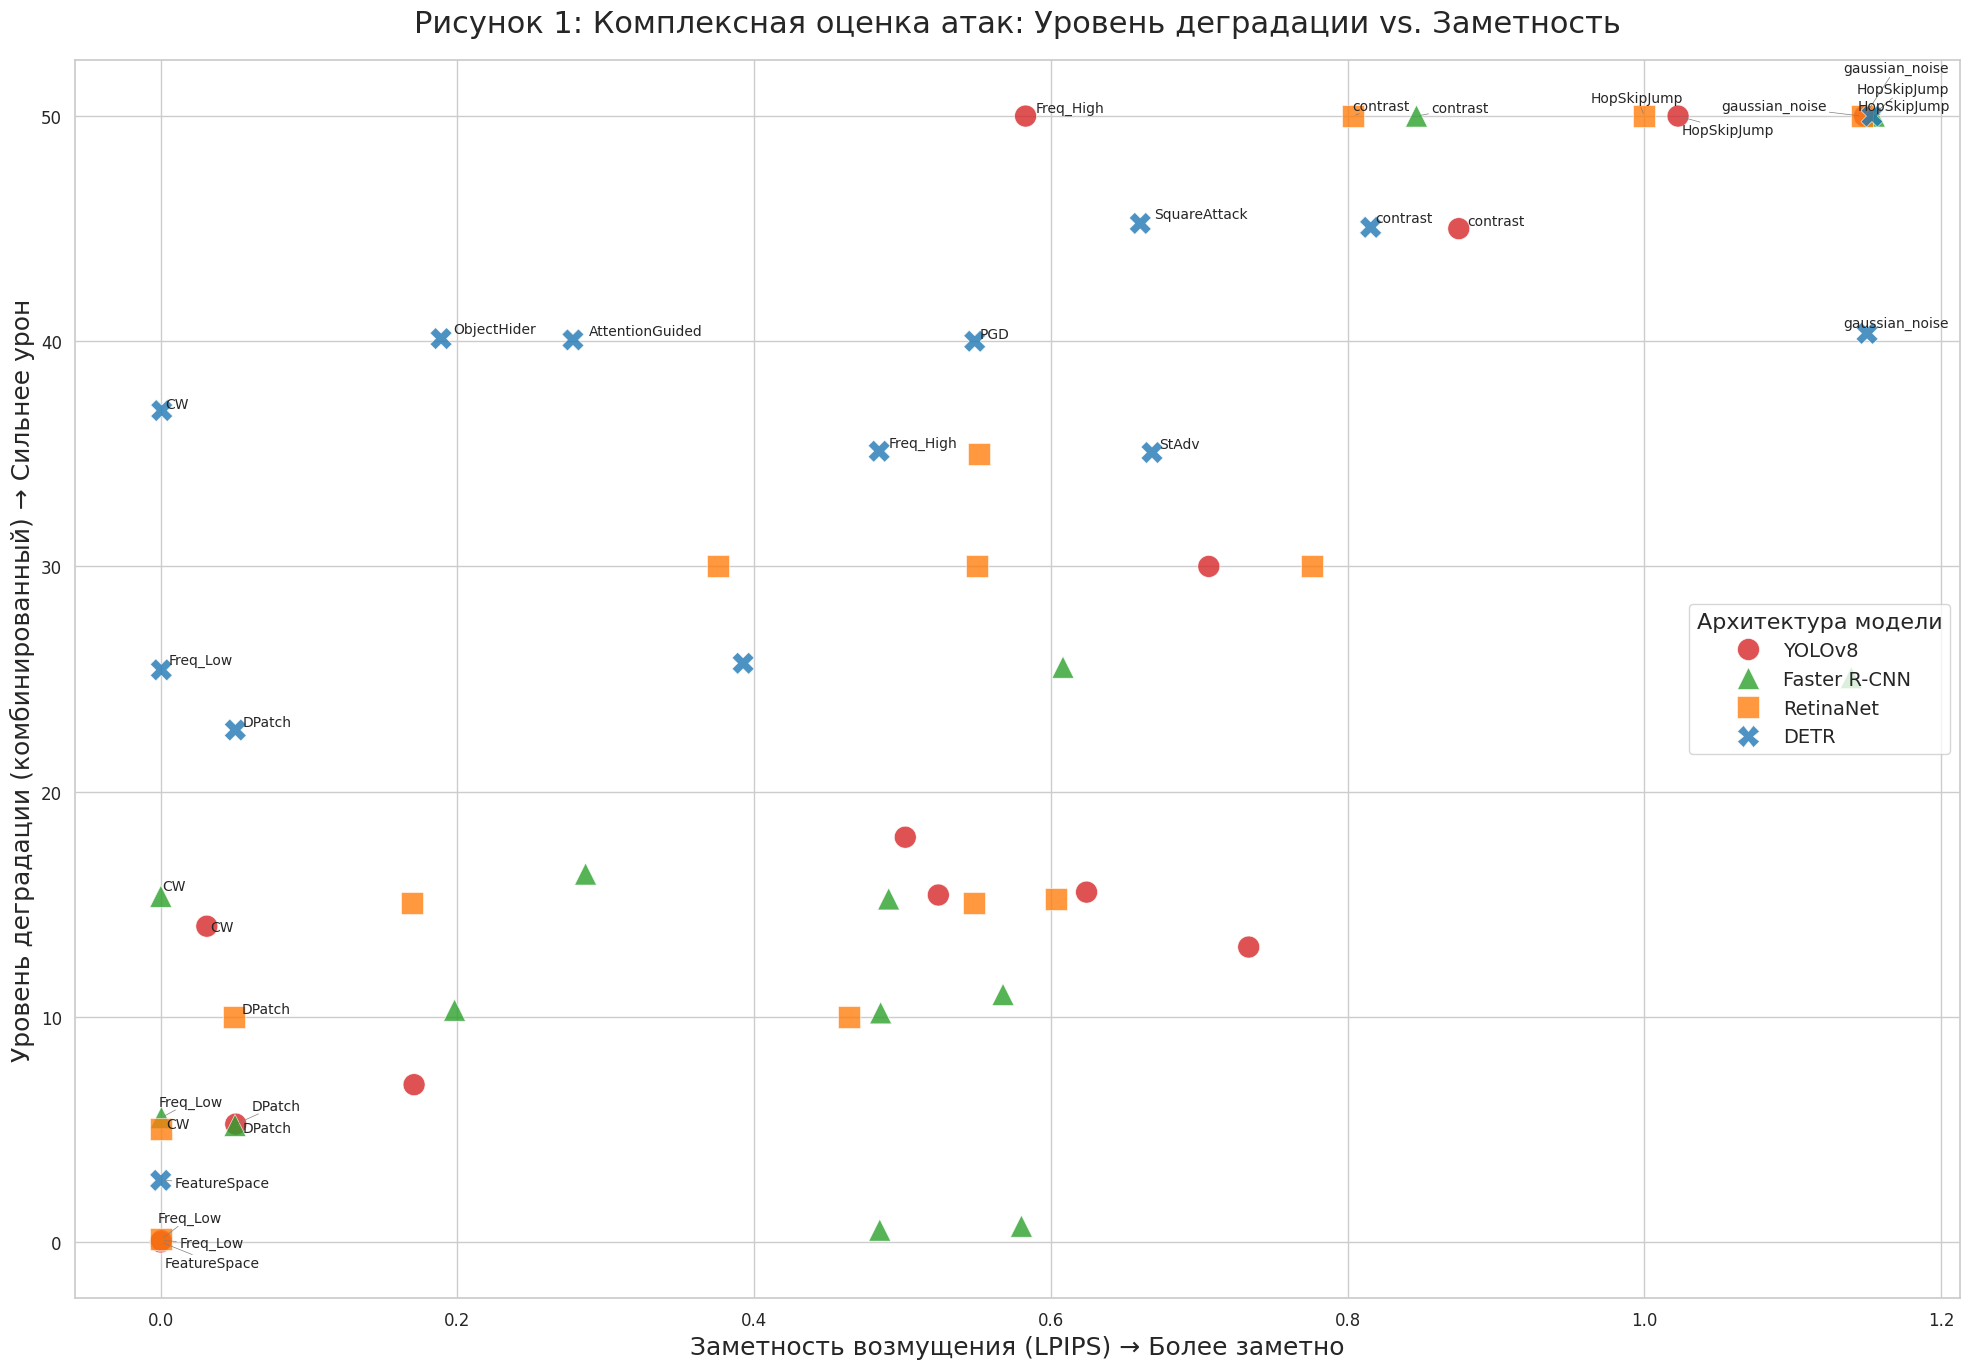


Generating Bar Chart...
Saved barchart_degradation.png



Generating Radar Chart...
Saved radar_model_fingerprints.png


In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import os

# === ШАГ 1: ПОЛНЫЙ СБОР ДАННЫХ И РАСЧЕТ КОМПЛЕКСНОЙ МЕТРИКИ ===

data = [
    # Model, Attack, mAP Drop, ASR-Hide, FP/Img, LPIPS
    # ... (вставьте сюда полный список словарей из предыдущего ответа) ...
    # --- YOLOv8 ---
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'asr_hide': 20.0, 'fp_per_image_adv': 13.7, 'lpips': 0.5019},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'asr_hide': 10.0, 'fp_per_image_adv': 15.5, 'lpips': 0.0311},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'asr_hide': 10.0, 'fp_per_image_adv': 0.4, 'lpips': 0.0506},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'asr_hide': 30.0, 'fp_per_image_adv': 0.7, 'lpips': 0.5242},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'asr_hide': 0.0, 'fp_per_image_adv': 85.9, 'lpips': 0.5830},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.1, 'lpips': 0.0004},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0228},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'asr_hide': 0.0, 'fp_per_image_adv': 12.0, 'lpips': 0.1708},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'asr_hide': 10.0, 'fp_per_image_adv': 18.1, 'lpips': 0.6241},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7065},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'asr_hide': 0.0, 'fp_per_image_adv': 22.5, 'lpips': 0.7334},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1485},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8750},

    # --- Faster R-CNN ---
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'asr_hide': 30.0, 'fp_per_image_adv': 2.3, 'lpips': 0.2864},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 30.0, 'fp_per_image_adv': 0.6, 'lpips': 0.0001},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'asr_hide': 10.0, 'fp_per_image_adv': 0.3, 'lpips': 0.0501},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.9, 'lpips': 0.4847},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'asr_hide': 20.0, 'fp_per_image_adv': 0.3, 'lpips': 0.4853},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4, 'lpips': 0.4907},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.9, 'lpips': 0.0005},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1551},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'asr_hide': 20.0, 'fp_per_image_adv': 0.5, 'lpips': 0.1981},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'asr_hide': 20.0, 'fp_per_image_adv': 1.7, 'lpips': 0.5678},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'asr_hide': 50.0, 'fp_per_image_adv': 0.9, 'lpips': 0.6082},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'asr_hide': 0.0, 'fp_per_image_adv': 1.2, 'lpips': 0.5802},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'asr_hide': 50.0, 'fp_per_image_adv': 0.1, 'lpips': 1.1396},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8465},

    # --- RetinaNet ---
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.3758},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0001},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0496},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1, 'lpips': 0.5482},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0, 'lpips': 0.4642},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5515},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.2, 'lpips': 0.0004},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1, 'lpips': 0.1691},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5501},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7759},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4, 'lpips': 0.6037},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1465},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8036},

    # --- DETR ---
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.1, 'lpips': 0.2779},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 3.3, 'lpips': 0.0007},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 40.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0503},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 1.2, 'lpips': 0.3926},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.2, 'lpips': 0.4843},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 0.7, 'lpips': 0.0004},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1535},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.2, 'lpips': 0.1890},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5487},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.4, 'lpips': 0.6603},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 0.6682},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.6, 'lpips': 1.1502},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.1, 'lpips': 0.8156},
]

df = pd.DataFrame(data)

# Нормализуем FP/Img на шкалу [0, 100]
max_fp = df['fp_per_image_adv'].max()
df['fp_norm'] = (df['fp_per_image_adv'] / max_fp) * 100 if max_fp > 0 else 0

# Веса для сокрытия и генерации фантомов
w_hide = 0.5
w_fp = 0.5

# Рассчитываем итоговый "Уровень деградации"
df['degradation_score'] = (w_hide * df['asr_hide']) + (w_fp * df['fp_norm'])

# Создаем папку для сохранения
if not os.path.exists("final_graphs"):
    os.makedirs("final_graphs")

# === ГРАФИК 1: Диаграмма рассеяния (Scatter Plot) ===
print("Generating Scatter Plot...")
fig_scatter, ax = plt.subplots(figsize=(20, 14))
palette = {'YOLOv8': '#d62728', 'RetinaNet': '#ff7f0e', 'Faster R-CNN': '#2ca02c', 'DETR': '#1f77b4'}
markers = {'YOLOv8': 'o', 'RetinaNet': 's', 'Faster R-CNN': '^', 'DETR': 'X'}

sns.scatterplot(
    data=df, x='lpips', y='degradation_score', hue='model', style='model',
    palette=palette, markers=markers, s=250, alpha=0.8,
    edgecolor="w", linewidth=0.5, ax=ax
)
texts = []
for i, row in df.iterrows():
    if row['degradation_score'] > 35 or row['lpips'] < 0.06:
        texts.append(ax.text(row['lpips'], row['degradation_score'], row['attack'], fontsize=10))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

ax.set_title('Рисунок 1: Комплексная оценка атак: Уровень деградации vs. Заметность', fontsize=22, pad=20)
ax.set_xlabel('Заметность возмущения (LPIPS) → Более заметно', fontsize=18)
ax.set_ylabel('Уровень деградации (комбинированный) → Сильнее урон', fontsize=18)
ax.legend(title='Архитектура модели', fontsize=14, title_fontsize=16, loc='center right')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout(pad=1.5)
plt.savefig("final_graphs/scatterplot_degradation.png", dpi=300)
print("Saved scatterplot_degradation.png")
plt.show()

# === ГРАФИК 2: Сгруппированная гистограмма (Bar Chart) ===
print("\nGenerating Bar Chart...")
attack_order_bar = ['HopSkipJump', 'contrast', 'gaussian_noise', 'Freq_High', 'PGD', 'CW']
df_bar = df[df['attack'].isin(attack_order_bar)]

fig_bar = px.bar(
    df_bar,
    x="attack",
    y="degradation_score",
    color="model",
    barmode="group",
    color_discrete_map=palette,
    category_orders={"attack": attack_order_bar},
    title="Рисунок 2: Сравнение уровня деградации по ключевым атакам",
    labels={"degradation_score": "Уровень деградации (0-100)", "attack": "Тип атаки"}
)
fig_bar.update_layout(font_size=14, legend_title_font_size=16)
fig_bar.write_image("final_graphs/barchart_degradation.png", scale=2)
print("Saved barchart_degradation.png")
fig_bar.show()


# === ГРАФИК 3: Радиальная диаграмма (Radar Chart) ===
print("\nGenerating Radar Chart...")
metrics_to_plot = {
    'degradation_score': 'Общий урон',
    'asr_hide': 'Сокрытие (%)',
    'fp_norm': 'Фантомы (норм.)',
    'lpips': 'Заметность (LPIPS)'
}
# Нормализуем LPIPS, т.к. он не в шкале 0-100
max_lpips = df['lpips'].max()
df['lpips_norm'] = (df['lpips'] / max_lpips) * 100 if max_lpips > 0 else 0

fig_radar = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2,
                          subplot_titles=['YOLOv8', 'RetinaNet', 'Faster R-CNN', 'DETR'])

attacks_for_radar = ['PGD', 'Freq_High', 'HopSkipJump', 'CW', 'gaussian_noise']
for i, model_name in enumerate(models):
    row = i // 2 + 1
    col = i % 2 + 1

    model_df = df[(df['model'] == model_name) & (df['attack'].isin(attacks_for_radar))]

    for j, row_data in model_df.iterrows():
        attack_name = row_data['attack']
        values = [
            row_data['degradation_score'],
            row_data['asr_hide'],
            row_data['fp_norm'],
            row_data['lpips_norm']
        ]
        fig_radar.add_trace(go.Scatterpolar(
            r=values,
            theta=list(metrics_to_plot.values()),
            fill='toself',
            name=attack_name,
            legendgroup=attack_name,
            showlegend=(i == 0) # Легенда только для первого графика
        ), row=row, col=col)

fig_radar.update_layout(
    title_text='<b>Рисунок 3: "Отпечатки" уязвимостей каждой модели</b>',
    title_x=0.5, font_size=14, legend_title_text='Тип атаки',
    height=1000, width=1200
)
fig_radar.write_image("final_graphs/radar_model_fingerprints.png", scale=2)
print("Saved radar_model_fingerprints.png")
fig_radar.show()

In [11]:
import pandas as pd
import numpy as np

# ==============================================================================
# === ФИНАЛЬНЫЙ ПОЛНЫЙ СБОР ДАННЫХ ИЗ ЛОГОВ (ВСЕ АТАКИ И ВСЕ МЕТРИКИ) ===
# ==============================================================================
# Каждая запись содержит все метрики, которые были в ваших логах.
full_data = [
    # --- YOLOv8 ---
    {'model': 'YOLOv8', 'attack': 'AttentionGuided', 'map_drop': -0.0019, 'asr_hide': 20.0, 'fp_per_image_adv': 13.7, 'lpips': 0.5019, 'scd': 0.3788, 'mabd': 11.5426, 'miss_rate_adv': 0.140},
    {'model': 'YOLOv8', 'attack': 'CW', 'map_drop': 0.0125, 'asr_hide': 10.0, 'fp_per_image_adv': 15.5, 'lpips': 0.0311, 'scd': 0.3285, 'mabd': 4.3058, 'miss_rate_adv': 0.039},
    {'model': 'YOLOv8', 'attack': 'DPatch', 'map_drop': 0.0229, 'asr_hide': 10.0, 'fp_per_image_adv': 0.4, 'lpips': 0.0506, 'scd': 0.0333, 'mabd': 1.0470, 'miss_rate_adv': 0.142},
    {'model': 'YOLOv8', 'attack': 'Daedalus_Lite', 'map_drop': -0.0031, 'asr_hide': 30.0, 'fp_per_image_adv': 0.7, 'lpips': 0.5242, 'scd': 0.0700, 'mabd': 4.6501, 'miss_rate_adv': 0.267},
    {'model': 'YOLOv8', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0, 'scd': 0.0, 'mabd': 0.0, 'miss_rate_adv': 0.422},
    {'model': 'YOLOv8', 'attack': 'Freq_High', 'map_drop': 0.0767, 'asr_hide': 0.0, 'fp_per_image_adv': 85.9, 'lpips': 0.5830, 'scd': 0.4887, 'mabd': 3.4593, 'miss_rate_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.1, 'lpips': 0.0004, 'scd': 0.0019, 'mabd': 0.0520, 'miss_rate_adv': 0.213},
    {'model': 'YOLOv8', 'attack': 'HopSkipJump', 'map_drop': 0.0461, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0228, 'scd': 0.7665, 'mabd': 0.0, 'miss_rate_adv': 1.0},
    {'model': 'YOLOv8', 'attack': 'NES', 'map_drop': 0.0017, 'asr_hide': 0.0, 'fp_per_image_adv': 0.6, 'lpips': 0.0842, 'scd': -0.0074, 'mabd': 1.9171, 'miss_rate_adv': 0.115},
    {'model': 'YOLOv8', 'attack': 'ObjectHider', 'map_drop': 0.0044, 'asr_hide': 0.0, 'fp_per_image_adv': 12.0, 'lpips': 0.1708, 'scd': 0.1038, 'mabd': 4.3523, 'miss_rate_adv': 0.019},
    {'model': 'YOLOv8', 'attack': 'PGD', 'map_drop': 0.0439, 'asr_hide': 10.0, 'fp_per_image_adv': 18.1, 'lpips': 0.6241, 'scd': 0.5571, 'mabd': 4.5722, 'miss_rate_adv': 0.033},
    {'model': 'YOLOv8', 'attack': 'SPSA', 'map_drop': 0.0350, 'asr_hide': 10.0, 'fp_per_image_adv': 0.2, 'lpips': 0.0428, 'scd': -0.0053, 'mabd': 3.1209, 'miss_rate_adv': 0.293},
    {'model': 'YOLOv8', 'attack': 'ShapeShifter', 'map_drop': -0.0025, 'asr_hide': 10.0, 'fp_per_image_adv': 2.4, 'lpips': 0.1270, 'scd': 0.2299, 'mabd': 6.0962, 'miss_rate_adv': 0.169},
    {'model': 'YOLOv8', 'attack': 'SquareAttack', 'map_drop': 0.0182, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7065, 'scd': 0.1487, 'mabd': 11.0985, 'miss_rate_adv': 0.386},
    {'model': 'YOLOv8', 'attack': 'StAdv', 'map_drop': 0.0289, 'asr_hide': 0.0, 'fp_per_image_adv': 22.5, 'lpips': 0.7334, 'scd': 0.5652, 'mabd': 6.1468, 'miss_rate_adv': 0.0},
    {'model': 'YOLOv8', 'attack': 'brightness', 'map_drop': 0.0354, 'asr_hide': 50.0, 'fp_per_image_adv': 0.2, 'lpips': 1.0225, 'scd': 0.1062, 'mabd': 4.2796, 'miss_rate_adv': 0.400},
    {'model': 'YOLOv8', 'attack': 'contrast', 'map_drop': 0.0250, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8750, 'scd': 0.5874, 'mabd': 1.5393, 'miss_rate_adv': 0.933},
    {'model': 'YOLOv8', 'attack': 'defocus_blur', 'map_drop': 0.0048, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7713, 'scd': 0.3975, 'mabd': 8.4463, 'miss_rate_adv': 0.670},
    {'model': 'YOLOv8', 'attack': 'elastic_transform', 'map_drop': 0.0003, 'asr_hide': 60.0, 'fp_per_image_adv': 0.2, 'lpips': 0.8497, 'scd': 0.3025, 'mabd': 7.1170, 'miss_rate_adv': 0.458},
    {'model': 'YOLOv8', 'attack': 'frost', 'map_drop': 0.0079, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0505, 'scd': 0.3370, 'mabd': 8.5620, 'miss_rate_adv': 0.589},
    {'model': 'YOLOv8', 'attack': 'gaussian_noise', 'map_drop': 0.0225, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1485, 'scd': 0.7536, 'mabd': 0.0, 'miss_rate_adv': 0.950},
    {'model': 'YOLOv8', 'attack': 'impulse_noise', 'map_drop': 0.0076, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1484, 'scd': 0.6577, 'mabd': 0.0, 'miss_rate_adv': 0.980},
    {'model': 'YOLOv8', 'attack': 'jpeg_compression', 'map_drop': 0.0164, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 0.8668, 'scd': 0.5202, 'mabd': 3.1524, 'miss_rate_adv': 0.611},
    {'model': 'YOLOv8', 'attack': 'motion_blur', 'map_drop': 0.0067, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7916, 'scd': 0.4102, 'mabd': 14.7235, 'miss_rate_adv': 0.595},
    {'model': 'YOLOv8', 'attack': 'pixelate', 'map_drop': 0.0436, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7209, 'scd': 0.6090, 'mabd': 1.8038, 'miss_rate_adv': 0.838},
    {'model': 'YOLOv8', 'attack': 'shot_noise', 'map_drop': 0.0322, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1448, 'scd': 0.7228, 'mabd': 4.5934, 'miss_rate_adv': 0.956},
    {'model': 'YOLOv8', 'attack': 'snow', 'map_drop': 0.0345, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 1.0213, 'scd': 0.4718, 'mabd': 9.3402, 'miss_rate_adv': 0.513},
    {'model': 'YOLOv8', 'attack': 'zoom_blur', 'map_drop': 0.0400, 'asr_hide': 50.0, 'fp_per_image_adv': 0.6, 'lpips': 0.8086, 'scd': 0.5036, 'mabd': 10.8193, 'miss_rate_adv': 0.443},

    # --- Faster R-CNN ---
    {'model': 'Faster R-CNN', 'attack': 'AttentionGuided', 'map_drop': 0.0041, 'asr_hide': 30.0, 'fp_per_image_adv': 2.3, 'lpips': 0.2864, 'scd': 0.0908, 'mabd': 4.4565, 'miss_rate_adv': 0.187},
    {'model': 'Faster R-CNN', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 30.0, 'fp_per_image_adv': 0.6, 'lpips': 0.0001, 'scd': 0.0220, 'mabd': 1.2139, 'miss_rate_adv': 0.247},
    {'model': 'Faster R-CNN', 'attack': 'DPatch', 'map_drop': -0.0075, 'asr_hide': 10.0, 'fp_per_image_adv': 0.3, 'lpips': 0.0501, 'scd': 0.0373, 'mabd': 2.3668, 'miss_rate_adv': 0.211},
    {'model': 'Faster R-CNN', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.9, 'lpips': 0.4847, 'scd': 0.0097, 'mabd': 3.3361, 'miss_rate_adv': 0.014},
    {'model': 'Faster R-CNN', 'attack': 'FeatureSpace', 'map_drop': 0.0050, 'asr_hide': 20.0, 'fp_per_image_adv': 0.3, 'lpips': 0.4853, 'scd': 0.0537, 'mabd': 3.9014, 'miss_rate_adv': 0.111},
    {'model': 'Faster R-CNN', 'attack': 'Freq_High', 'map_drop': 0.0259, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4, 'lpips': 0.4907, 'scd': 0.1908, 'mabd': 4.9575, 'miss_rate_adv': 0.063},
    {'model': 'Faster R-CNN', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.9, 'lpips': 0.0005, 'scd': -0.0028, 'mabd': 0.7834, 'miss_rate_adv': 0.140},
    {'model': 'Faster R-CNN', 'attack': 'HopSkipJump', 'map_drop': 0.0220, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1551, 'scd': 0.8560, 'mabd': 0.0, 'miss_rate_adv': 1.0},
    {'model': 'Faster R-CNN', 'attack': 'NES', 'map_drop': -0.0019, 'asr_hide': 0.0, 'fp_per_image_adv': 1.6, 'lpips': 0.0845, 'scd': -0.0021, 'mabd': 1.6145, 'miss_rate_adv': 0.093},
    {'model': 'Faster R-CNN', 'attack': 'ObjectHider', 'map_drop': 0.0168, 'asr_hide': 20.0, 'fp_per_image_adv': 0.5, 'lpips': 0.1981, 'scd': 0.1181, 'mabd': 4.7863, 'miss_rate_adv': 0.107},
    {'model': 'Faster R-CNN', 'attack': 'PGD', 'map_drop': 0.0501, 'asr_hide': 20.0, 'fp_per_image_adv': 1.7, 'lpips': 0.5678, 'scd': 0.2315, 'mabd': 19.2380, 'miss_rate_adv': 0.107},
    {'model': 'Faster R-CNN', 'attack': 'SPSA', 'map_drop': 0.0100, 'asr_hide': 0.0, 'fp_per_image_adv': 0.2, 'lpips': 0.0436, 'scd': -0.0016, 'mabd': 1.7848, 'miss_rate_adv': 0.045},
    {'model': 'Faster R-CNN', 'attack': 'ShapeShifter', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.1, 'lpips': 0.0928, 'scd': 0.0007, 'mabd': 2.7635, 'miss_rate_adv': 0.099},
    {'model': 'Faster R-CNN', 'attack': 'SquareAttack', 'map_drop': 0.0090, 'asr_hide': 50.0, 'fp_per_image_adv': 0.9, 'lpips': 0.6082, 'scd': 0.1621, 'mabd': 9.5928, 'miss_rate_adv': 0.146},
    {'model': 'Faster R-CNN', 'attack': 'StAdv', 'map_drop': 0.0027, 'asr_hide': 0.0, 'fp_per_image_adv': 1.2, 'lpips': 0.5802, 'scd': 0.0206, 'mabd': 5.9887, 'miss_rate_adv': 0.120},
    {'model': 'Faster R-CNN', 'attack': 'brightness', 'map_drop': 0.0009, 'asr_hide': 50.0, 'fp_per_image_adv': 0.6, 'lpips': 0.9637, 'scd': 0.2030, 'mabd': 4.2005, 'miss_rate_adv': 0.203},
    {'model': 'Faster R-CNN', 'attack': 'contrast', 'map_drop': 0.0453, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8465, 'scd': 0.8063, 'mabd': 1.5116, 'miss_rate_adv': 0.983},
    {'model': 'Faster R-CNN', 'attack': 'defocus_blur', 'map_drop': 0.0151, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7961, 'scd': 0.5677, 'mabd': 13.3387, 'miss_rate_adv': 0.629},
    {'model': 'Faster R-CNN', 'attack': 'elastic_transform', 'map_drop': 0.0363, 'asr_hide': 60.0, 'fp_per_image_adv': 0.4, 'lpips': 0.8292, 'scd': 0.3593, 'mabd': 11.5583, 'miss_rate_adv': 0.392},
    {'model': 'Faster R-CNN', 'attack': 'frost', 'map_drop': 0.0475, 'asr_hide': 40.0, 'fp_per_image_adv': 0.2, 'lpips': 1.0254, 'scd': 0.2926, 'mabd': 11.2859, 'miss_rate_adv': 0.451},
    {'model': 'Faster R-CNN', 'attack': 'gaussian_noise', 'map_drop': 0.1208, 'asr_hide': 50.0, 'fp_per_image_adv': 0.1, 'lpips': 1.1396, 'scd': 0.5535, 'mabd': 13.6067, 'miss_rate_adv': 0.409},
    {'model': 'Faster R-CNN', 'attack': 'impulse_noise', 'map_drop': 0.0426, 'asr_hide': 80.0, 'fp_per_image_adv': 0.4, 'lpips': 1.1477, 'scd': 0.5452, 'mabd': 8.1205, 'miss_rate_adv': 0.570},
    {'model': 'Faster R-CNN', 'attack': 'jpeg_compression', 'map_drop': 0.0309, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.9188, 'scd': 0.6796, 'mabd': 6.7371, 'miss_rate_adv': 0.683},
    {'model': 'Faster R-CNN', 'attack': 'motion_blur', 'map_drop': 0.0006, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 0.8535, 'scd': 0.5764, 'mabd': 8.1433, 'miss_rate_adv': 0.578},
    {'model': 'Faster R-CNN', 'attack': 'pixelate', 'map_drop': 0.0320, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8440, 'scd': 0.7825, 'mabd': 0.2627, 'miss_rate_adv': 0.950},
    {'model': 'Faster R-CNN', 'attack': 'shot_noise', 'map_drop': 0.0675, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 1.1506, 'scd': 0.4440, 'mabd': 10.0443, 'miss_rate_adv': 0.308},
    {'model': 'Faster R-CNN', 'attack': 'snow', 'map_drop': 0.0108, 'asr_hide': 60.0, 'fp_per_image_adv': 0.6, 'lpips': 1.0397, 'scd': 0.4489, 'mabd': 6.8045, 'miss_rate_adv': 0.464},
    {'model': 'Faster R-CNN', 'attack': 'zoom_blur', 'map_drop': 0.0327, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7916, 'scd': 0.7025, 'mabd': 19.6695, 'miss_rate_adv': 0.800},

    # --- RetinaNet ---
    {'model': 'RetinaNet', 'attack': 'AttentionGuided', 'map_drop': 0.0023, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.3758, 'scd': 0.2594, 'mabd': 3.9566, 'miss_rate_adv': 0.583},
    {'model': 'RetinaNet', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 10.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0001, 'scd': -0.0125, 'mabd': 0.6544, 'miss_rate_adv': 0.316},
    {'model': 'RetinaNet', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0496, 'scd': 0.0337, 'mabd': 2.4722, 'miss_rate_adv': 0.617},
    {'model': 'RetinaNet', 'attack': 'Daedalus_Lite', 'map_drop': 0.0110, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1, 'lpips': 0.5482, 'scd': 0.1766, 'mabd': 4.7931, 'miss_rate_adv': 0.500},
    {'model': 'RetinaNet', 'attack': 'FeatureSpace', 'map_drop': -0.0023, 'asr_hide': 20.0, 'fp_per_image_adv': 0.0, 'lpips': 0.4642, 'scd': 0.0476, 'mabd': 5.8834, 'miss_rate_adv': 0.404},
    {'model': 'RetinaNet', 'attack': 'Freq_High', 'map_drop': 0.0285, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5515, 'scd': 0.2554, 'mabd': 5.6676, 'miss_rate_adv': 0.478},
    {'model': 'RetinaNet', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.2, 'lpips': 0.0004, 'scd': -0.0007, 'mabd': 0.7000, 'miss_rate_adv': 0.231},
    {'model': 'RetinaNet', 'attack': 'HopSkipJump', 'map_drop': 0.0144, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0, 'scd': 0.7126, 'mabd': 0.0, 'miss_rate_adv': 1.0},
    {'model': 'RetinaNet', 'attack': 'NES', 'map_drop': -0.0008, 'asr_hide': 30.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0835, 'scd': 0.0373, 'mabd': 0.4114, 'miss_rate_adv': 0.294},
    {'model': 'RetinaNet', 'attack': 'ObjectHider', 'map_drop': 0.0491, 'asr_hide': 30.0, 'fp_per_image_adv': 0.1, 'lpips': 0.1691, 'scd': 0.1019, 'mabd': 9.4152, 'miss_rate_adv': 0.438},
    {'model': 'RetinaNet', 'attack': 'PGD', 'map_drop': 0.0093, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5501, 'scd': 0.2615, 'mabd': 13.2981, 'miss_rate_adv': 0.712},
    {'model': 'RetinaNet', 'attack': 'SPSA', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0419, 'scd': 0.0015, 'mabd': 0.7051, 'miss_rate_adv': 0.231},
    {'model': 'RetinaNet', 'attack': 'ShapeShifter', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 0.0, 'lpips': 0.0211, 'scd': 0.0011, 'mabd': 0.1213, 'miss_rate_adv': 0.316},
    {'model': 'RetinaNet', 'attack': 'SquareAttack', 'map_drop': 0.0068, 'asr_hide': 60.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7759, 'scd': 0.3300, 'mabd': 0.8398, 'miss_rate_adv': 0.704},
    {'model': 'RetinaNet', 'attack': 'StAdv', 'map_drop': 0.0007, 'asr_hide': 30.0, 'fp_per_image_adv': 0.4, 'lpips': 0.6037, 'scd': 0.0315, 'mabd': 1.7457, 'miss_rate_adv': 0.364},
    {'model': 'RetinaNet', 'attack': 'brightness', 'map_drop': -0.0070, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0098, 'scd': 0.3195, 'mabd': 10.9867, 'miss_rate_adv': 0.512},
    {'model': 'RetinaNet', 'attack': 'contrast', 'map_drop': 0.0032, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8036, 'scd': 0.6053, 'mabd': 6.4190, 'miss_rate_adv': 0.842},
    {'model': 'RetinaNet', 'attack': 'defocus_blur', 'map_drop': 0.0148, 'asr_hide': 50.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8432, 'scd': 0.3505, 'mabd': 18.0378, 'miss_rate_adv': 0.586},
    {'model': 'RetinaNet', 'attack': 'elastic_transform', 'map_drop': 0.0674, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8709, 'scd': 0.5440, 'mabd': 2.7569, 'miss_rate_adv': 0.815},
    {'model': 'RetinaNet', 'attack': 'frost', 'map_drop': 0.0715, 'asr_hide': 70.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0904, 'scd': 0.4446, 'mabd': 7.6128, 'miss_rate_adv': 0.679},
    {'model': 'RetinaNet', 'attack': 'gaussian_noise', 'map_drop': 0.0362, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1465, 'scd': 0.6000, 'mabd': 9.8403, 'miss_rate_adv': 0.805},
    {'model': 'RetinaNet', 'attack': 'impulse_noise', 'map_drop': 0.0128, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1475, 'scd': 0.7202, 'mabd': 6.5509, 'miss_rate_adv': 0.892},
    {'model': 'RetinaNet', 'attack': 'jpeg_compression', 'map_drop': 0.0067, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8618, 'scd': 0.5908, 'mabd': 2.0303, 'miss_rate_adv': 0.849},
    {'model': 'RetinaNet', 'attack': 'motion_blur', 'map_drop': 0.0402, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8475, 'scd': 0.4365, 'mabd': 8.2985, 'miss_rate_adv': 0.752},
    {'model': 'RetinaNet', 'attack': 'pixelate', 'map_drop': 0.0203, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8115, 'scd': 0.5867, 'mabd': 6.6424, 'miss_rate_adv': 0.846},
    {'model': 'RetinaNet', 'attack': 'shot_noise', 'map_drop': 0.0122, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1476, 'scd': 0.3803, 'mabd': 5.5360, 'miss_rate_adv': 0.677},
    {'model': 'RetinaNet', 'attack': 'snow', 'map_drop': 0.1160, 'asr_hide': 90.0, 'fp_per_image_adv': 0.0, 'lpips': 1.0262, 'scd': 0.6177, 'mabd': 3.4052, 'miss_rate_adv': 0.763},
    {'model': 'RetinaNet', 'attack': 'zoom_blur', 'map_drop': 0.0290, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.7906, 'scd': 0.6523, 'mabd': 9.5521, 'miss_rate_adv': 0.935},

    # --- DETR ---
    {'model': 'DETR', 'attack': 'AttentionGuided', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.1, 'lpips': 0.2779, 'scd': 0.5571, 'mabd': 11.1499, 'miss_rate_adv': 0.610},
    {'model': 'DETR', 'attack': 'CW', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 3.3, 'lpips': 0.0007, 'scd': 0.2002, 'mabd': 3.0576, 'miss_rate_adv': 0.164},
    {'model': 'DETR', 'attack': 'DPatch', 'map_drop': 0.0, 'asr_hide': 40.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0503, 'scd': 0.0607, 'mabd': 2.0237, 'miss_rate_adv': 0.025},
    {'model': 'DETR', 'attack': 'Daedalus_Lite', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 1.2, 'lpips': 0.3926, 'scd': 0.2598, 'mabd': 2.2642, 'miss_rate_adv': 0.203},
    {'model': 'DETR', 'attack': 'FeatureSpace', 'map_drop': 0.0, 'asr_hide': 0.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0, 'scd': 0.0, 'mabd': 0.0, 'miss_rate_adv': 0.040},
    {'model': 'DETR', 'attack': 'Freq_High', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.2, 'lpips': 0.4843, 'scd': 0.5547, 'mabd': 10.1686, 'miss_rate_adv': 0.550},
    {'model': 'DETR', 'attack': 'Freq_Low', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 0.7, 'lpips': 0.0004, 'scd': 0.1020, 'mabd': 0.3800, 'miss_rate_adv': 0.150},
    {'model': 'DETR', 'attack': 'HopSkipJump', 'map_drop': 0.0, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 1.1535, 'scd': 0.8923, 'mabd': 0.0, 'miss_rate_adv': 1.0},
    {'model': 'DETR', 'attack': 'NES', 'map_drop': 0.0, 'asr_hide': 100.0, 'fp_per_image_adv': 5.6, 'lpips': 0.0845, 'scd': 0.2035, 'mabd': 2.0708, 'miss_rate_adv': 0.193},
    {'model': 'DETR', 'attack': 'ObjectHider', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.2, 'lpips': 0.1890, 'scd': 0.3587, 'mabd': 2.3244, 'miss_rate_adv': 0.292},
    {'model': 'DETR', 'attack': 'PGD', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.0, 'lpips': 0.5487, 'scd': 0.5706, 'mabd': 4.2784, 'miss_rate_adv': 0.559},
    {'model': 'DETR', 'attack': 'SPSA', 'map_drop': 0.0, 'asr_hide': 40.0, 'fp_per_image_adv': 4.9, 'lpips': 0.0433, 'scd': 0.0186, 'mabd': 0.6756, 'miss_rate_adv': 0.075},
    {'model': 'DETR', 'attack': 'ShapeShifter', 'map_drop': 0.0, 'asr_hide': 20.0, 'fp_per_image_adv': 4.7, 'lpips': 0.0579, 'scd': 0.0958, 'mabd': 2.6558, 'miss_rate_adv': 0.091},
    {'model': 'DETR', 'attack': 'SquareAttack', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.4, 'lpips': 0.6603, 'scd': 0.3402, 'mabd': 5.8201, 'miss_rate_adv': 0.356},
    {'model': 'DETR', 'attack': 'StAdv', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 0.6682, 'scd': 0.5824, 'mabd': 5.2867, 'miss_rate_adv': 0.539},
    {'model': 'DETR', 'attack': 'brightness', 'map_drop': 0.0, 'asr_hide': 50.0, 'fp_per_image_adv': 3.2, 'lpips': 0.9712, 'scd': 0.1094, 'mabd': 6.4514, 'miss_rate_adv': 0.017},
    {'model': 'DETR', 'attack': 'contrast', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 0.1, 'lpips': 0.8156, 'scd': 0.7896, 'mabd': 8.2833, 'miss_rate_adv': 0.572},
    {'model': 'DETR', 'attack': 'defocus_blur', 'map_drop': 0.0, 'asr_hide': 60.0, 'fp_per_image_adv': 0.5, 'lpips': 0.8053, 'scd': 0.4304, 'mabd': 8.3184, 'miss_rate_adv': 0.387},
    {'model': 'DETR', 'attack': 'elastic_transform', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 2.2, 'lpips': 0.8565, 'scd': 0.4879, 'mabd': 7.5550, 'miss_rate_adv': 0.322},
    {'model': 'DETR', 'attack': 'frost', 'map_drop': 0.0, 'asr_hide': 90.0, 'fp_per_image_adv': 1.8, 'lpips': 1.0227, 'scd': 0.6033, 'mabd': 8.0520, 'miss_rate_adv': 0.480},
    {'model': 'DETR', 'attack': 'gaussian_noise', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.6, 'lpips': 1.1502, 'scd': 0.5475, 'mabd': 8.2309, 'miss_rate_adv': 0.333},
    {'model': 'DETR', 'attack': 'impulse_noise', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.3, 'lpips': 1.1486, 'scd': 0.5609, 'mabd': 11.9097, 'miss_rate_adv': 0.442},
    {'model': 'DETR', 'attack': 'jpeg_compression', 'map_drop': 0.0, 'asr_hide': 30.0, 'fp_per_image_adv': 2.4, 'lpips': 0.8937, 'scd': 0.5790, 'mabd': 9.9234, 'miss_rate_adv': 0.187},
    {'model': 'DETR', 'attack': 'motion_blur', 'map_drop': 0.0, 'asr_hide': 80.0, 'fp_per_image_adv': 0.1, 'lpips': 0.8391, 'scd': 0.5301, 'mabd': 7.7873, 'miss_rate_adv': 0.142},
    {'model': 'DETR', 'attack': 'pixelate', 'map_drop': 0.0, 'asr_hide': 70.0, 'fp_per_image_adv': 0.1, 'lpips': 0.7435, 'scd': 0.5639, 'mabd': 8.0802, 'miss_rate_adv': 0.455},
    {'model': 'DETR', 'attack': 'shot_noise', 'map_drop': 0.0, 'asr_hide': 60.0, 'fp_per_image_adv': 0.8, 'lpips': 1.1445, 'scd': 0.4302, 'mabd': 14.4783, 'miss_rate_adv': 0.380},
    {'model': 'DETR', 'attack': 'snow', 'map_drop': 0.0, 'asr_hide': 60.0, 'fp_per_image_adv': 0.2, 'lpips': 1.0169, 'scd': 0.3617, 'mabd': 13.3759, 'miss_rate_adv': 0.447},
    {'model': 'DETR', 'attack': 'zoom_blur', 'map_drop': 0.0, 'asr_hide': 100.0, 'fp_per_image_adv': 0.0, 'lpips': 0.8405, 'scd': 0.7248, 'mabd': 28.3174, 'miss_rate_adv': 0.607},

]

# Создаем DataFrame
df_full = pd.DataFrame(full_data)

# Заменяем отрицательные значения в 'map_drop' на 0 для корректной визуализации "урона"
df_full['map_drop'] = df_full['map_drop'].clip(lower=0)

# Выводим первые 5 строк и информацию о DataFrame, чтобы убедиться, что все на месте
print("Полный DataFrame успешно создан. Первые 5 строк:")
print(df_full.head())
print("\nИнформация о DataFrame:")
df_full.info()

print("\nТеперь вы можете использовать 'df_full' для построения любых графиков.")

Полный DataFrame успешно создан. Первые 5 строк:
    model           attack  map_drop  asr_hide  fp_per_image_adv   lpips  \
0  YOLOv8  AttentionGuided    0.0000      20.0              13.7  0.5019   
1  YOLOv8               CW    0.0125      10.0              15.5  0.0311   
2  YOLOv8           DPatch    0.0229      10.0               0.4  0.0506   
3  YOLOv8    Daedalus_Lite    0.0000      30.0               0.7  0.5242   
4  YOLOv8     FeatureSpace    0.0000       0.0               0.0  0.0000   

      scd     mabd  miss_rate_adv  
0  0.3788  11.5426          0.140  
1  0.3285   4.3058          0.039  
2  0.0333   1.0470          0.142  
3  0.0700   4.6501          0.267  
4  0.0000   0.0000          0.422  

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             112 non-null    object 
 1   att

In [12]:
import plotly.express as px

# (Предполагается, что вы уже запустили код выше и у вас есть df_full)

# Создаем сводную таблицу для SCD
pivot_scd = df_full.pivot(index='model', columns='attack', values='scd')

# Создаем график
fig = px.imshow(
    pivot_scd,
    text_auto=".2f",
    aspect="auto",
    color_continuous_scale='Oranges', # Другая палитра для разнообразия
    title='<b>Тепловая карта: Падение уверенности предсказаний (SCD)</b>',
    labels=dict(x="Тип атаки", y="Архитектура модели", color="SCD")
)
fig.show()